In [2]:
# Importa el archivo .py
import Limpiezadatosenpy

# Llama a la función para obtener el DataFrame
df = Limpiezadatosenpy.df
import pandas as pd


c:\Users\jpcan\OneDrive\Documentos\Andes Universidad\Proyecto de grado 1\Tesis final\Limpiezadatosenpy.py:4: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/jpcan/OneDrive/Documentos/Andes Universidad/Proyecto de grado 1/BaseDatos/registro_atencion_unidad_observacion_urgencia.csv")


  NumeroFactura CodigoPrestador FechaIngreso HoraIngreso        CausaExterna  \
0        288306     50010217203   2019-12-26       23:38  Enfermedad general   
1    4129237242     50010425930   2019-12-21       05:17  Enfermedad general   
2    4129237242     50010425930   2019-12-23       07:29  Enfermedad general   
4    4129237242     50010425930   2019-12-29       09:16  Enfermedad general   
6      CL375831     50010909923   2019-12-16       07:31  Enfermedad general   

  CodigoDiagnosticoPrincipal CodigoDiagnosticoRelacionado_uno  \
0                       A059                             I48X   
1                       R509                             \"\"   
2                       N23X                             \"\"   
4                       C698                             \"\"   
6                       S019                             S400   

  CodigoDiagnosticoRelacionado_dos CodigoDiagnosticoRelacionado_tres  \
0                             \"\"                      

c:\Users\jpcan\OneDrive\Documentos\Andes Universidad\Proyecto de grado 1\Tesis final\Limpiezadatosenpy.py:363: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DescripcionDiagnosticoPrincipal'].replace({np.nan: "No tuvo", 'nan': "No tuvo", '\\"\\': "No tuvo"}, inplace=True)
c:\Users\jpcan\OneDrive\Documentos\Andes Universidad\Proyecto de grado 1\Tesis final\Limpiezadatosenpy.py:364: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior wi

# URGENTE: Tanto en el codigo para los modelos de ML como en este cuaderno, la variable a predecir es TiempoenUrgencias. En el documento de proyecto de grado se menciona es TiempoenObservación. Esto fue por que a ultimo momento se cambio el nombre de la variable por tema de interpretación dado que aunque la unidad de observación haga parte de urgencias, se puede malinterpretar ese nombre dado que hay mas unidades en Urgencias. En este trabajo de grado me enfocare unicamente en la unidad de observación. Al mismo tiempo hay algunas graficas que dicen tiempo en urgencias, sin embargo, lo que quiero decir ahí es tiempo en la unidad de observación. 

# Carga base de datos y exploración.

# Acá se crea la variable de ocupación. No se usa directamente el df de FetureEngeniering por que en ese se eliminan algunas columnas que no se van a usar en el modelo. Sin embargo, para el analisis si sirven. 

In [4]:

# Leer el archivo CSV y convertirlo en un DataFrame
ocupacion_diaria = pd.read_csv("C:/Users/jpcan/OneDrive/Documentos/Andes Universidad/Proyecto de grado 1/Tesis final/hospital_data_with_occupancy.csv")
ocupacion_diaria['CodigoPrestador'] = ocupacion_diaria['CodigoPrestador'].astype(str)
# Convertir 'RangoDias' a solo fechas, eliminando las horas
ocupacion_diaria['RangoDias'] = pd.to_datetime(ocupacion_diaria['RangoDias']).dt.date

# Agrupar por CodigoPrestador y RangoDias, y sumar la columna Hospitaloccupancy
ocupacion_diaria_agrupada = ocupacion_diaria.groupby(['CodigoPrestador', 'RangoDias'], as_index=False)['Hospitaloccupancy'].sum()

# Mostrar el DataFrame agrupado y consolidado
print(ocupacion_diaria_agrupada.head())

# Realizar la unión entre ambos DataFrames usando 'left' para mantener todas las filas de df
df = df.merge(ocupacion_diaria, how='left', left_on=['CodigoPrestador', 'FechaIngreso'], right_on=['CodigoPrestador', 'RangoDias'])
# Sobrescribir df eliminando las filas donde "Hospitaloccupancy" tiene valores NaN
df = df.dropna(subset=["Hospitaloccupancy"])

  CodigoPrestador   RangoDias  Hospitaloccupancy
0     50010115001  2019-01-01                  2
1     50010115001  2019-01-02                  3
2     50010115001  2019-01-04                  2
3     50010115001  2019-01-05                  2
4     50010115001  2019-01-06                  1


In [ ]:
# Importa el archivo .py
import FeatureEngeneniering

# Llama a la función para obtener el DataFrame
df_completo = FeatureEngeneniering.df

In [ ]:
# Eliminar las columnas no deseadas
#columnas_a_eliminar = [ 'UnidadMedidaEdad',"NumeroFactura", "CodigoDiagnosticoPrincipal", 'CodigoDiagnosticoRelacionado_uno', 'CodigoDiagnosticoRelacionado_dos', 'CodigoDiagnosticoRelacionado_tres', 
 #                      "CodMunicipio", "CodigoEAPB","CodigoPrestador", "CodDepto","RangoDias"]

#df = df.drop(columns=columnas_a_eliminar)


In [ ]:
# Guardar el dataframe df en un archivo CSV separado por punto y coma
#df.to_csv('C:/Users/jpcan/OneDrive/Documentos/Andes Universidad/Proyecto de grado 1/BaseDatos/archivo_limpio_con_ocupacion.csv', sep=';', index=False)


In [ ]:
#import pandas as pd
#df = pd.read_csv('C:/Users/jpcan/OneDrive/Documentos/Andes Universidad/Proyecto de grado 1/BaseDatos/archivo_limpio_con_ocupacion.csv',sep=';')

In [19]:
# Mostrar el tipo de dato de cada columna en el DataFrame
column_types = df.dtypes
# Mostrar el tipo de dato de cada columna en un DataFrame de pandas
column_types_df = pd.DataFrame(column_types, columns=["Tipo de Dato"])
print(column_types_df)


                                          Tipo de Dato
NumeroFactura                                   object
CodigoPrestador                                 object
FechaIngreso                                    object
HoraIngreso                                     object
CausaExterna                                    object
CodigoDiagnosticoPrincipal                      object
CodigoDiagnosticoRelacionado_uno                object
CodigoDiagnosticoRelacionado_dos                object
CodigoDiagnosticoRelacionado_tres               object
DestinoUsuario                                  object
EstadoSalida                                     int64
CausaBasicaMuerteUrgencias                      object
FechaSalida                                     object
HoraSalida                                      object
CodigoEAPB                                      object
TipoUsuario                                     object
Edad                                           float64
UnidadMedi

In [ ]:

# Contar el número total de filas en el dataframe
num_filas = df.shape[0]
print(f"Cantidad total de filas en el dataframe: {num_filas}")

# Contar la cantidad de valores NaN en cada columna
nan_counts = df.isna().sum()

# Imprimir el conteo de valores NaN
print("Cantidad de valores NaN en cada columna:")
print(nan_counts)



Cantidad total de filas en el dataframe: 1291374
Cantidad de valores NaN en cada columna:
NumeroFactura                                  0
CodigoPrestador                                0
FechaIngreso                                   0
HoraIngreso                                    0
CausaExterna                                   0
CodigoDiagnosticoPrincipal                     0
CodigoDiagnosticoRelacionado_uno               0
CodigoDiagnosticoRelacionado_dos               0
CodigoDiagnosticoRelacionado_tres              0
DestinoUsuario                                 0
EstadoSalida                                   0
CausaBasicaMuerteUrgencias                486053
FechaSalida                                    0
HoraSalida                                     0
CodigoEAPB                                     0
TipoUsuario                                    0
Edad                                           0
UnidadMedidaEdad                               0
Sexo                        

In [14]:
import pandas as pd

# Supongamos que el DataFrame se llama df
# Asegúrate de reemplazar 'NombrePrestadorSede' por el nombre exacto de la columna si difiere

# Contar los valores únicos y sus frecuencias
valores_unicos = df['NombrePrestadorSede'].value_counts()

# Mostrar los valores únicos y sus frecuencias
print(valores_unicos)

# Si deseas guardar el resultado en un archivo CSV
valores_unicos.to_csv('frecuencias_nombre_prestador_sede.csv', header=['Frecuencia'])


NombrePrestadorSede
EMPRESA SOCIAL DEL ESTADO METROSALUD - sede SEDE ADMINISTRATIVA EDIFICIO SACATIN                                                                                          117201
VIRREY SOLIS I.P.S S.A - sede VIRREY SOLIS I.P.S S.A SAN DIEGO                                                                                                             82009
UNIVERSIDAD PONTIFICIA BOLIVARIANA - sede CLINICA UNIVERSITARIA BOLIVARIANA                                                                                                76681
PROMOTORA MEDICA Y ODONTOLOGICA DE ANTIOQUIA SA - sede CLINICA CENTRAL FUNDADORES                                                                                          70321
CLINICA MEDELLIN S.A.S. - sede CLINICA MEDELLIN OCCIDENTE                                                                                                                  68433
CLINICA DEL PRADO S.A.S - sede CLINICA DEL PRADO CIUDAD DEL RIO                                

# IPS publica e IPS privada

In [17]:
# Definir listas con los nombres de las IPS públicas y privadas
ips_publicas = [
    'EMPRESA SOCIAL DEL ESTADO METROSALUD',
    'HOSPITAL ALMA MÁTER DE ANTIOQUIA',
    'HOSPITAL GENERAL DE MEDELLIN LUZ CASTRO DE GUTIERREZ',
    'ESE HOSPITAL LA MARIA',
]

ips_privadas = [
    'VIRREY SOLIS I.P.S S.A',
    'UNIVERSIDAD PONTIFICIA BOLIVARIANA',
    'PROMOTORA MEDICA Y ODONTOLOGICA DE ANTIOQUIA SA',
    'CLINICA MEDELLIN S.A.S.',
    'CLINICA DEL PRADO S.A.S',
    'COMUNIDAD DE HERMANAS DOMINICAS DE LA PRESENTACION DE LA SANTISIMA VIRGEN DE TOURS PROVINCIA DE MEDELLIN',
    'VIDA SANA IPS LTDA',
    'Servicios de Salud IPS Suramericana S.A.S',
    'HOSPITAL PABLO TOBON URIBE',
    'CLINICA CARDIO VID',
    'CLÍNICA VIDA SEDE HOSPITALARIA',
    'FUNDACION HOSPITALARIA SAN VICENTE DE PAUL',
    'SOCIEDAD MEDICA ANTIOQUEÑA S.A. SOMA',
    'Corporación Hospital Infantil Concejo de Medellín',
    'INVERSIONES MEDICAS DE ANTIOQUIA S.A. CLINICA LAS VEGAS',
    'FUNDACION COLOMBIANA DE CANCEROLOGIA CLINICA VIDA',
    'NUEVA CLINICA SAGRADO CORAZON S.A.S',
    'FUNDACION INSTITUTO NEUROLOGICO DE COLOMBIA',
    'CORPORACION PARA ESTUDIOS EN SALUD CLINICA CES',
    'PROMOTORA MEDICA LAS AMERICAS S.A',
    'traumacentro S.A.S',
    'CLINICA DE CIRUGIA AMBULATORIA CONQUISTADORES S.A.',
]

# Crear la columna 'TipoDeIPS' en función del nombre del prestador
def clasificar_ips(nombre):
    # Verificar si la IPS está en las listas de públicas o privadas
    if any(ips in nombre for ips in ips_publicas):
        return 'Público'
    elif any(ips in nombre for ips in ips_privadas):
        return 'Privado'
    else:
        return 'Privado'

# Aplicar la función para clasificar las IPS
df['TipoDeIPS'] = df['NombrePrestadorSede'].apply(clasificar_ips)

# Mostrar una vista previa del DataFrame con la nueva columna
print(df[['NombrePrestadorSede', 'TipoDeIPS']].head())


                                 NombrePrestadorSede TipoDeIPS
0  CLINICA MEDELLIN S.A.S. - sede CLINICA MEDELLI...   Privado
1  Servicios de Salud IPS Suramericana S.A.S - se...   Privado
2  Servicios de Salud IPS Suramericana S.A.S - se...   Privado
3  Servicios de Salud IPS Suramericana S.A.S - se...   Privado
4  PROMOTORA MEDICA Y ODONTOLOGICA DE ANTIOQUIA S...   Privado


In [18]:
import pandas as pd

# Contar cuántas IPS son públicas y cuántas son privadas
conteo_ips = df.groupby('TipoDeIPS')['NombrePrestadorSede'].nunique()

# Mostrar el resultado
print("Conteo de IPS por tipo:")
print(conteo_ips)

# Si quieres obtener solo las cantidades específicas:
cantidad_publicas = conteo_ips.get('Público', 0)
cantidad_privadas = conteo_ips.get('Privado', 0)

print(f"Cantidad de IPS públicas: {cantidad_publicas}")
print(f"Cantidad de IPS privadas: {cantidad_privadas}")

Conteo de IPS por tipo:
TipoDeIPS
Privado    40
Público    15
Name: NombrePrestadorSede, dtype: int64
Cantidad de IPS públicas: 15
Cantidad de IPS privadas: 40


# Analisis descriptivo variables predictoras

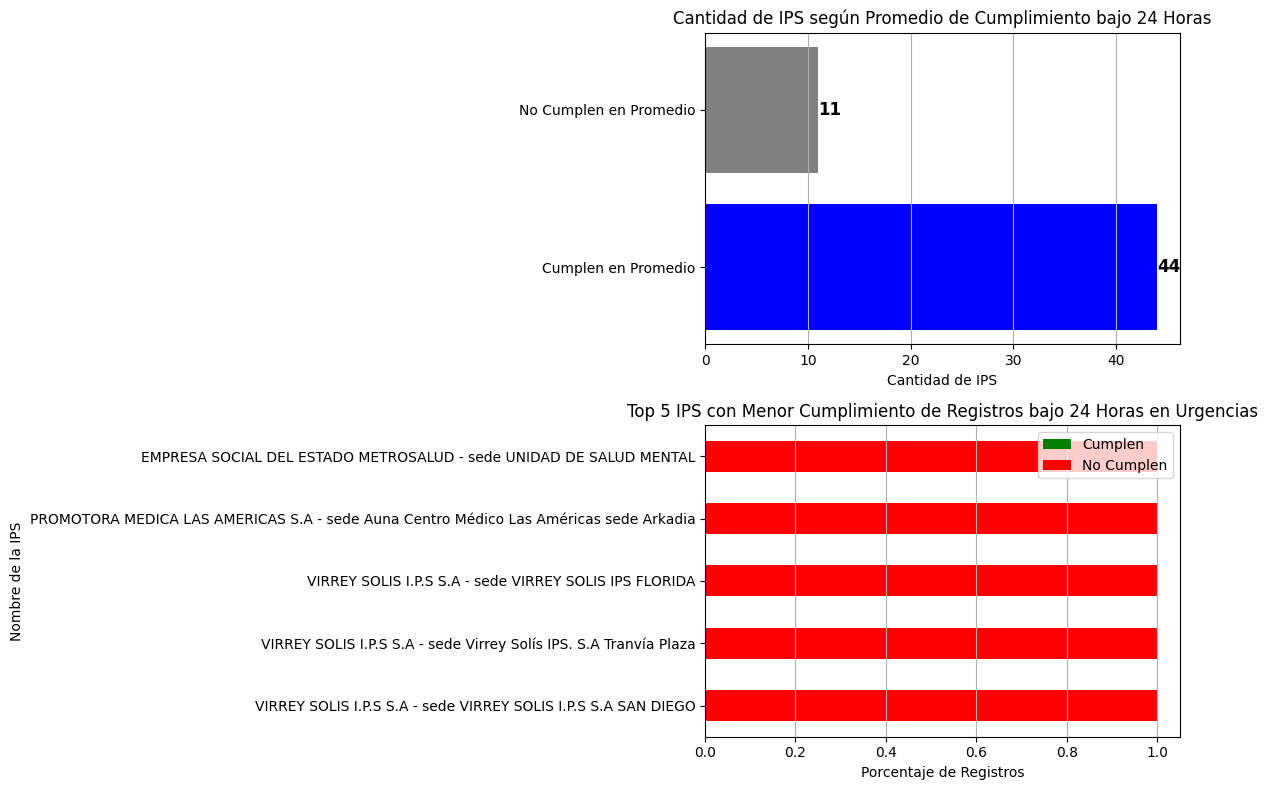

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de tener tu DataFrame cargado en 'df'

# Definir el umbral de 24 horas
umbral_24_horas = 24

# Calcular el porcentaje promedio de cumplimiento para cada IPS
promedio_cumplimiento_24_horas = df.groupby('NombrePrestadorSede')['TiempoenUrgencias'].apply(lambda x: (x < umbral_24_horas).mean())

# Calcular la cantidad de IPS que cumplen y no cumplen en promedio
cantidad_ips_cumplen = (promedio_cumplimiento_24_horas > 0.5).sum()
cantidad_ips_no_cumplen = (promedio_cumplimiento_24_horas <= 0.5).sum()

# Filtrar las 5 IPS que menos cumplen con el criterio
ips_menos_cumplen_24_horas = promedio_cumplimiento_24_horas.nsmallest(5)
cumplimiento_y_no_24_horas = pd.DataFrame({
    'Cumplen': ips_menos_cumplen_24_horas,
    'No Cumplen': 1 - ips_menos_cumplen_24_horas
})

# Crear las gráficas
plt.figure(figsize=(12, 8))

# Gráfico 1: Cantidad de IPS que cumplen y no cumplen en promedio bajo 24 horas
plt.subplot(2, 1, 1)
plt.barh(['Cumplen en Promedio', 'No Cumplen en Promedio'], 
         [cantidad_ips_cumplen, cantidad_ips_no_cumplen], 
         color=['blue', 'gray'])
plt.title('Cantidad de IPS según Promedio de Cumplimiento bajo 24 Horas')
plt.xlabel('Cantidad de IPS')
plt.grid(axis='x')

# Añadir el número exacto encima de cada barra
plt.text(cantidad_ips_cumplen, 0, str(cantidad_ips_cumplen),
         va='center', ha='left', fontsize=12, color='black', fontweight='bold')
plt.text(cantidad_ips_no_cumplen, 1, str(cantidad_ips_no_cumplen),
         va='center', ha='left', fontsize=12, color='black', fontweight='bold')

# Gráfico 2: Top 5 IPS que menos cumplen con el criterio (de peor a mejor cumplimiento)
plt.subplot(2, 1, 2)
cumplimiento_y_no_24_horas.plot(kind='barh', stacked=True, color=['green', 'red'], ax=plt.gca())
plt.gca().invert_yaxis()  # Invertir el orden de las IPS en la gráfica
plt.title('Top 5 IPS con Menor Cumplimiento de Registros bajo 24 Horas en Urgencias')
plt.xlabel('Porcentaje de Registros')
plt.ylabel('Nombre de la IPS')
plt.legend(['Cumplen', 'No Cumplen'], loc='upper right')
plt.grid(axis='x')

# Mostrar las gráficas
plt.tight_layout()
plt.show()




# Analisis ocupación 

Top 10 IPS con Mayor Ocupación Promedio:
NombrePrestadorSede
VIRREY SOLIS I.P.S S.A - sede VIRREY SOLIS I.P.S S.A SAN DIEGO                             1141.738236
EMPRESA SOCIAL DEL ESTADO METROSALUD - sede SEDE ADMINISTRATIVA EDIFICIO SACATIN            513.623937
HOSPITAL ALMA MÁTER DE ANTIOQUIA - sede SEDE PRINCIPAL HOSPITAL ALMA MÁTER DE ANTIOQUIA     471.031551
VIDA SANA IPS LTDA                                                                          266.528756
VIRREY SOLIS I.P.S S.A - sede Virrey Solís IPS. S.A Tranvía Plaza                           238.192814
Servicios de Salud IPS Suramericana S.A.S - sede IPS SURA LOS MOLINOS MEDELLIN              177.778564
PROMOTORA MEDICA LAS AMERICAS S.A - sede CLÍNICA LAS AMERICAS                               177.747275
Servicios de Salud IPS Suramericana S.A.S - sede IPS SURA LAS VEGAS MEDELLIN                167.611977
UNIVERSIDAD PONTIFICIA BOLIVARIANA - sede CLINICA UNIVERSITARIA BOLIVARIANA                  94.325239
CLINICA MEDE

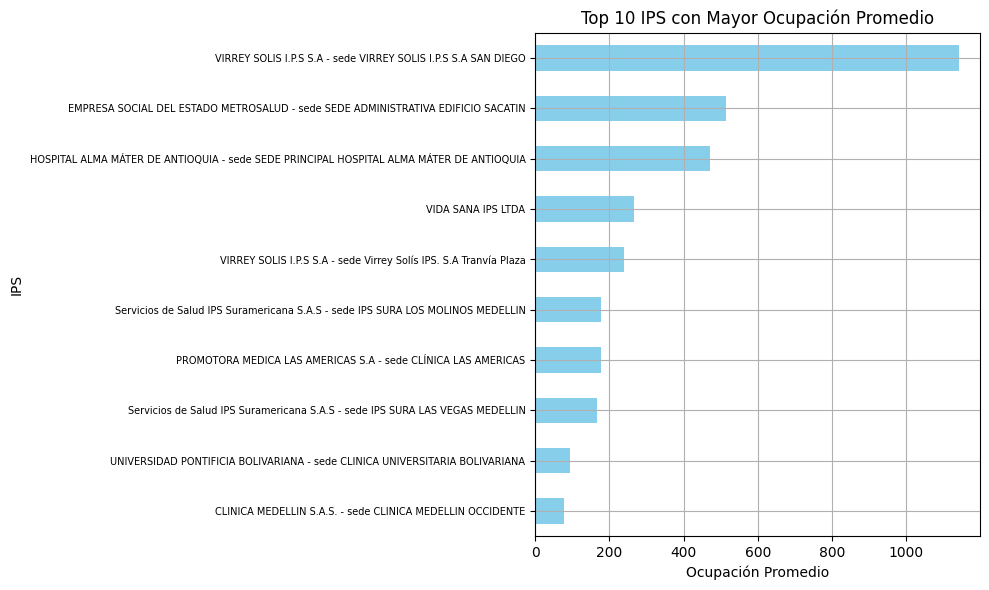

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Calcular el promedio de ocupación por IPS
top_ips_ocupacion = df.groupby('NombrePrestadorSede')['Hospitaloccupancy'].mean().nlargest(10)

# Imprimir las 10 IPS con mayor ocupación promedio y su valor
print("Top 10 IPS con Mayor Ocupación Promedio:")
print(top_ips_ocupacion)

# Graficar las 10 IPS con mayor ocupación promedio
plt.figure(figsize=(10, 6))
top_ips_ocupacion.plot(kind='barh', color='skyblue')
plt.title('Top 10 IPS con Mayor Ocupación Promedio')
plt.xlabel('Ocupación Promedio')
plt.ylabel('IPS')
plt.yticks(fontsize=7)
plt.gca().invert_yaxis()  # Invertir para que la IPS con mayor ocupación esté arriba
plt.grid(True)

plt.tight_layout()
plt.show()






In [24]:
import pandas as pd

# Filtrar los datos para la IPS específica
ips_especifica = 'VIRREY SOLIS I.P.S S.A - sede VIRREY SOLIS I.P.S S.A SAN DIEGO'
df_ips = df[df['NombrePrestadorSede'] == ips_especifica]

# Calcular las estadísticas descriptivas para la columna 'Hospitaloccupancy'
estadisticas_ocupacion = df_ips['Hospitaloccupancy'].describe()

# Imprimir las estadísticas
print(f"Estadísticas de ocupación para la IPS '{ips_especifica}':")
print(estadisticas_ocupacion)


Estadísticas de ocupación para la IPS 'VIRREY SOLIS I.P.S S.A - sede VIRREY SOLIS I.P.S S.A SAN DIEGO':
count    82009.000000
mean      1141.738236
std        400.972868
min        160.000000
25%        747.000000
50%       1284.000000
75%       1500.000000
max       1832.000000
Name: Hospitaloccupancy, dtype: float64


# Registros Grupo etario e IPS

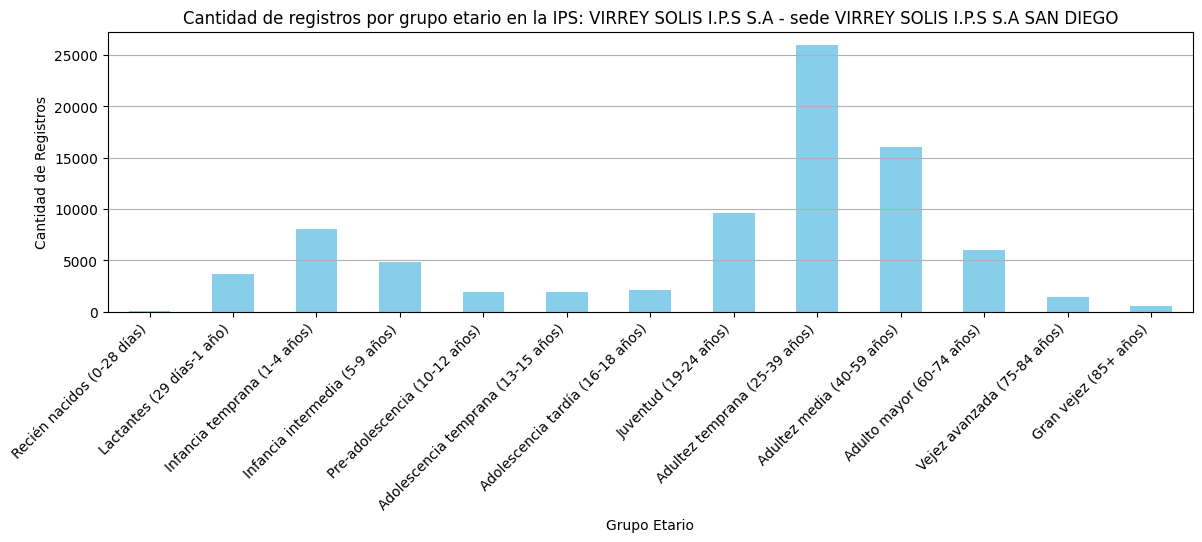

In [ ]:
import matplotlib.pyplot as plt

# Definir los rangos de edad proporcionados
bins = [0, 28/365, 1, 4, 9, 12, 15, 18, 24, 39, 59, 74, 84, 110]  # Límites de edad en años
labels = [
    'Recién nacidos (0-28 días)',
    'Lactantes (29 días-1 año)',
    'Infancia temprana (1-4 años)',
    'Infancia intermedia (5-9 años)',
    'Pre-adolescencia (10-12 años)',
    'Adolescencia temprana (13-15 años)',
    'Adolescencia tardía (16-18 años)',
    'Juventud (19-24 años)',
    'Adultez temprana (25-39 años)',
    'Adultez media (40-59 años)',
    'Adulto mayor (60-74 años)',
    'Vejez avanzada (75-84 años)',
    'Gran vejez (85+ años)'
]

# Crear una nueva columna con los rangos de edad
df['RangoEdad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False)

# Filtrar los datos para la IPS específica
ips_especifica = 'VIRREY SOLIS I.P.S S.A - sede VIRREY SOLIS I.P.S S.A SAN DIEGO'
df_ips = df[df['NombrePrestadorSede'] == ips_especifica]

# Contar la cantidad de registros para esta IPS
total_registros = df_ips.shape[0]

# Contar la cantidad de registros por cada grupo etario
conteo_grupos_etarios = df_ips['RangoEdad'].value_counts().sort_index()

# Encontrar las enfermedades que más afectan el tiempo en esta IPS
enfermedades_afectan_tiempo = df_ips.groupby('DescripcionDiagnosticoPrincipal')['TiempoenUrgencias'].mean().nlargest(10)

# Graficar los resultados
plt.figure(figsize=(14, 8))

# Gráfico 1: Cantidad de registros por grupo etario
plt.subplot(2, 1, 1)
conteo_grupos_etarios.plot(kind='bar', color='skyblue')
plt.title(f'Cantidad de registros por grupo etario en la IPS: {ips_especifica}')
plt.xlabel('Grupo Etario')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Mostrar el total de registros en el título
plt.suptitle(f"Análisis de registros en {ips_especifica} - Total Registros: {total_registros}", fontsize=16)






In [19]:
import pandas as pd

# Calcular las 10 IPS con más registros
top_ips_registros = df['NombrePrestadorSede'].value_counts().nlargest(10)

# Imprimir el resultado
print("Las 10 IPS con más registros son:")
print(top_ips_registros)



Las 10 IPS con más registros son:
NombrePrestadorSede
EMPRESA SOCIAL DEL ESTADO METROSALUD - sede SEDE ADMINISTRATIVA EDIFICIO SACATIN                                                                  117201
VIRREY SOLIS I.P.S S.A - sede VIRREY SOLIS I.P.S S.A SAN DIEGO                                                                                     82009
UNIVERSIDAD PONTIFICIA BOLIVARIANA - sede CLINICA UNIVERSITARIA BOLIVARIANA                                                                        76679
PROMOTORA MEDICA Y ODONTOLOGICA DE ANTIOQUIA SA - sede CLINICA CENTRAL FUNDADORES                                                                  70321
CLINICA MEDELLIN S.A.S. - sede CLINICA MEDELLIN OCCIDENTE                                                                                          68433
CLINICA DEL PRADO S.A.S - sede CLINICA DEL PRADO CIUDAD DEL RIO                                                                                    66668
HOSPITAL ALMA MÁTER DE ANTIO

## Distribución de Edad por tiempo promedio de estancia

C:\Users\jpcan\AppData\Local\Temp\ipykernel_24064\1940119633.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tiempo_promedio_por_rango = df.groupby('RangoEdad')['TiempoenUrgencias'].mean()


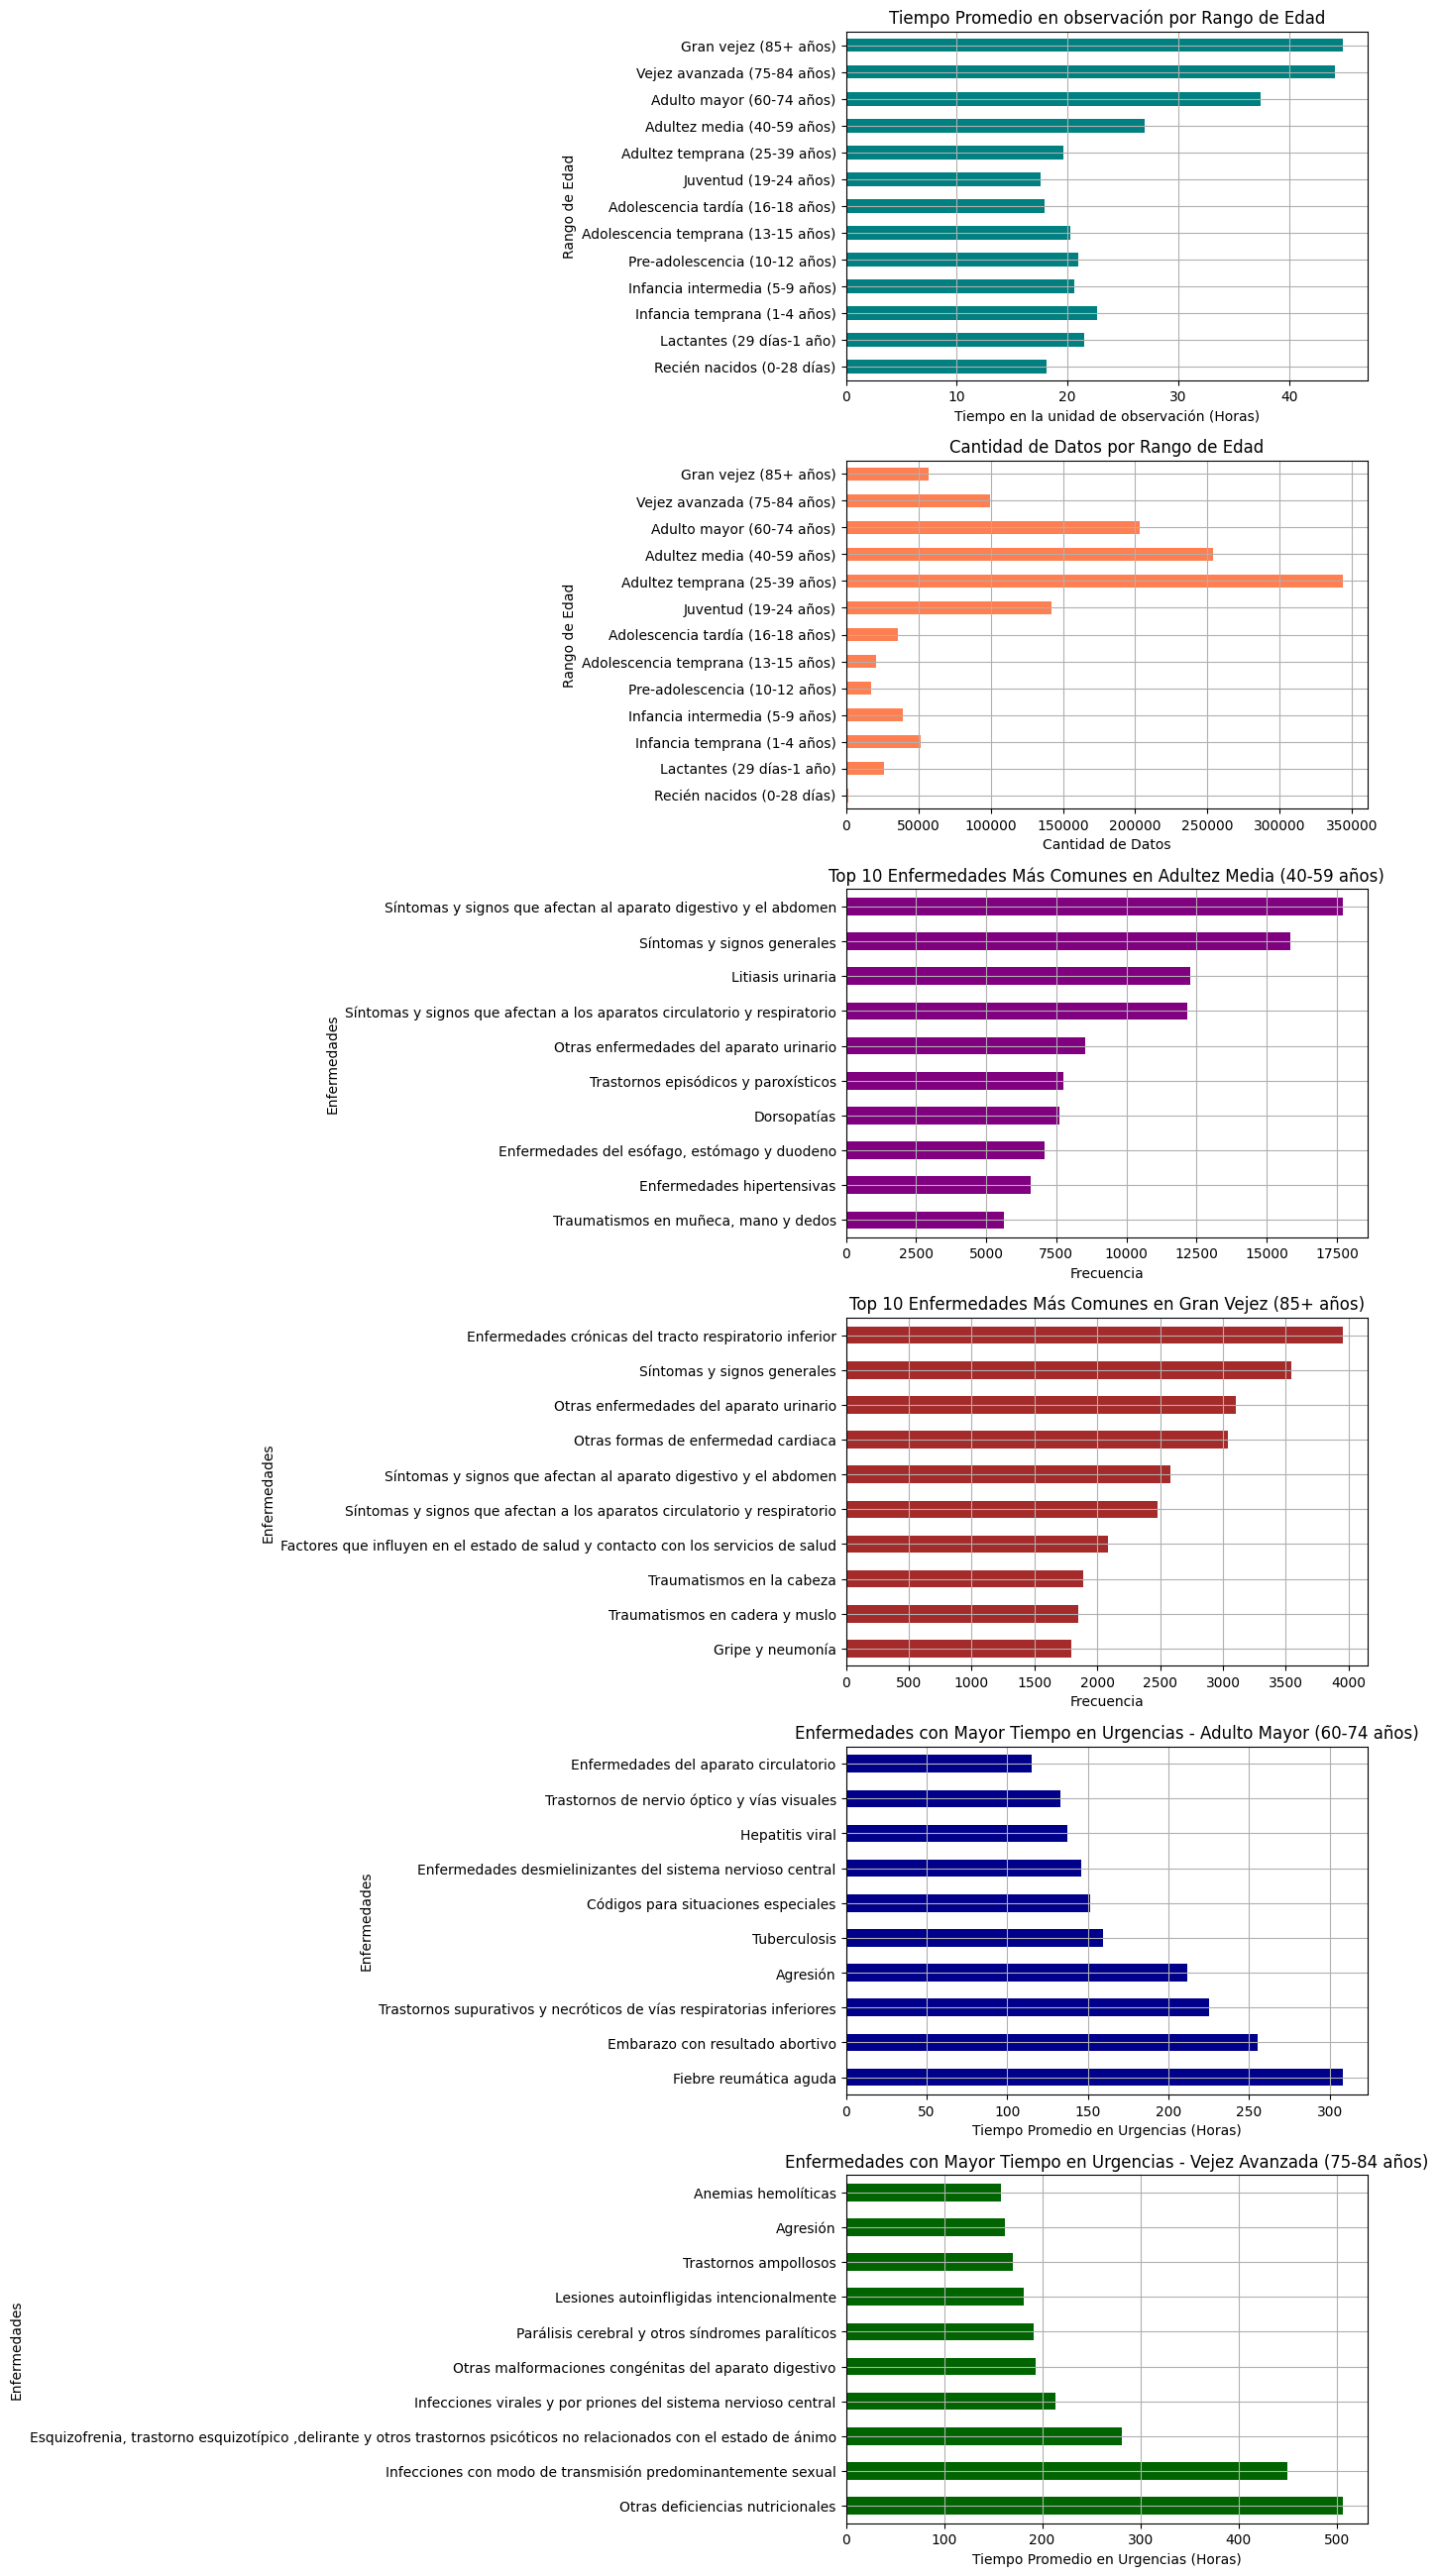

Top 10 enfermedades en adultez media (40-59 años):
DescripcionDiagnosticoPrincipal
Traumatismos en muñeca, mano y dedos                                         5625
Enfermedades hipertensivas                                                   6584
Enfermedades del esófago, estómago y duodeno                                 7088
Dorsopatías                                                                  7605
Trastornos episódicos y paroxísticos                                         7744
Otras enfermedades del aparato urinario                                      8512
Síntomas y signos que afectan a los aparatos circulatorio y respiratorio    12161
Litiasis urinaria                                                           12268
Síntomas y signos generales                                                 15841
Síntomas y signos que afectan al aparato digestivo y el abdomen             17710
Name: count, dtype: int64

Top 10 enfermedades en gran vejez (85+ años):
DescripcionDiagnosticoPr

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir los rangos de edad proporcionados
bins = [0, 28/365, 1, 4, 9, 12, 15, 18, 24, 39, 59, 74, 84, 110]  # Límites de edad en años
labels = [
    'Recién nacidos (0-28 días)',
    'Lactantes (29 días-1 año)',
    'Infancia temprana (1-4 años)',
    'Infancia intermedia (5-9 años)',
    'Pre-adolescencia (10-12 años)',
    'Adolescencia temprana (13-15 años)',
    'Adolescencia tardía (16-18 años)',
    'Juventud (19-24 años)',
    'Adultez temprana (25-39 años)',
    'Adultez media (40-59 años)',
    'Adulto mayor (60-74 años)',
    'Vejez avanzada (75-84 años)',
    'Gran vejez (85+ años)'
]

# Crear una nueva columna con los rangos de edad
df['RangoEdad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False)

# Calcular el tiempo promedio en urgencias para cada rango de edad
tiempo_promedio_por_rango = df.groupby('RangoEdad')['TiempoenUrgencias'].mean()

# Calcular la cantidad de datos por cada categoría de rango de edad
cantidad_por_rango = df['RangoEdad'].value_counts(sort=False)

# Calcular el Top 10 de enfermedades más comunes en la categoría 'Adultez media (40-59 años)'
df_adultez_media = df[df['RangoEdad'] == 'Adultez media (40-59 años)']
top_10_enfermedades_adultez_media = df_adultez_media['DescripcionDiagnosticoPrincipal'].value_counts().nlargest(10)

# Calcular el Top 10 de enfermedades más comunes en la categoría 'Gran vejez (85+ años)'
df_gran_vejez = df[df['RangoEdad'] == 'Gran vejez (85+ años)']
top_10_enfermedades_gran_vejez = df_gran_vejez['DescripcionDiagnosticoPrincipal'].value_counts().nlargest(10)

# Crear la figura de los gráficos
plt.figure(figsize=(14, 30))

# Gráfico 1: Tiempo promedio en urgencias por rango de edad
plt.subplot(7, 1, 1)
tiempo_promedio_por_rango.plot(kind='barh', color='teal')
plt.title('Tiempo Promedio en observación por Rango de Edad')
plt.ylabel('Rango de Edad')
plt.xlabel('Tiempo en la unidad de observación (Horas)')
plt.grid(True)

# Gráfico 2: Cantidad de datos por rango de edad
plt.subplot(7, 1, 2)
cantidad_por_rango.plot(kind='barh', color='coral')
plt.title('Cantidad de Datos por Rango de Edad')
plt.ylabel('Rango de Edad')
plt.xlabel('Cantidad de Datos')
plt.grid(True)

# Gráfico 3: Top 10 enfermedades más comunes en adultez media (40-59 años) - Orden Invertido
plt.subplot(7, 1, 3)
top_10_enfermedades_adultez_media = top_10_enfermedades_adultez_media.iloc[::-1]  # Invertir el orden
top_10_enfermedades_adultez_media.plot(kind='barh', color='purple')
plt.title('Top 10 Enfermedades Más Comunes en Adultez Media (40-59 años)')
plt.ylabel('Enfermedades')
plt.xlabel('Frecuencia')
plt.grid(True)

# Gráfico 4: Top 10 enfermedades más comunes en gran vejez (85+ años) - Orden Invertido
plt.subplot(7, 1, 4)
top_10_enfermedades_gran_vejez = top_10_enfermedades_gran_vejez.iloc[::-1]  # Invertir el orden
top_10_enfermedades_gran_vejez.plot(kind='barh', color='brown')
plt.title('Top 10 Enfermedades Más Comunes en Gran Vejez (85+ años)')
plt.ylabel('Enfermedades')
plt.xlabel('Frecuencia')
plt.grid(True)

# Gráfico 5: Enfermedades que más causan demoras en 'Adulto mayor (60-74 años)'
plt.subplot(7, 1, 5)
plt.gca().invert_yaxis()
top_enfermedades_adulto_mayor = (
    df[df['RangoEdad'] == 'Adulto mayor (60-74 años)']
    .groupby('DescripcionDiagnosticoPrincipal')['TiempoenUrgencias']
    .mean()
    .nlargest(10)
)
top_enfermedades_adulto_mayor.plot(kind='barh', color='darkblue')
plt.title('Enfermedades con Mayor Tiempo en Urgencias - Adulto Mayor (60-74 años)')
plt.ylabel('Enfermedades')
plt.xlabel('Tiempo Promedio en Urgencias (Horas)')
plt.grid(True)

# Gráfico 6: Enfermedades que más causan demoras en 'Vejez avanzada (75-84 años)'
plt.subplot(7, 1, 6)
plt.gca().invert_yaxis()
top_enfermedades_vejez_avanzada = (
    df[df['RangoEdad'] == 'Vejez avanzada (75-84 años)']
    .groupby('DescripcionDiagnosticoPrincipal')['TiempoenUrgencias']
    .mean()
    .nlargest(10)
)
top_enfermedades_vejez_avanzada.plot(kind='barh', color='darkgreen')
plt.title('Enfermedades con Mayor Tiempo en Urgencias - Vejez Avanzada (75-84 años)')
plt.ylabel('Enfermedades')
plt.xlabel('Tiempo Promedio en Urgencias (Horas)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Imprimir los Top 10 enfermedades
print("Top 10 enfermedades en adultez media (40-59 años):")
print(top_10_enfermedades_adultez_media)
print("\nTop 10 enfermedades en gran vejez (85+ años):")
print(top_10_enfermedades_gran_vejez)












# Hipotesis

## Que especialidad tienen IPS que mas se demoran

C:\Users\jpcan\AppData\Local\Temp\ipykernel_24064\3688336196.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_ips['FechaIngreso'] = pd.to_datetime(df_top_ips['FechaIngreso'], errors='coerce')
C:\Users\jpcan\AppData\Local\Temp\ipykernel_24064\3688336196.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_ips['Mes'] = df_top_ips['FechaIngreso'].dt.month_name()


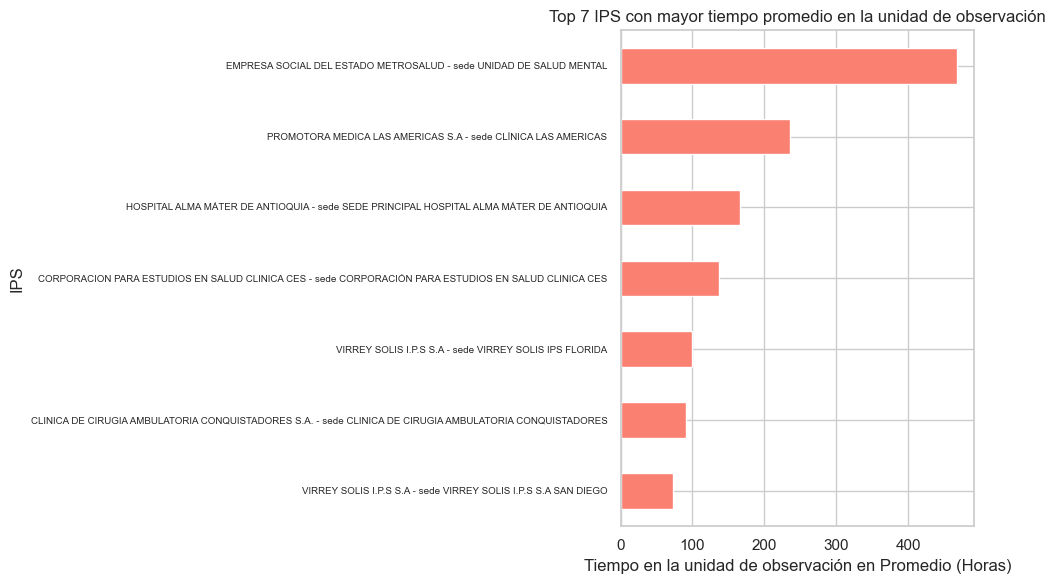

Top 7 IPS con mayor tiempo promedio en la unidad de observación:
NombrePrestadorSede
EMPRESA SOCIAL DEL ESTADO METROSALUD - sede UNIDAD DE SALUD MENTAL                                         468.257611
PROMOTORA MEDICA LAS AMERICAS S.A - sede CLÍNICA LAS AMERICAS                                              236.350755
HOSPITAL ALMA MÁTER DE ANTIOQUIA - sede SEDE PRINCIPAL HOSPITAL ALMA MÁTER DE ANTIOQUIA                    165.752516
CORPORACION PARA ESTUDIOS EN SALUD CLINICA CES - sede CORPORACIÓN PARA ESTUDIOS EN SALUD CLINICA CES       136.582472
VIRREY SOLIS I.P.S S.A - sede VIRREY SOLIS IPS FLORIDA                                                     100.000000
CLINICA DE CIRUGIA AMBULATORIA CONQUISTADORES S.A. - sede CLINICA DE CIRUGIA AMBULATORIA CONQUISTADORES     91.627381
VIRREY SOLIS I.P.S S.A - sede VIRREY SOLIS I.P.S S.A SAN DIEGO                                              72.986282
Name: TiempoenUrgencias, dtype: float64

Mes con mayor cantidad de registros para cada un

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar para excluir una IPS específica
df = df[df['NombrePrestadorSede'] != 'PROMOTORA MEDICA LAS AMERICAS S.A - sede Auna Centro Médico Las Américas sede Arkadia']

# Calcular el promedio de tiempo en urgencias por IPS
top_ips_tiempo_urgencias = df.groupby('NombrePrestadorSede')['TiempoenUrgencias'].mean().nlargest(7)

# Obtener las IPS con el mayor tiempo en urgencias
top_ips = top_ips_tiempo_urgencias.index

# Filtrar el DataFrame para obtener solo los registros de las IPS seleccionadas
df_top_ips = df[df['NombrePrestadorSede'].isin(top_ips)]

# Asegurarse de que la columna 'FechaIngreso' esté en formato datetime y extraer el mes
df_top_ips['FechaIngreso'] = pd.to_datetime(df_top_ips['FechaIngreso'], errors='coerce')
df_top_ips['Mes'] = df_top_ips['FechaIngreso'].dt.month_name()

# Calcular el mes con mayor cantidad de registros para cada una de las IPS
mes_mayor_registros_por_ips = (
    df_top_ips.groupby(['NombrePrestadorSede', 'Mes'])
    .size()
    .reset_index(name='Registros')
    .sort_values(['NombrePrestadorSede', 'Registros'], ascending=[True, False])
    .drop_duplicates(subset=['NombrePrestadorSede'])
    .set_index('NombrePrestadorSede')
)

# Calcular las enfermedades más comunes por IPS
enfermedades_mas_comunes_por_ips = (
    df_top_ips.groupby(['NombrePrestadorSede', 'DescripcionDiagnosticoPrincipal'])
    .size()
    .reset_index(name='Frecuencia')
    .sort_values(['NombrePrestadorSede', 'Frecuencia'], ascending=[True, False])
    .groupby('NombrePrestadorSede')
    .head(5)  # Obtener las 5 enfermedades más comunes por IPS
)

# Graficar las 10 IPS con mayor tiempo en urgencias + barra del promedio
plt.figure(figsize=(10, 6))
top_ips_tiempo_urgencias.plot(kind='barh', color='salmon')
plt.title('Top 7 IPS con mayor tiempo promedio en la unidad de observación')
plt.xlabel('Tiempo en la unidad de observación en Promedio (Horas)')
plt.ylabel('IPS')

# Reducir el tamaño de las etiquetas de las IPS en el eje y
plt.yticks(fontsize=7)

plt.gca().invert_yaxis()  # Invertir para que la IPS con mayor tiempo en urgencias esté arriba
plt.grid(True)

plt.tight_layout()
plt.show()

# Mostrar los resultados
print("Top 7 IPS con mayor tiempo promedio en la unidad de observación:")
print(top_ips_tiempo_urgencias)

print("\nMes con mayor cantidad de registros para cada una de las IPS:")
print(mes_mayor_registros_por_ips[['Mes', 'Registros']])

print("\nEnfermedades más comunes por IPS (Top 5):")
print(enfermedades_mas_comunes_por_ips)



In [8]:
import pandas as pd

# Definir los rangos de edad y etiquetas de grupo etario
bins = [0, 28/365, 1, 4, 9, 12, 15, 18, 24, 39, 59, 74, 84, 110]  # Límites de edad en años
labels = [
    'Recién nacidos (0-28 días)', 'Lactantes (29 días-1 año)', 'Infancia temprana (1-4 años)',
    'Infancia intermedia (5-9 años)', 'Pre-adolescencia (10-12 años)', 'Adolescencia temprana (13-15 años)',
    'Adolescencia tardía (16-18 años)', 'Juventud (19-24 años)', 'Adultez temprana (25-39 años)',
    'Adultez media (40-59 años)', 'Adulto mayor (60-74 años)', 'Vejez avanzada (75-84 años)', 'Gran vejez (85+ años)'
]

# Filtrar el DataFrame para la IPS específica
df_ips_mental = df[df['NombrePrestadorSede'] == 'HOSPITAL ALMA MÁTER DE ANTIOQUIA - sede SEDE PRINCIPAL HOSPITAL ALMA MÁTER DE ANTIOQUIA']

# Asignar el grupo etario según la columna 'Edad'
df_ips_mental['GrupoEtario'] = pd.cut(df_ips_mental['Edad'], bins=bins, labels=labels, right=False)

# Contar el número de registros por cada grupo etario
conteo_por_grupo = df_ips_mental['GrupoEtario'].value_counts().sort_index()

# Mostrar los resultados
print("Cantidad de registros por grupo etario para la IPS 'EMPRESA SOCIAL DEL ESTADO METROSALUD - sede UNIDAD DE SALUD MENTAL':")
print(conteo_por_grupo)

Cantidad de registros por grupo etario para la IPS 'EMPRESA SOCIAL DEL ESTADO METROSALUD - sede UNIDAD DE SALUD MENTAL':
GrupoEtario
Recién nacidos (0-28 días)               26
Lactantes (29 días-1 año)               813
Infancia temprana (1-4 años)           2026
Infancia intermedia (5-9 años)         1721
Pre-adolescencia (10-12 años)           810
Adolescencia temprana (13-15 años)      855
Adolescencia tardía (16-18 años)        748
Juventud (19-24 años)                  2448
Adultez temprana (25-39 años)          7302
Adultez media (40-59 años)            12595
Adulto mayor (60-74 años)             17122
Vejez avanzada (75-84 años)           11527
Gran vejez (85+ años)                  7584
Name: count, dtype: int64


C:\Users\jpcan\AppData\Local\Temp\ipykernel_18884\4059724721.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ips_mental['GrupoEtario'] = pd.cut(df_ips_mental['Edad'], bins=bins, labels=labels, right=False)


In [ ]:
import pandas as pd

# Filtrar el DataFrame para obtener solo los registros de la IPS especificada
ips_especifica = "EMPRESA SOCIAL DEL ESTADO METROSALUD - sede UNIDAD DE SALUD MENTAL"
df_ips_especifica = df[df['NombrePrestadorSede'] == ips_especifica]

# Asegurarse de que 'FechaIngreso' esté en formato datetime y extraer el mes
df_ips_especifica['FechaIngreso'] = pd.to_datetime(df_ips_especifica['FechaIngreso'], errors='coerce')
df_ips_especifica['Mes'] = df_ips_especifica['FechaIngreso'].dt.month_name()

# Contar el número de registros por mes
registros_por_mes = df_ips_especifica['Mes'].value_counts()

# Obtener el mes con el mayor número de registros
mes_mayor_registros = registros_por_mes.idxmax()
cantidad_mayor_registros = registros_por_mes.max()

# Mostrar resultados
print(f"Mes con mayor cantidad de registros para la IPS '{ips_especifica}':")
print(f"{mes_mayor_registros} con {cantidad_mayor_registros} registros")

print("\nCantidad de registros por mes:")
print(registros_por_mes)


Mes con mayor cantidad de registros para la IPS 'EMPRESA SOCIAL DEL ESTADO METROSALUD - sede UNIDAD DE SALUD MENTAL':
March con 54 registros

Cantidad de registros por mes:
Mes
March        54
April        35
February     34
October      32
September    29
June         28
May          27
August       27
July         26
December     21
January      20
November     13
Name: count, dtype: int64


C:\Users\jpcan\AppData\Local\Temp\ipykernel_18884\2968133767.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ips_especifica['FechaIngreso'] = pd.to_datetime(df_ips_especifica['FechaIngreso'], errors='coerce')
C:\Users\jpcan\AppData\Local\Temp\ipykernel_18884\2968133767.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ips_especifica['Mes'] = df_ips_especifica['FechaIngreso'].dt.month_name()


In [11]:
import pandas as pd

# Filtrar los datos para la IPS específica
ips_especifica = 'VIRREY SOLIS I.P.S S.A - sede VIRREY SOLIS I.P.S S.A SAN DIEGO'
df_ips = df[df['NombrePrestadorSede'] == ips_especifica]

# Filtrar registros donde alguna columna de diagnóstico contiene la palabra 'respiratorio'
enfermedad_respiratoria = df_ips[
    df_ips['DescripcionDiagnosticoPrincipal'].str.contains('respiratorio', case=False, na=False) |
    df_ips['DescripcionDiagnosticoRelacionado_uno'].str.contains('respiratorio', case=False, na=False) |
    df_ips['DescripcionDiagnosticoRelacionado_dos'].str.contains('respiratorio', case=False, na=False) |
    df_ips['DescripcionDiagnosticoRelacionado_tres'].str.contains('respiratorio', case=False, na=False)
]

# Calcular el porcentaje
porcentaje_respiratorio = (enfermedad_respiratoria.shape[0] / df_ips.shape[0]) * 100

# Imprimir el resultado
print(f"El porcentaje de registros con enfermedades relacionadas con 'respiratorio' en la IPS '{ips_especifica}' es: {porcentaje_respiratorio:.2f}%")


El porcentaje de registros con enfermedades relacionadas con 'respiratorio' en la IPS 'VIRREY SOLIS I.P.S S.A - sede VIRREY SOLIS I.P.S S.A SAN DIEGO' es: 18.36%


# Estadisticas IPS Publica y Privada

Resultados:
Promedio de Tiempo en Urgencias por Tipo de IPS:
TipoDeIPS
Privado    19.983491
Público    37.283338
Name: TiempoenUrgencias, dtype: float64

Cantidad Promedio de Registros por IPS:
TipoDeIPS
Privado    14220.290909
Público     9259.836364
dtype: float64

Promedio de Ocupación por Tipo de IPS:
TipoDeIPS
Privado    199.815353
Público    208.891371
Name: Hospitaloccupancy, dtype: float64

Máxima ocupación registrada en IPS privadas: 1832.0
Máxima ocupación registrada en IPS públicas: 682.0
Total de registros en IPS privadas: 782116
Total de registros en IPS públicas: 509291



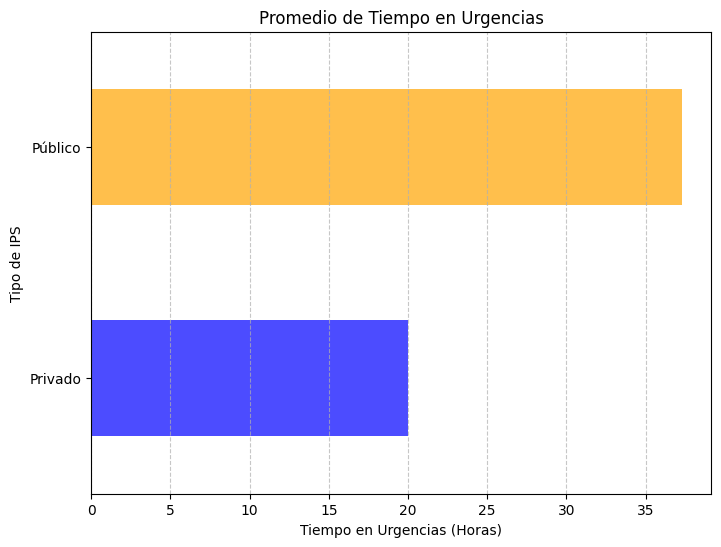

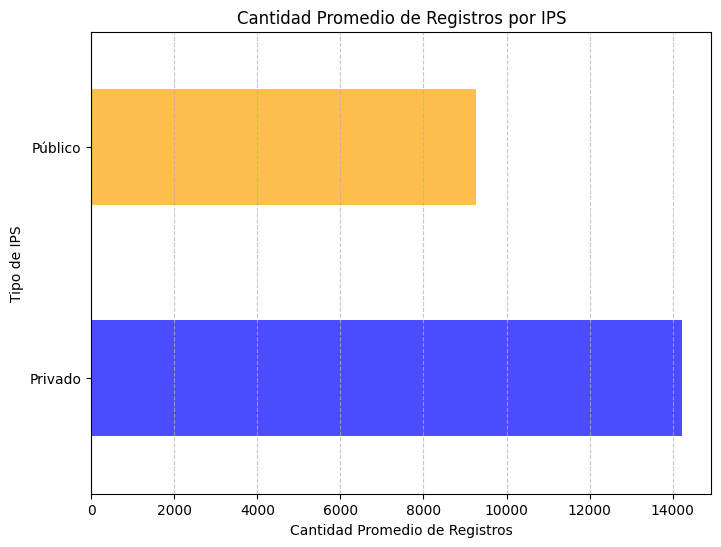

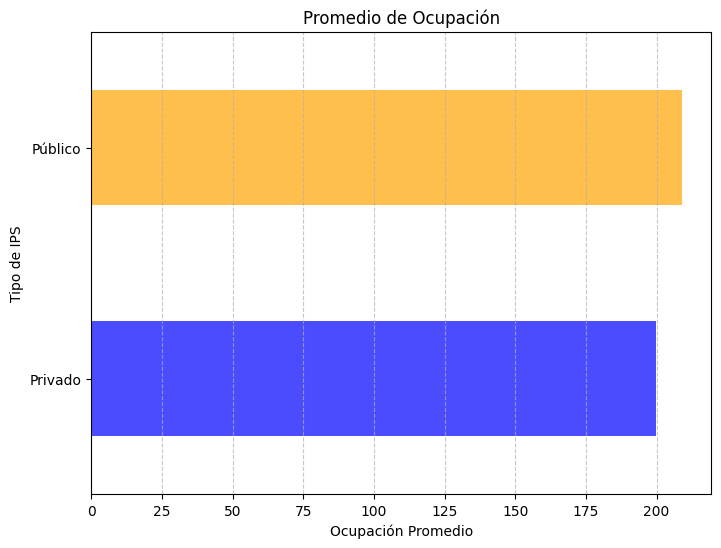

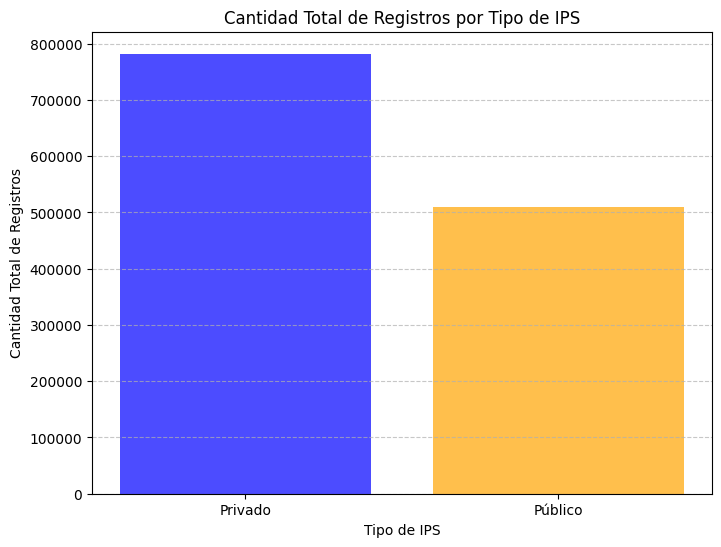

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el DataFrame para excluir la categoría "No identificado" en TipoDeIPS
df_filtrado = df[df['TipoDeIPS'] != 'No identificado']

# 1. Calcular el promedio de tiempo en urgencias para cada tipo de IPS
promedio_tiempo_urgencias = df_filtrado.groupby('TipoDeIPS')['TiempoenUrgencias'].mean()

# 2. Calcular la cantidad promedio de registros por IPS para cada tipo de IPS
cantidad_promedio_registros = df_filtrado.groupby('TipoDeIPS').size() / df_filtrado['NombrePrestadorSede'].nunique()

# 3. Calcular el promedio de ocupación para cada tipo de IPS
promedio_ocupacion = df_filtrado.groupby('TipoDeIPS')['Hospitaloccupancy'].mean()

# 4. Calcular la máxima ocupación registrada en pública y privada
max_ocupacion_privada = df_filtrado[df_filtrado['TipoDeIPS'] == 'Privado']['Hospitaloccupancy'].max()
max_ocupacion_publica = df_filtrado[df_filtrado['TipoDeIPS'] == 'Público']['Hospitaloccupancy'].max()

# 5. Calcular la cantidad total de registros para pública y privada
total_registros_privada = df_filtrado[df_filtrado['TipoDeIPS'] == 'Privado'].shape[0]
total_registros_publica = df_filtrado[df_filtrado['TipoDeIPS'] == 'Público'].shape[0]

# Imprimir los resultados en texto
print("Resultados:")
print(f"Promedio de Tiempo en Urgencias por Tipo de IPS:\n{promedio_tiempo_urgencias}\n")
print(f"Cantidad Promedio de Registros por IPS:\n{cantidad_promedio_registros}\n")
print(f"Promedio de Ocupación por Tipo de IPS:\n{promedio_ocupacion}\n")
print(f"Máxima ocupación registrada en IPS privadas: {max_ocupacion_privada}")
print(f"Máxima ocupación registrada en IPS públicas: {max_ocupacion_publica}")
print(f"Total de registros en IPS privadas: {total_registros_privada}")
print(f"Total de registros en IPS públicas: {total_registros_publica}\n")

# Crear gráficos independientes

# Gráfico 1: Promedio de tiempo en urgencias
plt.figure(figsize=(8, 6))
promedio_tiempo_urgencias.plot(kind='barh', color=['blue', 'orange'], alpha=0.7)
plt.title('Promedio de Tiempo en Urgencias')
plt.xlabel('Tiempo en Urgencias (Horas)')
plt.ylabel('Tipo de IPS')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Gráfico 2: Cantidad promedio de registros por IPS
plt.figure(figsize=(8, 6))
cantidad_promedio_registros.plot(kind='barh', color=['blue', 'orange'], alpha=0.7)
plt.title('Cantidad Promedio de Registros por IPS')
plt.xlabel('Cantidad Promedio de Registros')
plt.ylabel('Tipo de IPS')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Gráfico 3: Promedio de ocupación
plt.figure(figsize=(8, 6))
promedio_ocupacion.plot(kind='barh', color=['blue', 'orange'], alpha=0.7)
plt.title('Promedio de Ocupación')
plt.xlabel('Ocupación Promedio')
plt.ylabel('Tipo de IPS')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Gráfico 4: Cantidad total de registros por IPS
plt.figure(figsize=(8, 6))
plt.bar(['Privado', 'Público'], [total_registros_privada, total_registros_publica], color=['blue', 'orange'], alpha=0.7)
plt.title('Cantidad Total de Registros por Tipo de IPS')
plt.xlabel('Tipo de IPS')
plt.ylabel('Cantidad Total de Registros')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





Cantidad de IPS públicas que cumplen con el estándar de calidad: 10
IPS públicas que cumplen con el estándar de calidad:
NombrePrestadorSede
EMPRESA SOCIAL DEL ESTADO METROSALUD - sede CENTRO DE SALUD SANTO DOMINGO                                                                                                  6.722499
EMPRESA SOCIAL DEL ESTADO METROSALUD - sede SEDE ADMINISTRATIVA EDIFICIO SACATIN                                                                                          17.611124
EMPRESA SOCIAL DEL ESTADO METROSALUD - sede UNIDAD HOSPITALARIA DE BELEN HECTOR ABAD GOMEZ                                                                                12.993020
EMPRESA SOCIAL DEL ESTADO METROSALUD - sede UNIDAD HOSPITALARIA DE CASTILLA JAIME TOBON ARBELAEZ                                                                          20.463415
EMPRESA SOCIAL DEL ESTADO METROSALUD - sede UNIDAD HOSPITALARIA DE MANRRIQUE HERMENEGILDO DE FEX                                           

C:\Users\jpcan\AppData\Local\Temp\ipykernel_47944\2384419007.py:68: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


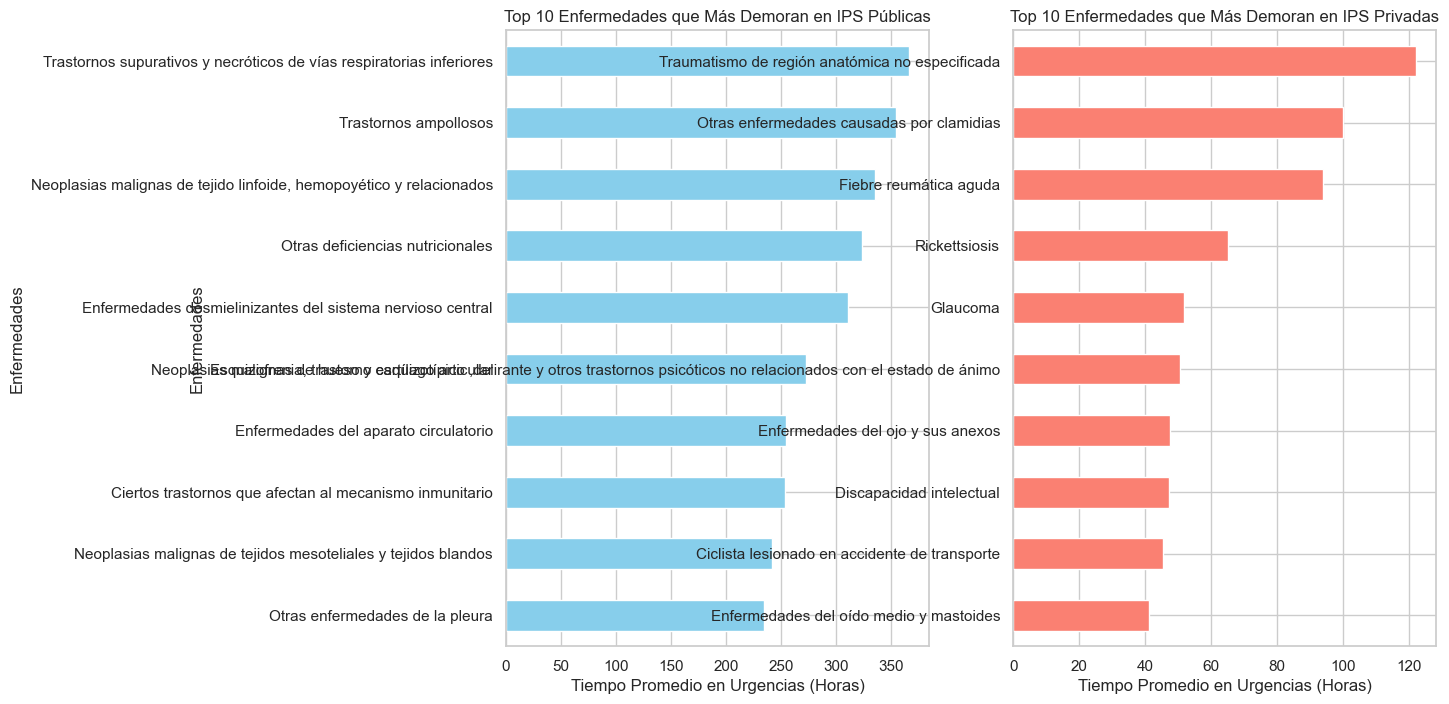

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


estandar_calidad = 24

# Definir las IPS públicas en el dataset (según información previa)
ips_publicas = [
    'EMPRESA SOCIAL DEL ESTADO METROSALUD',
    'HOSPITAL ALMA MÁTER DE ANTIOQUIA',
    'HOSPITAL GENERAL DE MEDELLIN',
    'ESE HOSPITAL LA MARIA'
]

# Crear una columna para clasificar las IPS como públicas o privadas
df['TipoDeIPS'] = df['NombrePrestadorSede'].apply(lambda x: 'Publica' if any(ips in x for ips in ips_publicas) else 'Privada')

# Calcular la cantidad de IPS públicas que cumplen con el estándar de calidad (promedio de urgencias menos de 120 horas)
ips_publicas_cumplen = df[df['TipoDeIPS'] == 'Publica'].groupby('NombrePrestadorSede')['TiempoenUrgencias'].mean()
ips_publicas_cumplen = ips_publicas_cumplen[ips_publicas_cumplen < estandar_calidad]
cantidad_ips_publicas_cumplen = len(ips_publicas_cumplen)

# Obtener las 10 enfermedades que más demoran en IPS públicas y privadas (promedio de tiempo en urgencias)
top_10_enfermedades_publicas = (
    df[df['TipoDeIPS'] == 'Publica']
    .groupby('DescripcionDiagnosticoPrincipal')['TiempoenUrgencias']
    .mean()
    .nlargest(10)
)
top_10_enfermedades_privadas = (
    df[df['TipoDeIPS'] == 'Privada']
    .groupby('DescripcionDiagnosticoPrincipal')['TiempoenUrgencias']
    .mean()
    .nlargest(10)
)

# Imprimir información sobre las IPS públicas que cumplen con el estándar de calidad
print(f"Cantidad de IPS públicas que cumplen con el estándar de calidad: {cantidad_ips_publicas_cumplen}")
print("IPS públicas que cumplen con el estándar de calidad:")
print(ips_publicas_cumplen)

# Imprimir las 10 enfermedades que más demoran en IPS públicas y privadas
print("\nTop 10 enfermedades que más demoran en IPS públicas (promedio de tiempo en urgencias):")
print(top_10_enfermedades_publicas)

print("\nTop 10 enfermedades que más demoran en IPS privadas (promedio de tiempo en urgencias):")
print(top_10_enfermedades_privadas)

# Opcional: Crear gráficos de las 10 enfermedades que más demoran para IPS públicas y privadas
plt.figure(figsize=(12, 8))

# Gráfico para IPS Públicas
plt.subplot(1, 2, 1)
top_10_enfermedades_publicas.plot(kind='barh', color='skyblue')
plt.title('Top 10 Enfermedades que Más Demoran en IPS Públicas')
plt.xlabel('Tiempo Promedio en Urgencias (Horas)')
plt.ylabel('Enfermedades')
plt.gca().invert_yaxis()  # Invertir el orden para que el mayor tiempo esté arriba

# Gráfico para IPS Privadas
plt.subplot(1, 2, 2)
top_10_enfermedades_privadas.plot(kind='barh', color='salmon')
plt.title('Top 10 Enfermedades que Más Demoran en IPS Privadas')
plt.xlabel('Tiempo Promedio en Urgencias (Horas)')
plt.ylabel('Enfermedades')
plt.gca().invert_yaxis()  # Invertir el orden para que el mayor tiempo esté arriba

plt.tight_layout()
plt.show()


## Que dias o epocas del año es cuando hay mayor ocupación 

Tipos de datos después de la conversión en la copia:
FechaIngreso    datetime64[ns]
HoraIngreso              int32
dtype: object

Valores únicos en 'HoraIngreso' después de la conversión en la copia:
[23  5  7  9 14  8  6 22 10  4  3 15  1 16 19 21  2 17 11 18 20 12 13  0]


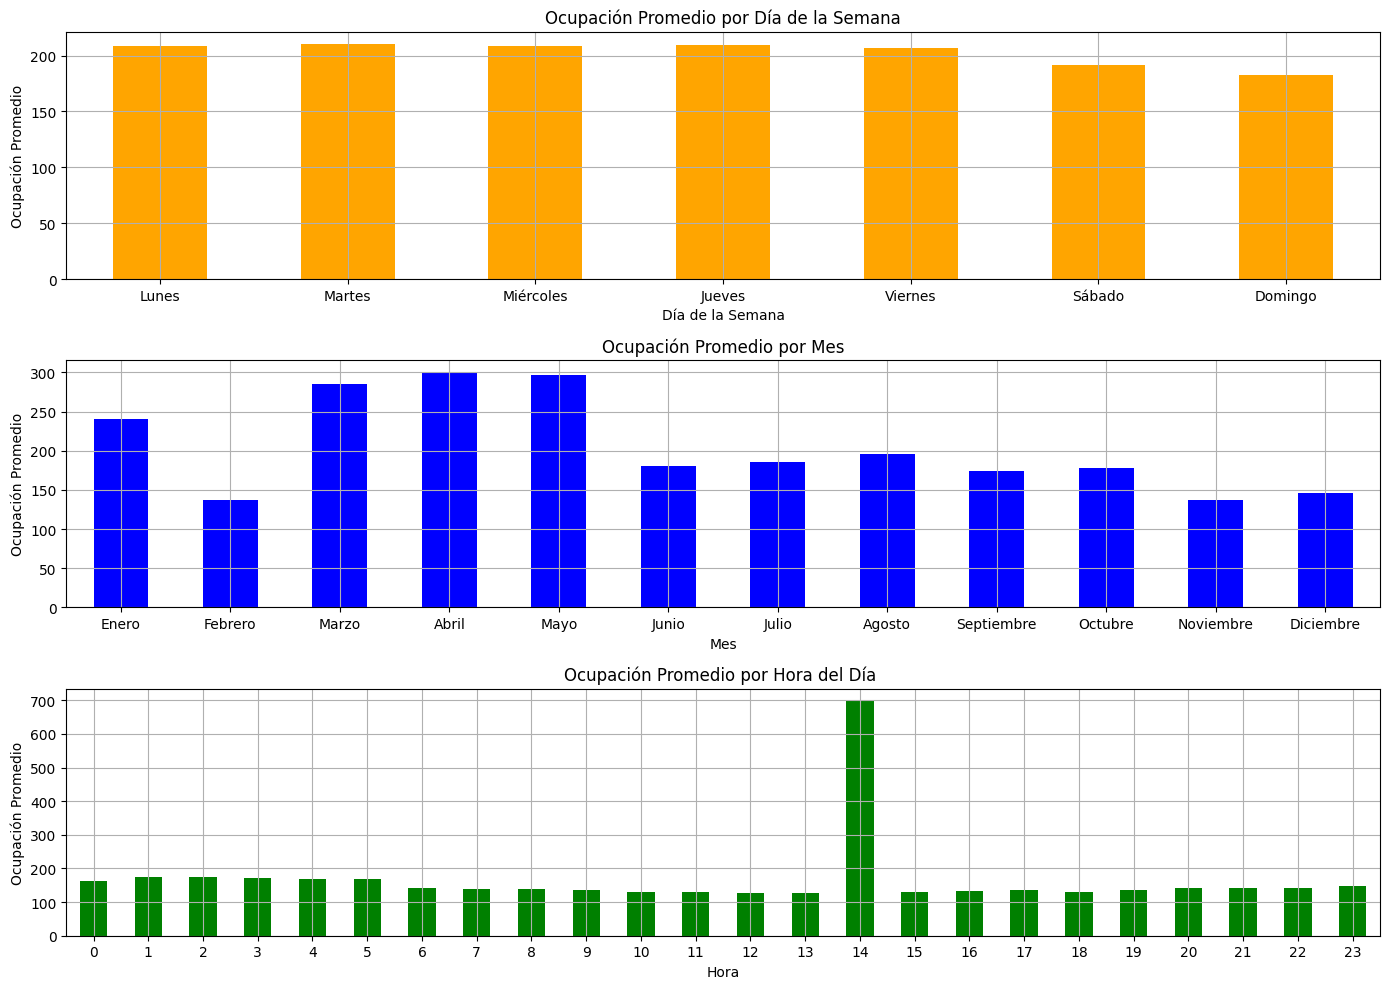

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear una copia del DataFrame original para trabajar sin afectar el original
df_copy = df.copy()

# Convertir 'FechaIngreso' a formato datetime en la copia
df_copy['FechaIngreso'] = pd.to_datetime(df_copy['FechaIngreso'], errors='coerce')

# Convertir 'HoraIngreso' a formato de hora en la copia (extraer solo la hora)
df_copy['HoraIngreso'] = pd.to_datetime(df_copy['HoraIngreso'], format='%H:%M', errors='coerce').dt.hour

# Verificar los cambios en la copia
print("Tipos de datos después de la conversión en la copia:")
print(df_copy[['FechaIngreso', 'HoraIngreso']].dtypes)

print("\nValores únicos en 'HoraIngreso' después de la conversión en la copia:")
print(df_copy['HoraIngreso'].unique())

# Extraer día de la semana, mes y hora para el análisis en la copia (en inglés)
df_copy['DiaSemana'] = df_copy['FechaIngreso'].dt.day_name()  # Días de la semana en inglés
df_copy['Mes'] = df_copy['FechaIngreso'].dt.month_name()  # Mes en inglés
df_copy['Hora'] = df_copy['HoraIngreso']  # Hora de ingreso

# Paso 1: Agrupar por día de la semana y calcular la ocupación promedio
orden_dia_semana = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ocupacion_por_dia = (
    df_copy.groupby('DiaSemana')['Hospitaloccupancy']
    .mean()
    .reindex(orden_dia_semana)  # Ordenar cronológicamente
)

# Paso 2: Agrupar por mes y calcular la ocupación promedio
orden_mes = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
ocupacion_por_mes = (
    df_copy.groupby('Mes')['Hospitaloccupancy']
    .mean()
    .reindex(orden_mes)  # Ordenar cronológicamente
)

# Paso 3: Agrupar por hora y calcular la ocupación promedio, excluyendo la hora 2 p.m.
ocupacion_por_hora = df_copy.groupby('Hora')['Hospitaloccupancy'].mean().sort_index()

# Traducciones para las gráficas
dias_semana_esp = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
meses_esp = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

# Visualización de los resultados

# Gráfico de ocupación por día de la semana
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
ocupacion_por_dia.index = dias_semana_esp  # Traducir los días de la semana al español
ocupacion_por_dia.plot(kind='bar', color='orange')
plt.title('Ocupación Promedio por Día de la Semana')
plt.ylabel('Ocupación Promedio')
plt.xlabel('Día de la Semana')
plt.xticks(rotation=0)  # Etiquetas en horizontal
plt.grid(True)

# Gráfico de ocupación por mes
plt.subplot(3, 1, 2)
ocupacion_por_mes.index = meses_esp  # Traducir los meses al español
ocupacion_por_mes.plot(kind='bar', color='blue')
plt.title('Ocupación Promedio por Mes')
plt.ylabel('Ocupación Promedio')
plt.xlabel('Mes')
plt.xticks(rotation=0)  # Etiquetas en horizontal
plt.grid(True)

# Gráfico de ocupación por hora
plt.subplot(3, 1, 3)
ocupacion_por_hora.plot(kind='bar', color='green')
plt.title('Ocupación Promedio por Hora del Día ')
plt.ylabel('Ocupación Promedio')
plt.xlabel('Hora')
plt.xticks(rotation=0)  # Etiquetas en horizontal
plt.grid(True)

plt.tight_layout()
plt.show()

Tipos de datos después de la conversión en la copia:
FechaIngreso    datetime64[ns]
HoraIngreso              int32
dtype: object

Valores únicos en 'HoraIngreso' después de la conversión en la copia:
[23  5  7  9 14  8  6 22 10  4  3 15  1 16 19 21  2 17 11 18 20 12 13  0]


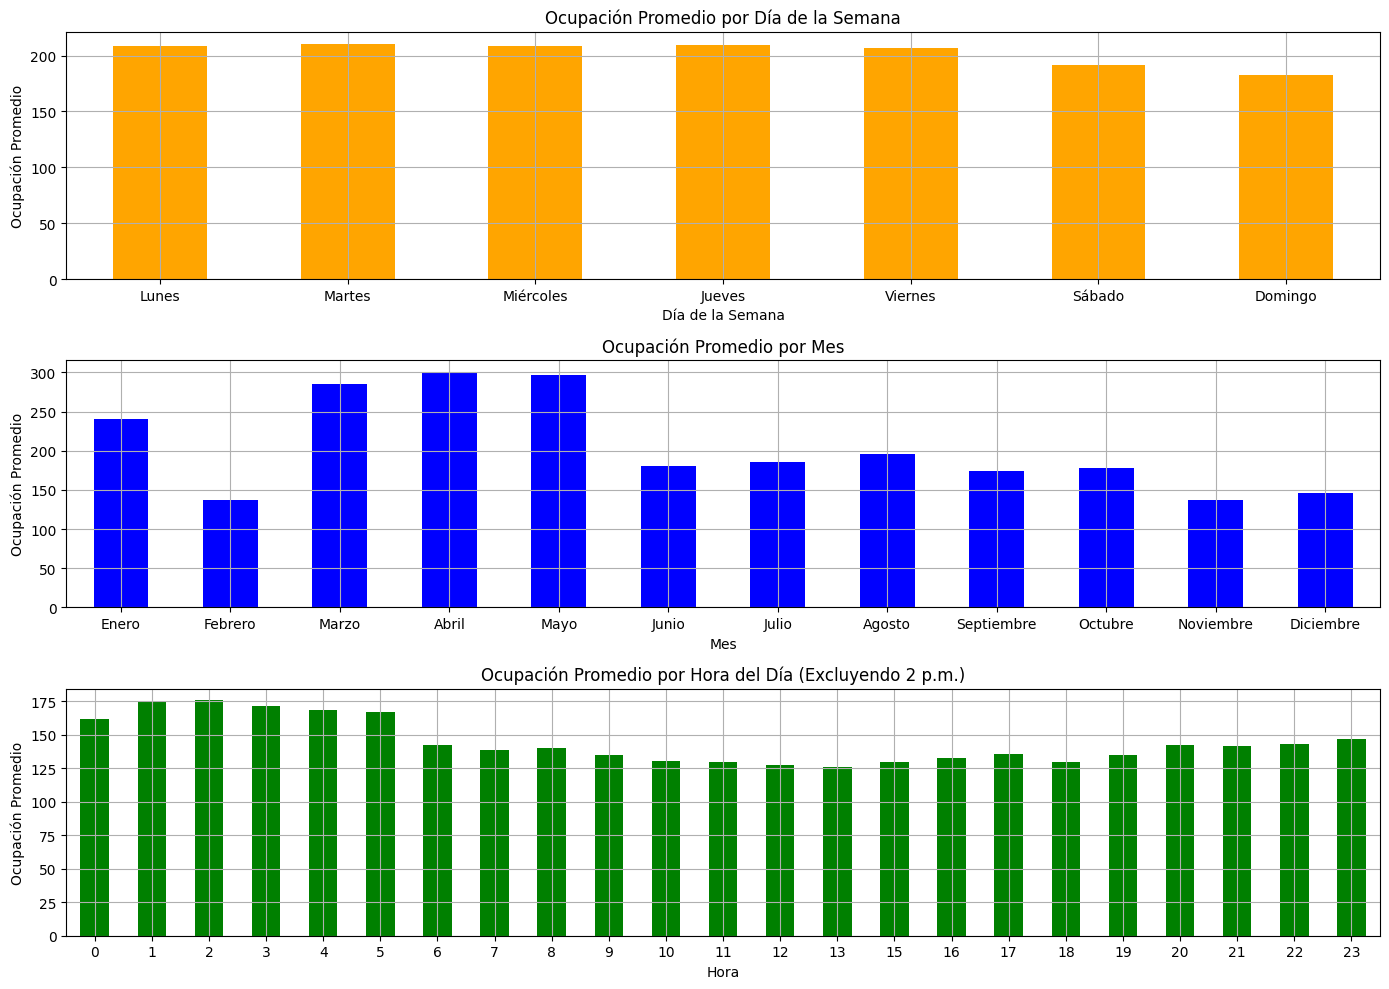

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear una copia del DataFrame original para trabajar sin afectar el original
df_copy = df.copy()

# Convertir 'FechaIngreso' a formato datetime en la copia
df_copy['FechaIngreso'] = pd.to_datetime(df_copy['FechaIngreso'], errors='coerce')

# Convertir 'HoraIngreso' a formato de hora en la copia (extraer solo la hora)
df_copy['HoraIngreso'] = pd.to_datetime(df_copy['HoraIngreso'], format='%H:%M', errors='coerce').dt.hour

# Verificar los cambios en la copia
print("Tipos de datos después de la conversión en la copia:")
print(df_copy[['FechaIngreso', 'HoraIngreso']].dtypes)

print("\nValores únicos en 'HoraIngreso' después de la conversión en la copia:")
print(df_copy['HoraIngreso'].unique())

# Extraer día de la semana, mes y hora para el análisis en la copia (en inglés)
df_copy['DiaSemana'] = df_copy['FechaIngreso'].dt.day_name()  # Días de la semana en inglés
df_copy['Mes'] = df_copy['FechaIngreso'].dt.month_name()  # Mes en inglés
df_copy['Hora'] = df_copy['HoraIngreso']  # Hora de ingreso

# Paso 1: Agrupar por día de la semana y calcular la ocupación promedio
orden_dia_semana = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ocupacion_por_dia = (
    df_copy.groupby('DiaSemana')['Hospitaloccupancy']
    .mean()
    .reindex(orden_dia_semana)  # Ordenar cronológicamente
)

# Paso 2: Agrupar por mes y calcular la ocupación promedio
orden_mes = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
ocupacion_por_mes = (
    df_copy.groupby('Mes')['Hospitaloccupancy']
    .mean()
    .reindex(orden_mes)  # Ordenar cronológicamente
)

# Paso 3: Agrupar por hora y calcular la ocupación promedio, excluyendo la hora 2 p.m.
ocupacion_por_hora = df_copy[df_copy['Hora'] != 14].groupby('Hora')['Hospitaloccupancy'].mean().sort_index()

# Traducciones para las gráficas
dias_semana_esp = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
meses_esp = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

# Visualización de los resultados

# Gráfico de ocupación por día de la semana
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
ocupacion_por_dia.index = dias_semana_esp  # Traducir los días de la semana al español
ocupacion_por_dia.plot(kind='bar', color='orange')
plt.title('Ocupación Promedio por Día de la Semana')
plt.ylabel('Ocupación Promedio')
plt.xlabel('Día de la Semana')
plt.xticks(rotation=0)  # Etiquetas en horizontal
plt.grid(True)

# Gráfico de ocupación por mes
plt.subplot(3, 1, 2)
ocupacion_por_mes.index = meses_esp  # Traducir los meses al español
ocupacion_por_mes.plot(kind='bar', color='blue')
plt.title('Ocupación Promedio por Mes')
plt.ylabel('Ocupación Promedio')
plt.xlabel('Mes')
plt.xticks(rotation=0)  # Etiquetas en horizontal
plt.grid(True)

# Gráfico de ocupación por hora
plt.subplot(3, 1, 3)
ocupacion_por_hora.plot(kind='bar', color='green')
plt.title('Ocupación Promedio por Hora del Día (Excluyendo 2 p.m.)')
plt.ylabel('Ocupación Promedio')
plt.xlabel('Hora')
plt.xticks(rotation=0)  # Etiquetas en horizontal
plt.grid(True)

plt.tight_layout()
plt.show()








Tipos de datos después de la conversión en la copia:
FechaIngreso    datetime64[ns]
HoraIngreso              int32
dtype: object

Valores únicos en 'HoraIngreso' después de la conversión en la copia:
[23  5  7  9 14  8  6 22 10  4  3 15  1 16 19 21  2 17 11 18 20 12 13  0]


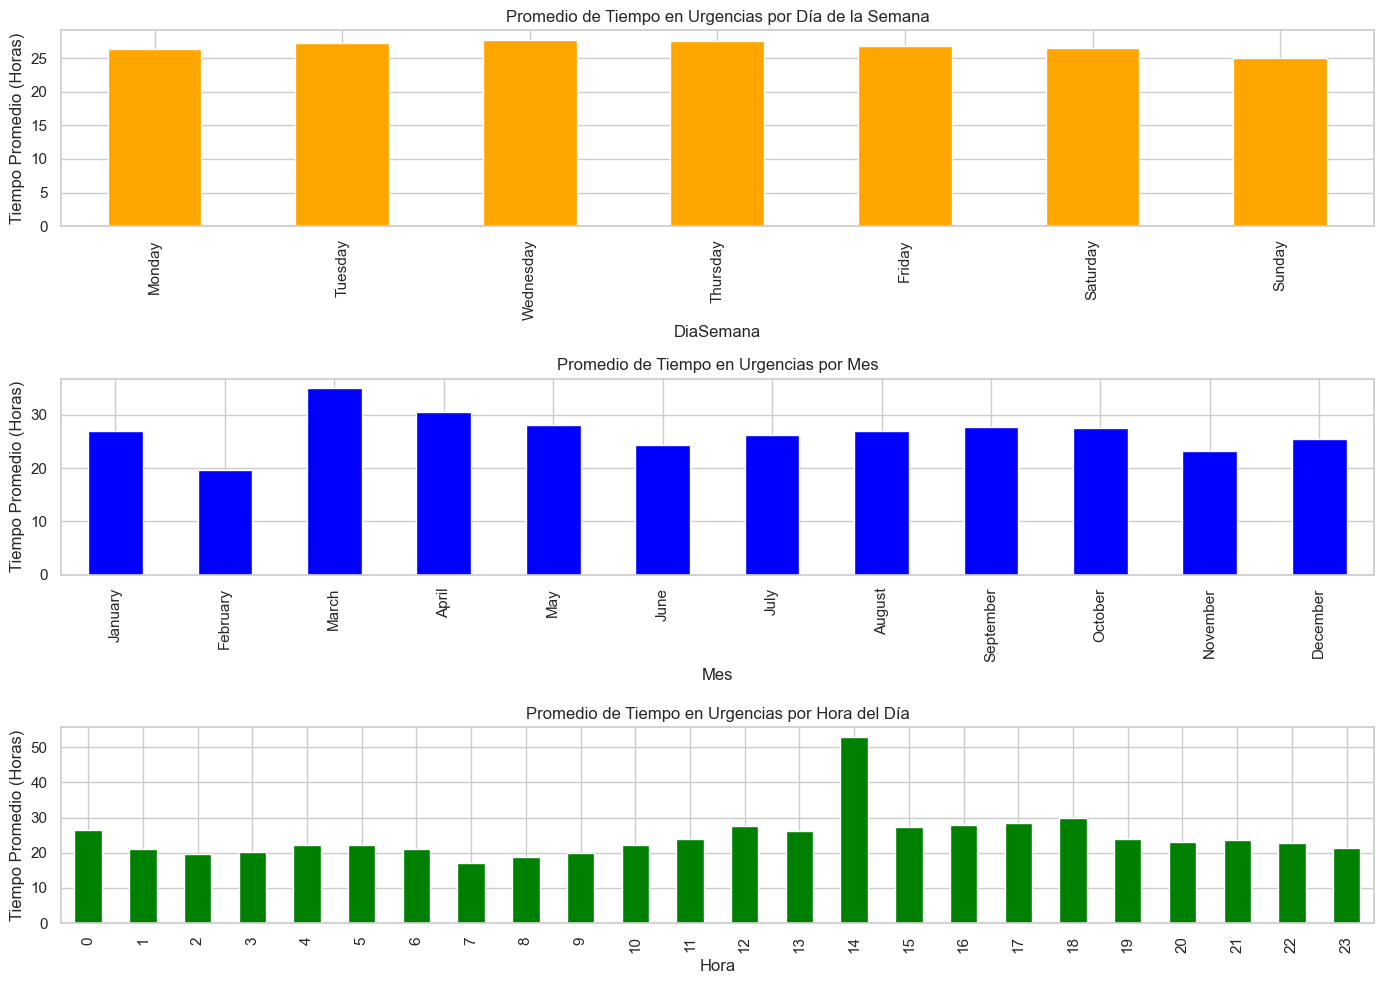

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear una copia del DataFrame original para trabajar sin afectar el original
df_copy = df.copy()

# Convertir 'FechaIngreso' a formato datetime en la copia
df_copy['FechaIngreso'] = pd.to_datetime(df_copy['FechaIngreso'], errors='coerce')

# Convertir 'HoraIngreso' a formato de hora en la copia (extraer solo la hora)
df_copy['HoraIngreso'] = pd.to_datetime(df_copy['HoraIngreso'], format='%H:%M', errors='coerce').dt.hour

# Verificar los cambios en la copia
print("Tipos de datos después de la conversión en la copia:")
print(df_copy[['FechaIngreso', 'HoraIngreso']].dtypes)

print("\nValores únicos en 'HoraIngreso' después de la conversión en la copia:")
print(df_copy['HoraIngreso'].unique())

# Extraer día de la semana, mes y hora para el análisis en la copia
df_copy['DiaSemana'] = df_copy['FechaIngreso'].dt.day_name()  # Días de la semana
df_copy['Mes'] = df_copy['FechaIngreso'].dt.month_name()  # Mes
df_copy['Hora'] = df_copy['HoraIngreso']  # Hora de ingreso

# Paso 1: Agrupar por día de la semana y calcular el promedio de tiempo en urgencias
orden_dia_semana = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
tiempo_por_dia = (
    df_copy.groupby('DiaSemana')['TiempoenUrgencias']
    .mean()
    .reindex(orden_dia_semana)  # Ordenar cronológicamente
)

# Paso 2: Agrupar por mes y calcular el promedio de tiempo en urgencias
orden_mes = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
tiempo_por_mes = (
    df_copy.groupby('Mes')['TiempoenUrgencias']
    .mean()
    .reindex(orden_mes)  # Ordenar cronológicamente
)

# Paso 3: Agrupar por hora y calcular el promedio de tiempo en urgencias
tiempo_por_hora = df_copy.groupby('Hora')['TiempoenUrgencias'].mean().sort_index()  # Ordenar por hora ascendente

# Visualización de los resultados

# Gráfico del promedio de tiempo en urgencias por día de la semana
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
tiempo_por_dia.plot(kind='bar', color='orange')
plt.title('Promedio de Tiempo en Urgencias por Día de la Semana')
plt.ylabel('Tiempo Promedio (Horas)')
plt.grid(True)

# Gráfico del promedio de tiempo en urgencias por mes
plt.subplot(3, 1, 2)
tiempo_por_mes.plot(kind='bar', color='blue')
plt.title('Promedio de Tiempo en Urgencias por Mes')
plt.ylabel('Tiempo Promedio (Horas)')
plt.grid(True)

# Gráfico del promedio de tiempo en urgencias por hora
plt.subplot(3, 1, 3)
tiempo_por_hora.plot(kind='bar', color='green')
plt.title('Promedio de Tiempo en Urgencias por Hora del Día')
plt.ylabel('Tiempo Promedio (Horas)')
plt.xlabel('Hora')
plt.grid(True)

plt.tight_layout()
plt.show()


# Probar que hay horas especificas donde registran para la salida y para la entrada de paceintes (Como una hora predeterminada donde suben los datos de llegada de los paceintes y tambien cuando salen) Por lo tanto se crea una ilusión de que la hora en donde las IPS estan mas llenas es a las 2.

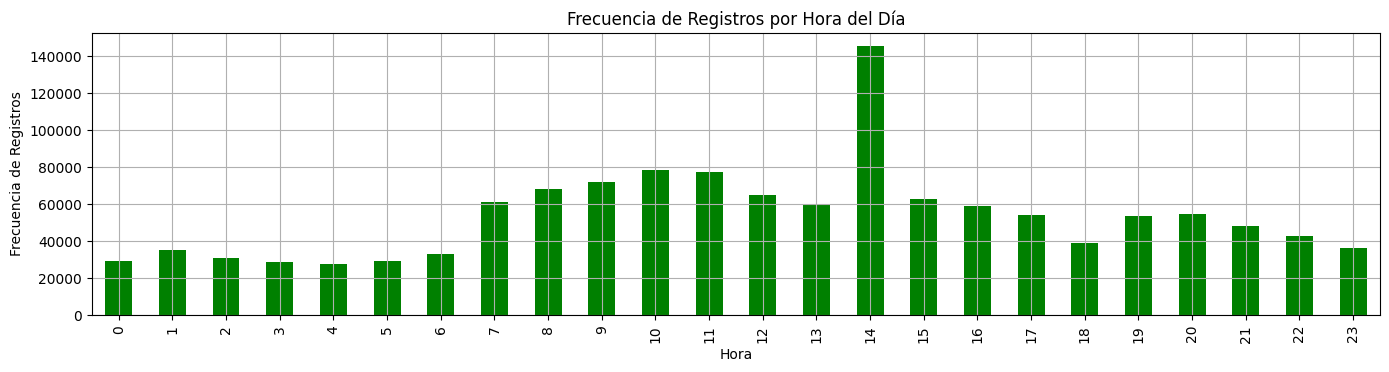

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear una copia del DataFrame original para trabajar sin afectar el original
df_copy = df.copy()

# Convertir 'FechaIngreso' a formato datetime en la copia
df_copy['FechaIngreso'] = pd.to_datetime(df_copy['FechaIngreso'], errors='coerce')

# Convertir 'HoraIngreso' a formato de hora en la copia (extraer solo la hora)
df_copy['HoraIngreso'] = pd.to_datetime(df_copy['HoraIngreso'], format='%H:%M', errors='coerce').dt.hour

# Extraer día de la semana, mes y hora para el análisis en la copia
df_copy['DiaSemana'] = df_copy['FechaIngreso'].dt.day_name()  # Días de la semana
df_copy['Mes'] = df_copy['FechaIngreso'].dt.month_name()  # Mes
df_copy['Hora'] = df_copy['HoraIngreso']  # Hora de ingreso

# Paso 1: Agrupar por día de la semana y calcular la frecuencia de registros
orden_dia_semana = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
frecuencia_por_dia = (
    df_copy.groupby('DiaSemana').size()
    .reindex(orden_dia_semana)  # Ordenar cronológicamente
)

# Paso 2: Agrupar por mes y calcular la frecuencia de registros
orden_mes = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
frecuencia_por_mes = (
    df_copy.groupby('Mes').size()
    .reindex(orden_mes)  # Ordenar cronológicamente
)

# Paso 3: Agrupar por hora y calcular la frecuencia de registros
frecuencia_por_hora = df_copy.groupby('Hora').size().sort_index()  # Ordenar por hora ascendente

# Visualización de los resultados

# Gráfico de frecuencia de registros por día de la semana
plt.figure(figsize=(14, 10))


# Gráfico de frecuencia de registros por hora
plt.subplot(3, 1, 3)
frecuencia_por_hora.plot(kind='bar', color='green')
plt.title('Frecuencia de Registros por Hora del Día')
plt.ylabel('Frecuencia de Registros')
plt.xlabel('Hora')
plt.grid(True)

plt.tight_layout()
plt.show()



In [17]:
import pandas as pd

# Asegurarse de que 'FechaHoraIngreso' esté en formato datetime
df['FechaHoraIngreso'] = pd.to_datetime(df['FechaHoraIngreso'])

# Diccionario para almacenar los resultados de cada hora
resultados_por_hora = {}

# Iterar desde las 0 horas hasta las 23 horas
for hora in range(24):
    # Filtrar los registros exactamente a la hora actual y minuto 0
    registros_exactos = df[(df['FechaHoraIngreso'].dt.hour == hora) & (df['FechaHoraIngreso'].dt.minute == 0)]
    
    # Calcular el porcentaje
    porcentaje = (registros_exactos.shape[0] / df.shape[0]) * 100
    
    # Guardar el resultado en el diccionario
    resultados_por_hora[f"{hora:02d}:00"] = porcentaje

# Imprimir los resultados
for hora, porcentaje in resultados_por_hora.items():
    print(f"El porcentaje de registros exactamente a las {hora} es: {porcentaje:.2f}%")



El porcentaje de registros exactamente a las 00:00 es: 0.03%
El porcentaje de registros exactamente a las 01:00 es: 0.05%
El porcentaje de registros exactamente a las 02:00 es: 0.04%
El porcentaje de registros exactamente a las 03:00 es: 0.04%
El porcentaje de registros exactamente a las 04:00 es: 0.04%
El porcentaje de registros exactamente a las 05:00 es: 0.03%
El porcentaje de registros exactamente a las 06:00 es: 0.04%
El porcentaje de registros exactamente a las 07:00 es: 0.05%
El porcentaje de registros exactamente a las 08:00 es: 0.09%
El porcentaje de registros exactamente a las 09:00 es: 0.09%
El porcentaje de registros exactamente a las 10:00 es: 0.10%
El porcentaje de registros exactamente a las 11:00 es: 0.10%
El porcentaje de registros exactamente a las 12:00 es: 0.09%
El porcentaje de registros exactamente a las 13:00 es: 0.07%
El porcentaje de registros exactamente a las 14:00 es: 6.56%
El porcentaje de registros exactamente a las 15:00 es: 0.08%
El porcentaje de registr

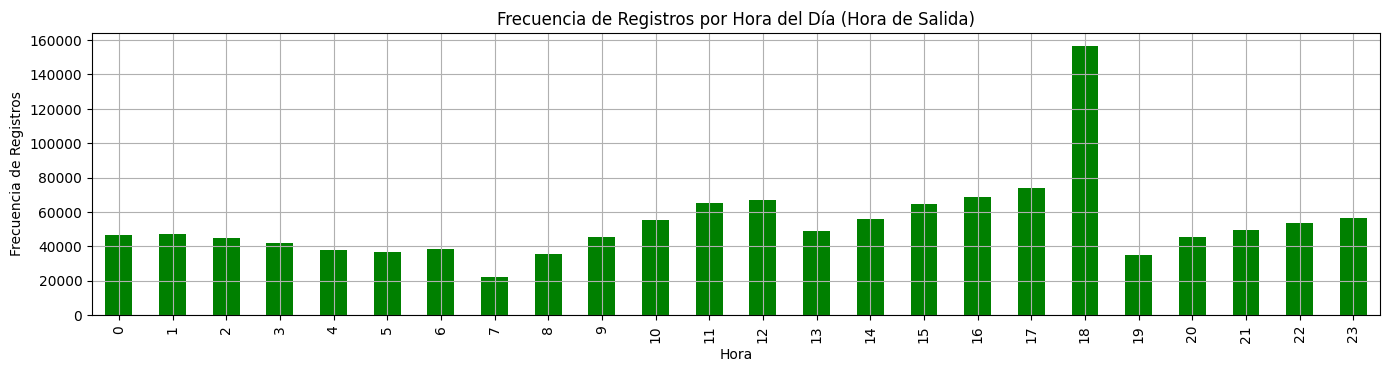

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear una copia del DataFrame original para trabajar sin afectar el original
df_copy = df.copy()

# Convertir 'FechaSalida' y 'HoraSalida' a formato datetime en la copia
df_copy['FechaSalida'] = pd.to_datetime(df_copy['FechaSalida'], errors='coerce')
df_copy['HoraSalida'] = pd.to_datetime(df_copy['HoraSalida'], format='%H:%M', errors='coerce').dt.hour

# Extraer día de la semana, mes y hora para el análisis en la copia (usando la fecha y hora de salida)
df_copy['DiaSemana'] = df_copy['FechaSalida'].dt.day_name()  # Días de la semana
df_copy['Mes'] = df_copy['FechaSalida'].dt.month_name()  # Mes
df_copy['Hora'] = df_copy['HoraSalida']  # Hora de salida

# Paso 1: Agrupar por día de la semana y calcular la frecuencia de registros
orden_dia_semana = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
frecuencia_por_dia = (
    df_copy.groupby('DiaSemana').size()
    .reindex(orden_dia_semana)  # Ordenar cronológicamente
)

# Paso 2: Agrupar por mes y calcular la frecuencia de registros
orden_mes = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
frecuencia_por_mes = (
    df_copy.groupby('Mes').size()
    .reindex(orden_mes)  # Ordenar cronológicamente
)

# Paso 3: Agrupar por hora de salida y calcular la frecuencia de registros
frecuencia_por_hora = df_copy.groupby('Hora').size().sort_index()  # Ordenar por hora ascendente

# Visualización de los resultados

# Gráfico de frecuencia de registros por día de la semana
plt.figure(figsize=(14, 10))



# Gráfico de frecuencia de registros por hora de salida
plt.subplot(3, 1, 3)
frecuencia_por_hora.plot(kind='bar', color='green')
plt.title('Frecuencia de Registros por Hora del Día (Hora de Salida)')
plt.ylabel('Frecuencia de Registros')
plt.xlabel('Hora')
plt.grid(True)

plt.tight_layout()
plt.show()


In [19]:
import pandas as pd

# Asegurarse de que 'FechaHoraSalida' esté en formato datetime
df['FechaHoraSalida'] = pd.to_datetime(df['FechaHoraSalida'])

# Diccionario para almacenar los resultados de cada hora
resultados_por_hora_salida = {}

# Iterar desde las 0 horas hasta las 23 horas
for hora in range(24):
    # Filtrar los registros exactamente a la hora actual y minuto 0
    registros_exactos_salida = df[(df['FechaHoraSalida'].dt.hour == hora) & (df['FechaHoraSalida'].dt.minute == 0)]
    
    # Calcular el porcentaje
    porcentaje_salida = (registros_exactos_salida.shape[0] / df.shape[0]) * 100
    
    # Guardar el resultado en el diccionario
    resultados_por_hora_salida[f"{hora:02d}:00"] = porcentaje_salida

# Imprimir los resultados
for hora, porcentaje in resultados_por_hora_salida.items():
    print(f"El porcentaje de registros exactamente a las {hora} (Fecha de Salida) es: {porcentaje:.2f}%")


El porcentaje de registros exactamente a las 00:00 (Fecha de Salida) es: 0.02%
El porcentaje de registros exactamente a las 01:00 (Fecha de Salida) es: 0.19%
El porcentaje de registros exactamente a las 02:00 (Fecha de Salida) es: 0.18%
El porcentaje de registros exactamente a las 03:00 (Fecha de Salida) es: 0.15%
El porcentaje de registros exactamente a las 04:00 (Fecha de Salida) es: 0.13%
El porcentaje de registros exactamente a las 05:00 (Fecha de Salida) es: 0.12%
El porcentaje de registros exactamente a las 06:00 (Fecha de Salida) es: 0.11%
El porcentaje de registros exactamente a las 07:00 (Fecha de Salida) es: 0.08%
El porcentaje de registros exactamente a las 08:00 (Fecha de Salida) es: 0.10%
El porcentaje de registros exactamente a las 09:00 (Fecha de Salida) es: 0.15%
El porcentaje de registros exactamente a las 10:00 (Fecha de Salida) es: 0.23%
El porcentaje de registros exactamente a las 11:00 (Fecha de Salida) es: 0.27%
El porcentaje de registros exactamente a las 12:00 (

In [20]:
import pandas as pd

# Asegurarse de que 'FechaHoraIngreso' esté en formato datetime
df['FechaHoraIngreso'] = pd.to_datetime(df['FechaHoraIngreso'])

# Filtrar solo las filas donde la hora de ingreso está entre 2:00 p.m. y 2:59 p.m.
df_2pm = df[(df['FechaHoraIngreso'].dt.hour == 14)]

# Agrupar por IPS y verificar si todas las filas de cada IPS cumplen la condición
ips_todas_2pm = df_2pm.groupby('NombrePrestadorSede').filter(lambda x: len(x) == len(df[df['NombrePrestadorSede'] == x.name]))

# Obtener el listado de las IPS que cumplen la condición
ips_todas_2pm_listado = ips_todas_2pm['NombrePrestadorSede'].unique()

# Imprimir el resultado
print("Las IPS donde todas las horas de ingreso están entre 2:00 p.m. y 2:59 p.m. son:")
print(ips_todas_2pm_listado)


Las IPS donde todas las horas de ingreso están entre 2:00 p.m. y 2:59 p.m. son:
['VIRREY SOLIS I.P.S S.A - sede Virrey Solís IPS. S.A Tranvía Plaza'
 'VIRREY SOLIS I.P.S S.A - sede VIRREY SOLIS I.P.S S.A SAN DIEGO'
 'VIRREY SOLIS I.P.S S.A - sede VIRREY SOLIS IPS FLORIDA']


In [21]:
import pandas as pd

# Asegurarse de que 'FechaHoraIngreso' esté en formato datetime
df['FechaHoraIngreso'] = pd.to_datetime(df['FechaHoraIngreso'])

# Filtrar solo las filas donde la hora de ingreso es exactamente a las 2:00 p.m.
df_exactamente_2pm = df[(df['FechaHoraIngreso'].dt.hour == 14) & (df['FechaHoraIngreso'].dt.minute == 0)]

# Agrupar por IPS y verificar si todas las filas de cada IPS cumplen la condición
ips_todas_exactamente_2pm = df_exactamente_2pm.groupby('NombrePrestadorSede').filter(lambda x: len(x) == len(df[df['NombrePrestadorSede'] == x.name]))

# Obtener el listado de las IPS que cumplen la condición
ips_todas_exactamente_2pm_listado = ips_todas_exactamente_2pm['NombrePrestadorSede'].unique()

# Imprimir el resultado
print("Las IPS donde todas las horas de ingreso son exactamente a las 2:00 p.m. son:")
print(ips_todas_exactamente_2pm_listado)


Las IPS donde todas las horas de ingreso son exactamente a las 2:00 p.m. son:
['VIRREY SOLIS I.P.S S.A - sede Virrey Solís IPS. S.A Tranvía Plaza'
 'VIRREY SOLIS I.P.S S.A - sede VIRREY SOLIS I.P.S S.A SAN DIEGO'
 'VIRREY SOLIS I.P.S S.A - sede VIRREY SOLIS IPS FLORIDA']


In [22]:
import pandas as pd

# Filtrar solo las filas donde la IPS está en la lista obtenida y la hora de ingreso es exactamente a las 2:00 p.m.
ips_seleccionadas = [
    'VIRREY SOLIS I.P.S S.A - sede Virrey Solís IPS. S.A Tranvía Plaza',
    'VIRREY SOLIS I.P.S S.A - sede VIRREY SOLIS I.P.S S.A SAN DIEGO',
    'VIRREY SOLIS I.P.S S.A - sede VIRREY SOLIS IPS FLORIDA'
]
df_3_ips = df[df['NombrePrestadorSede'].isin(ips_seleccionadas)]

# Asegurarse de que 'FechaHoraSalida' esté en formato datetime
df_3_ips['FechaHoraSalida'] = pd.to_datetime(df_3_ips['FechaHoraSalida'])

# Extraer la hora y minuto de salida
df_3_ips['HoraSalida'] = df_3_ips['FechaHoraSalida'].dt.time  # Extrae solo la hora y minuto

# Verificar si todos los registros de cada IPS tienen la misma hora de salida
resultados_hora_salida = df_3_ips.groupby('NombrePrestadorSede')['HoraSalida'].nunique()

# Imprimir el resultado
for ips, count in resultados_hora_salida.items():
    if count == 1:
        hora_salida_unica = df_3_ips[df_3_ips['NombrePrestadorSede'] == ips]['HoraSalida'].iloc[0]
        print(f"En '{ips}', todos los pacientes siempre salen a las {hora_salida_unica}")
    else:
        print(f"En '{ips}', hay diferentes horas de salida registradas para los pacientes.")


En 'VIRREY SOLIS I.P.S S.A - sede VIRREY SOLIS I.P.S S.A SAN DIEGO', todos los pacientes siempre salen a las 18:00:00
En 'VIRREY SOLIS I.P.S S.A - sede VIRREY SOLIS IPS FLORIDA', todos los pacientes siempre salen a las 18:00:00
En 'VIRREY SOLIS I.P.S S.A - sede Virrey Solís IPS. S.A Tranvía Plaza', todos los pacientes siempre salen a las 18:00:00


C:\Users\jpcan\AppData\Local\Temp\ipykernel_18884\2598791553.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3_ips['FechaHoraSalida'] = pd.to_datetime(df_3_ips['FechaHoraSalida'])
C:\Users\jpcan\AppData\Local\Temp\ipykernel_18884\2598791553.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3_ips['HoraSalida'] = df_3_ips['FechaHoraSalida'].dt.time  # Extrae solo la hora y minuto


# Analisis por mes

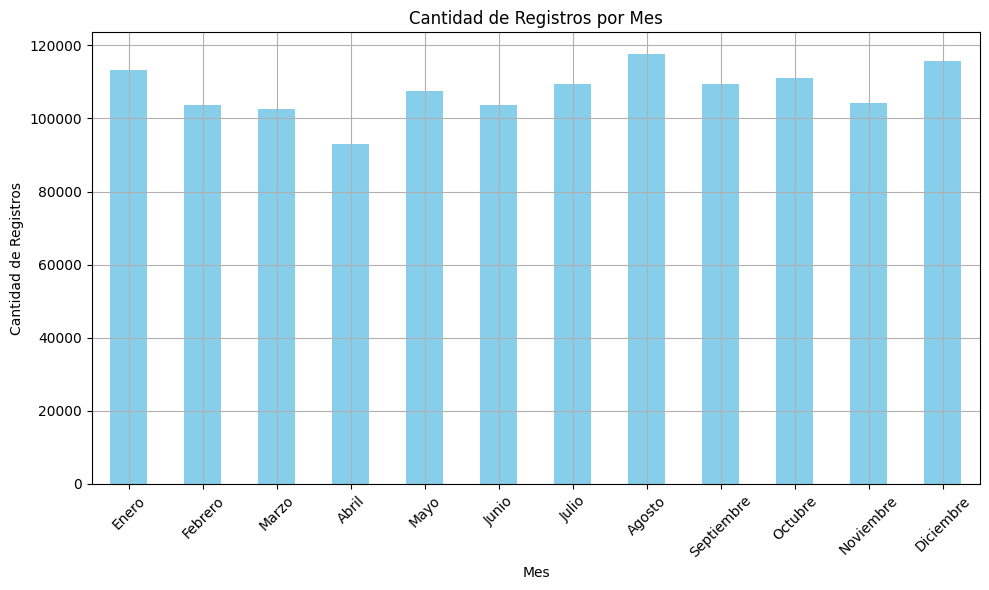

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse de que 'FechaIngreso' esté en formato datetime
df['FechaIngreso'] = pd.to_datetime(df['FechaIngreso'], errors='coerce')

# Crear una columna 'Mes' que extrae el mes de la fecha de ingreso
df['Mes'] = df['FechaIngreso'].dt.month

# Definir los nombres de los meses en orden cronológico
meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Contar la cantidad de registros por mes
cantidad_por_mes = df.groupby('Mes').size()

# Crear el gráfico de barras para mostrar la cantidad de registros por mes
plt.figure(figsize=(10, 6))
cantidad_por_mes.reindex(range(1, 13)).plot(kind='bar', color='skyblue')
plt.title('Cantidad de Registros por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Registros')
plt.xticks(ticks=range(12), labels=meses_ordenados, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\jpcan\AppData\Local\Temp\ipykernel_22892\3925309221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FechaIngreso'] = pd.to_datetime(df['FechaIngreso'], errors='coerce')
C:\Users\jpcan\AppData\Local\Temp\ipykernel_22892\3925309221.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mes'] = df['FechaIngreso'].dt.month


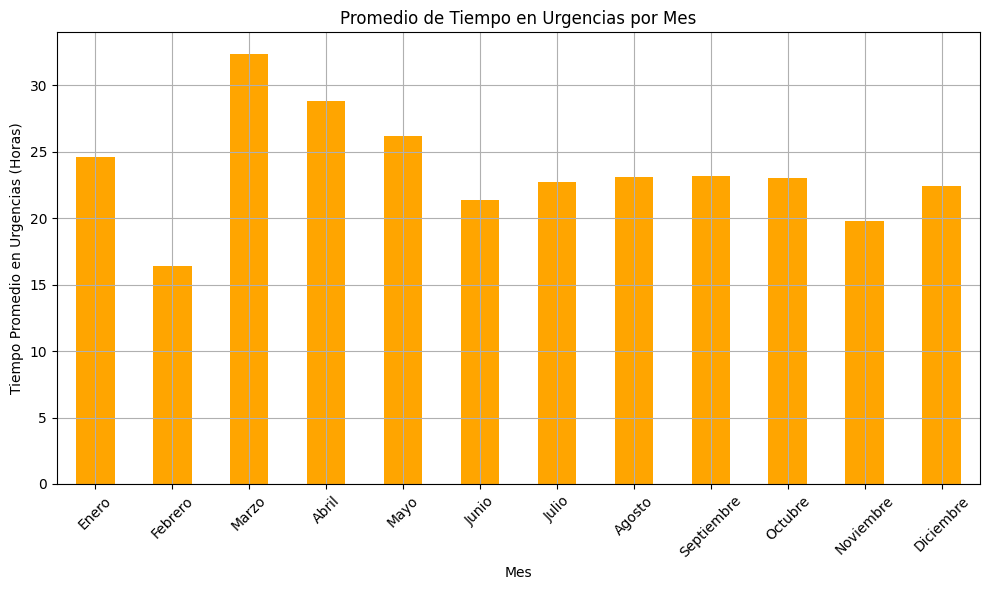

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse de que 'FechaIngreso' esté en formato datetime
df['FechaIngreso'] = pd.to_datetime(df['FechaIngreso'], errors='coerce')

# Crear una columna 'Mes' que extrae el mes de la fecha de ingreso
df['Mes'] = df['FechaIngreso'].dt.month

# Definir los nombres de los meses en orden cronológico
meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Calcular el tiempo promedio de estancia en urgencias por mes
promedio_estancia_por_mes = df.groupby('Mes')['TiempoenUrgencias'].mean()

# Crear el gráfico de barras para mostrar el promedio de estancia por mes
plt.figure(figsize=(10, 6))
promedio_estancia_por_mes.reindex(range(1, 13)).plot(kind='bar', color='orange')
plt.title('Promedio de Tiempo en Urgencias por Mes')
plt.xlabel('Mes')
plt.ylabel('Tiempo Promedio en Urgencias (Horas)')
plt.xticks(ticks=range(12), labels=meses_ordenados, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [56]:
import pandas as pd

# Asegurarse de que 'FechaIngreso' esté en formato datetime
df['FechaIngreso'] = pd.to_datetime(df['FechaIngreso'])

# Filtrar los registros de marzo
df_marzo = df[df['FechaIngreso'].dt.month == 3]

# Contar los registros de los últimos 10 días de marzo (del 22 al 31)
registros_ultimos_10_dias = df_marzo[df_marzo['FechaIngreso'].dt.day >= 15].shape[0]

# Contar el total de registros en marzo
total_registros_marzo = df_marzo.shape[0]

# Calcular el porcentaje de registros en los últimos 10 días
porcentaje_ultimos_10_dias = (registros_ultimos_10_dias / total_registros_marzo) * 100



print(f"Porcentaje de registros en la segunda mitad del mes: {porcentaje_ultimos_10_dias:.2f}%")


Porcentaje de registros en la segunda mitad del mes: 49.32%


## Enfermedades , Ademas evaluar por que abril y marzo son los meses en donde en promedio hay mayor estancia

C:\Users\jpcan\AppData\Local\Temp\ipykernel_30940\3182807343.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10_enfermedades_estancia['Mes'] = df_top_10_enfermedades_estancia['FechaIngreso'].dt.month


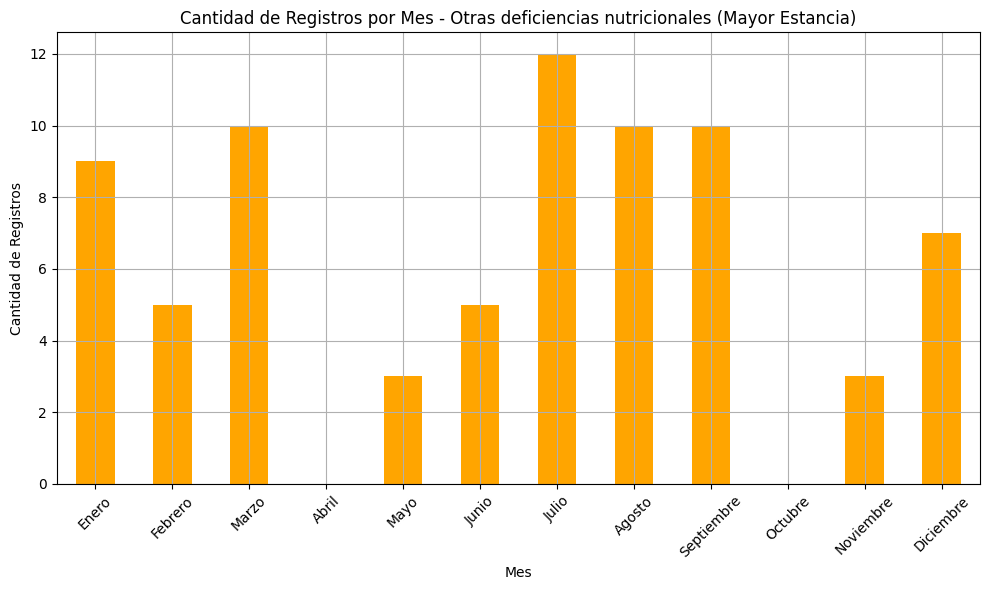

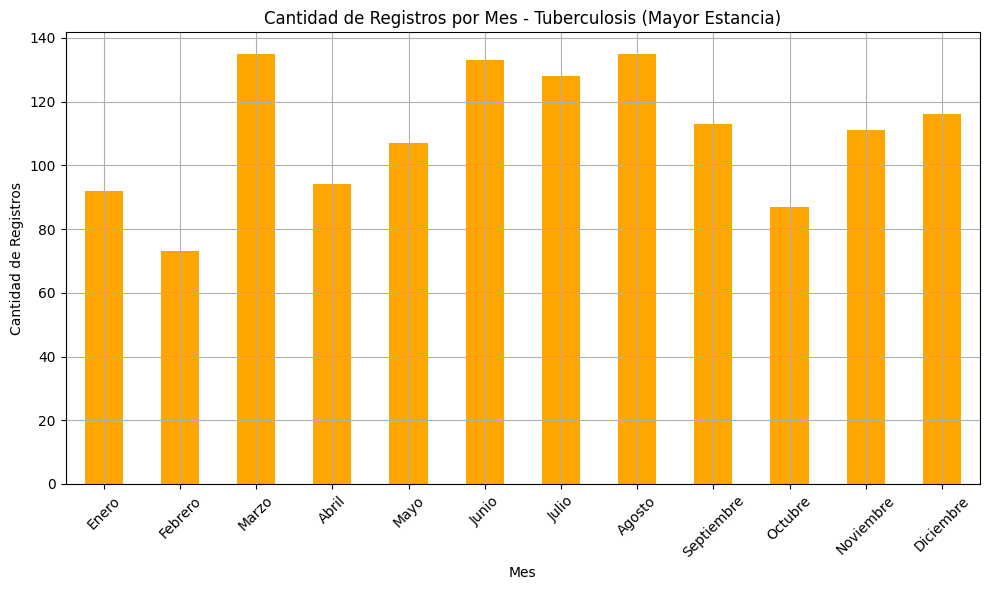

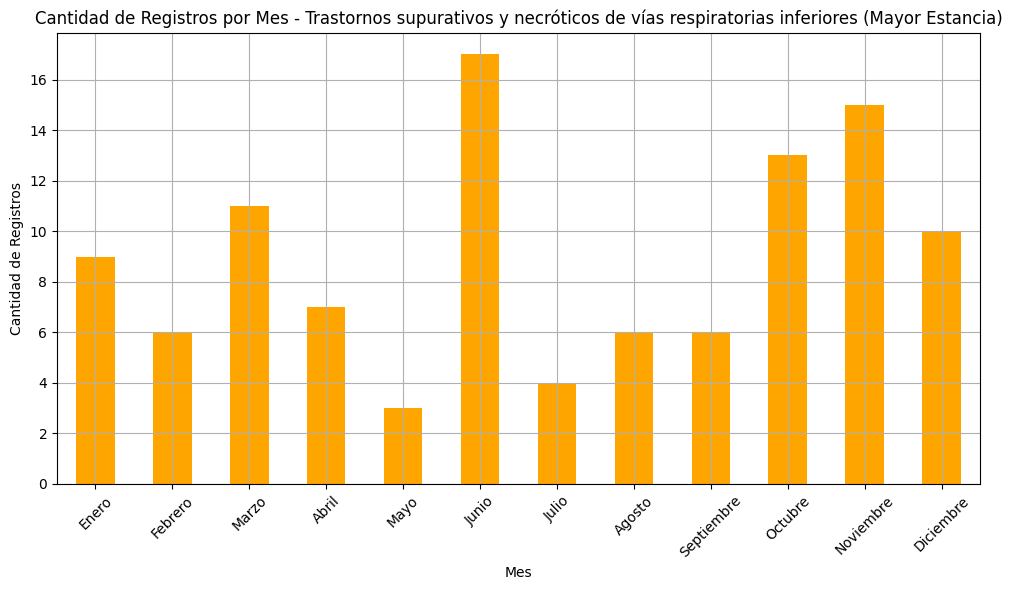

In [57]:
import pandas as pd 
import matplotlib.pyplot as plt

# Columna que contiene los diagnósticos principales
diagnostico_columna = 'DescripcionDiagnosticoPrincipal'
estancia_columna = 'TiempoenUrgencias'

# Asegurarse de que 'FechaIngreso' esté en formato datetime
df['FechaIngreso'] = pd.to_datetime(df['FechaIngreso'], errors='coerce')

# Calcular el promedio de tiempo en urgencias por enfermedad
promedio_estancia_por_enfermedad = df.groupby(diagnostico_columna)[estancia_columna].mean()

# Obtener las 10 enfermedades que generan mayor estancia en urgencias
top_10_enfermedades_mayor_estancia = promedio_estancia_por_enfermedad.nlargest(10)

# Filtrar el DataFrame por las 10 enfermedades que generan mayor estancia
df_top_10_enfermedades_estancia = df[df[diagnostico_columna].isin(top_10_enfermedades_mayor_estancia.index)]

# Crear una columna 'Mes' que extrae el mes de la fecha de ingreso
df_top_10_enfermedades_estancia['Mes'] = df_top_10_enfermedades_estancia['FechaIngreso'].dt.month

# Definir los nombres de los meses en orden cronológico
meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Contar la cantidad de registros por enfermedad y mes
cantidad_por_enfermedad_mes_estancia = df_top_10_enfermedades_estancia.groupby([diagnostico_columna, 'Mes']).size().unstack(fill_value=0)

# Crear un gráfico de barras para cada una de las 10 enfermedades con mayor estancia
for enfermedad in top_10_enfermedades_mayor_estancia.index:
    if enfermedad in cantidad_por_enfermedad_mes_estancia.index:
        # Obtener el conteo de registros de cada mes para la enfermedad
        registros_mes = cantidad_por_enfermedad_mes_estancia.loc[enfermedad]
        
        # Ordenar los meses por cantidad de registros en orden descendente
        top_4_meses = registros_mes.nlargest(4)
        
        # Verificar si marzo o abril están en el top 4
        if 3 in top_4_meses.index or 4 in top_4_meses.index:
            # Graficar solo si marzo o abril están en el top 4
            plt.figure(figsize=(10, 6))
            registros_mes.reindex(range(1, 13)).plot(kind='bar', color='orange')
            plt.title(f'Cantidad de Registros por Mes - {enfermedad} (Mayor Estancia)')
            plt.xlabel('Mes')
            plt.ylabel('Cantidad de Registros')
            plt.xticks(ticks=range(12), labels=meses_ordenados, rotation=45)
            plt.grid(True)
            plt.tight_layout()
            plt.show()



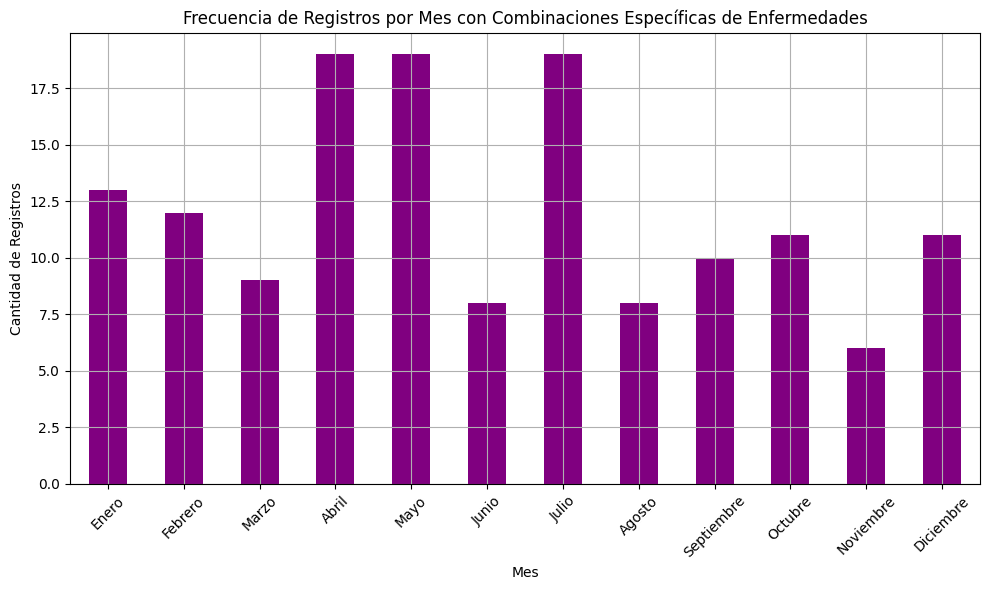

In [58]:
import pandas as pd

# Asegurarse de que 'FechaIngreso' esté en formato datetime
df['FechaIngreso'] = pd.to_datetime(df['FechaIngreso'], errors='coerce')

# Definir las combinaciones de enfermedades a buscar
combinaciones_enfermedades = [
    ('Tuberculosis', 'Enfermedad por virus de inmunodeficiencia humana [VIH]', 'Diabetes mellitus'),
    ('Anemias carenciales', 'Otras enfermedades del aparato digestivo', 'Artropatías'),
    ('Anemias carenciales', 'Neoplasias malignas de órganos digestivos', 'Desnutrición'),
    ('Otras enfermedades bacterianas', 'Enfermedades renales túbulo-intersticiales', 'Otras formas de enfermedad cardiaca'),
    ('Otras enfermedades bacterianas', 'Insuficiencia renal aguda y enfermedad renal crónica', 'Anemia aplásica y otras anemias y síndromes de insuficiencia medular'),
    ('Insuficiencia renal aguda y enfermedad renal crónica', 'Enfermedades crónicas del tracto respiratorio inferior', 'Neoplasias in situ'),
    ('Tuberculosis', 'Diabetes mellitus', 'Gripe y neumonía'),
    ('Gripe y neumonía', 'Enfermedades crónicas del tracto respiratorio inferior', 'Otras formas de enfermedad cardiaca'),
    ('Gripe y neumonía', 'Neoplasias malignas de órganos genitales masculinos', 'Enfermedades crónicas del tracto respiratorio inferior'),
    ('Trastornos mentales debidos a afecciones fisiológicas conocidas', 'Insuficiencia renal aguda y enfermedad renal crónica', 'Otras formas de enfermedad cardiaca')
]

# Crear una columna 'Mes' que extrae el mes de la fecha de ingreso
df['Mes'] = df['FechaIngreso'].dt.month

# Crear una columna para identificar si un registro contiene una de las combinaciones de enfermedades
df['TieneCombinacion'] = False

# Verificar si cada registro contiene alguna de las combinaciones de enfermedades
for combinacion in combinaciones_enfermedades:
    # Filtrar registros que contienen todos los elementos de la combinación en las columnas de diagnóstico
    mask = df.apply(lambda x: all(enfermedad in [x['DescripcionDiagnosticoPrincipal'], 
                                                  x['DescripcionDiagnosticoRelacionado_uno'], 
                                                  x['DescripcionDiagnosticoRelacionado_dos'], 
                                                  x['DescripcionDiagnosticoRelacionado_tres']] for enfermedad in combinacion), axis=1)
    df.loc[mask, 'TieneCombinacion'] = True

# Filtrar los registros que tienen alguna combinación de enfermedades
df_combinaciones = df[df['TieneCombinacion']]

# Contar los registros por mes para las combinaciones de enfermedades
registros_por_mes = df_combinaciones['Mes'].value_counts().sort_index()

# Definir los nombres de los meses en orden cronológico
meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Graficar los registros por mes
plt.figure(figsize=(10, 6))
registros_por_mes.index = [meses_ordenados[i - 1] for i in registros_por_mes.index]  # Cambiar los índices al nombre del mes
registros_por_mes.plot(kind='bar', color='purple')
plt.title('Frecuencia de Registros por Mes con Combinaciones Específicas de Enfermedades')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\jpcan\AppData\Local\Temp\ipykernel_30940\263024418.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10_combinaciones_estancia['Mes'] = df_top_10_combinaciones_estancia['FechaIngreso'].dt.month


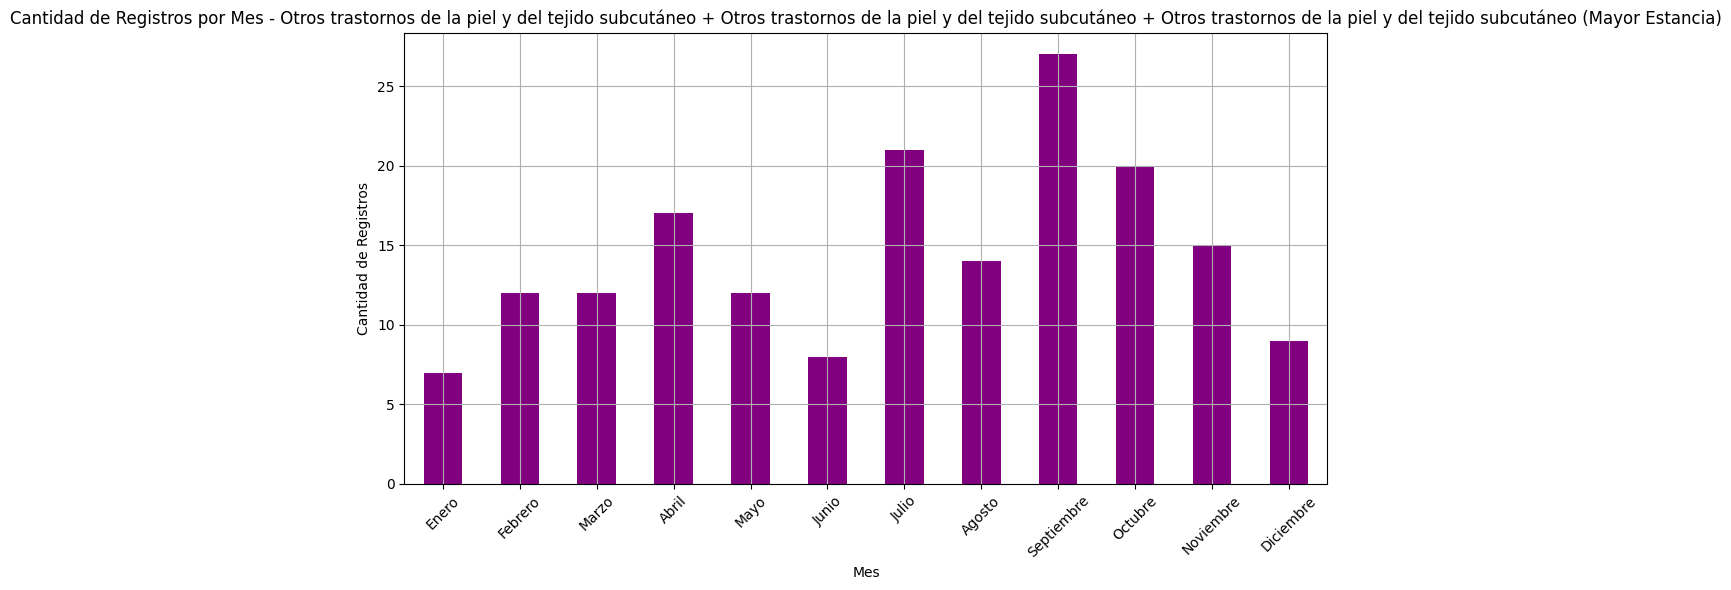

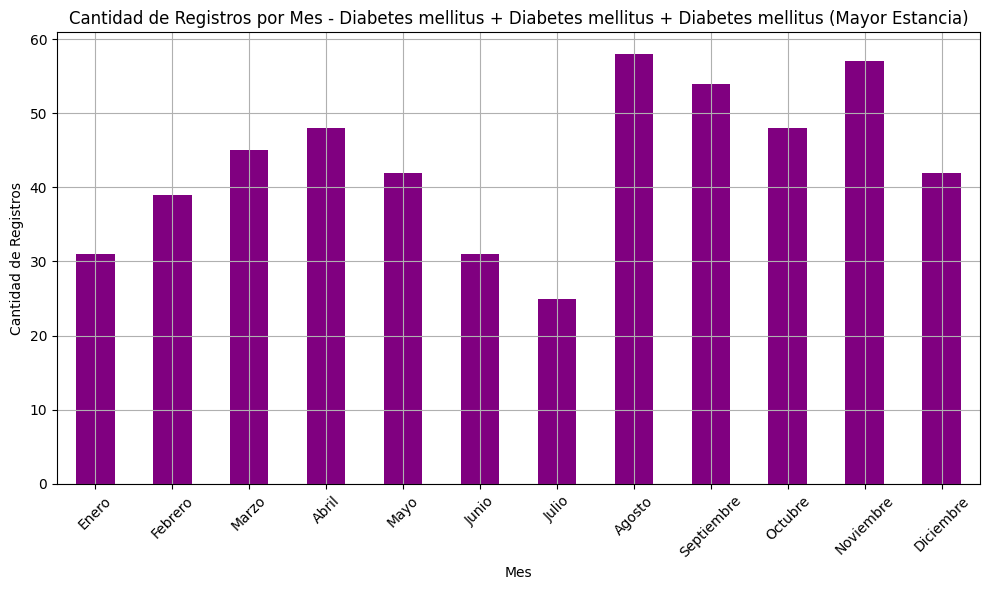

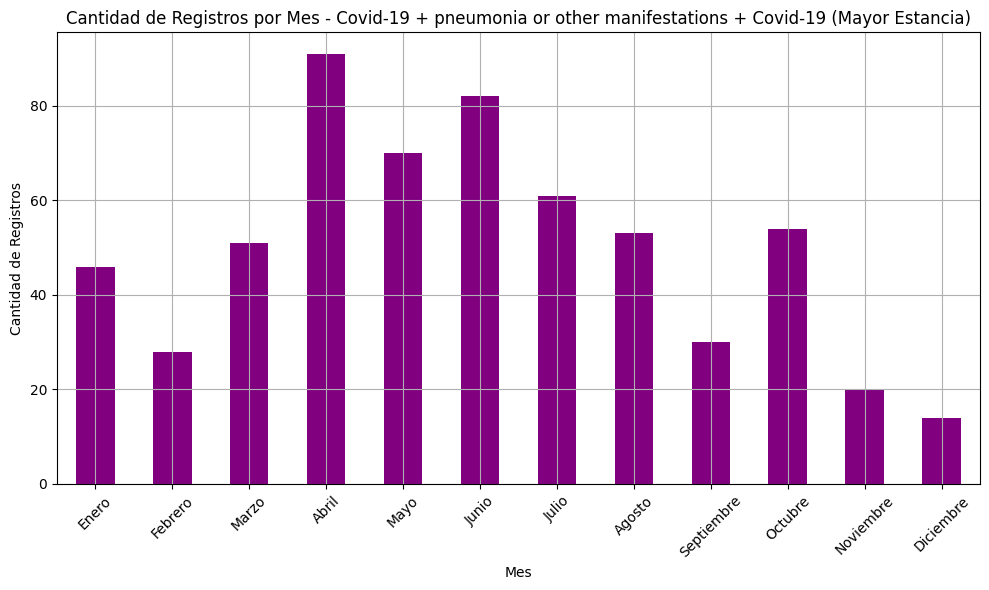

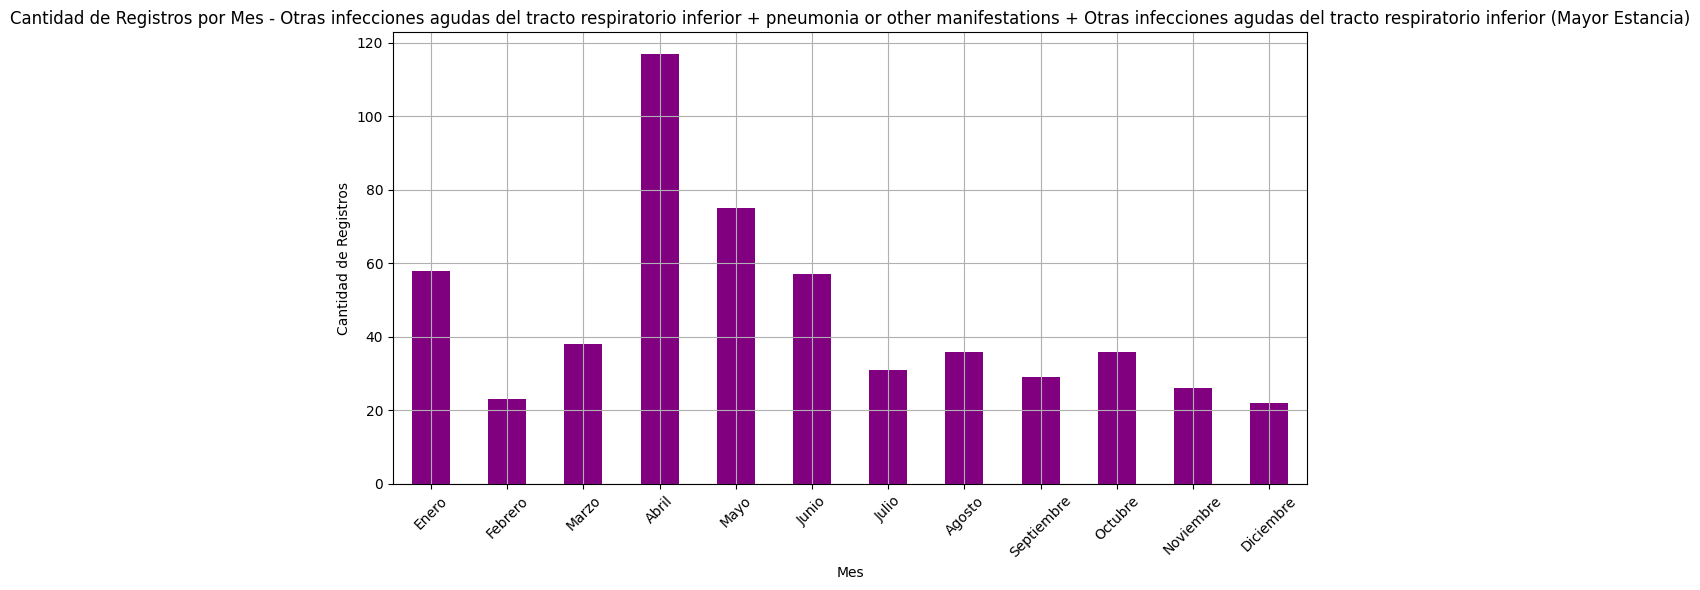

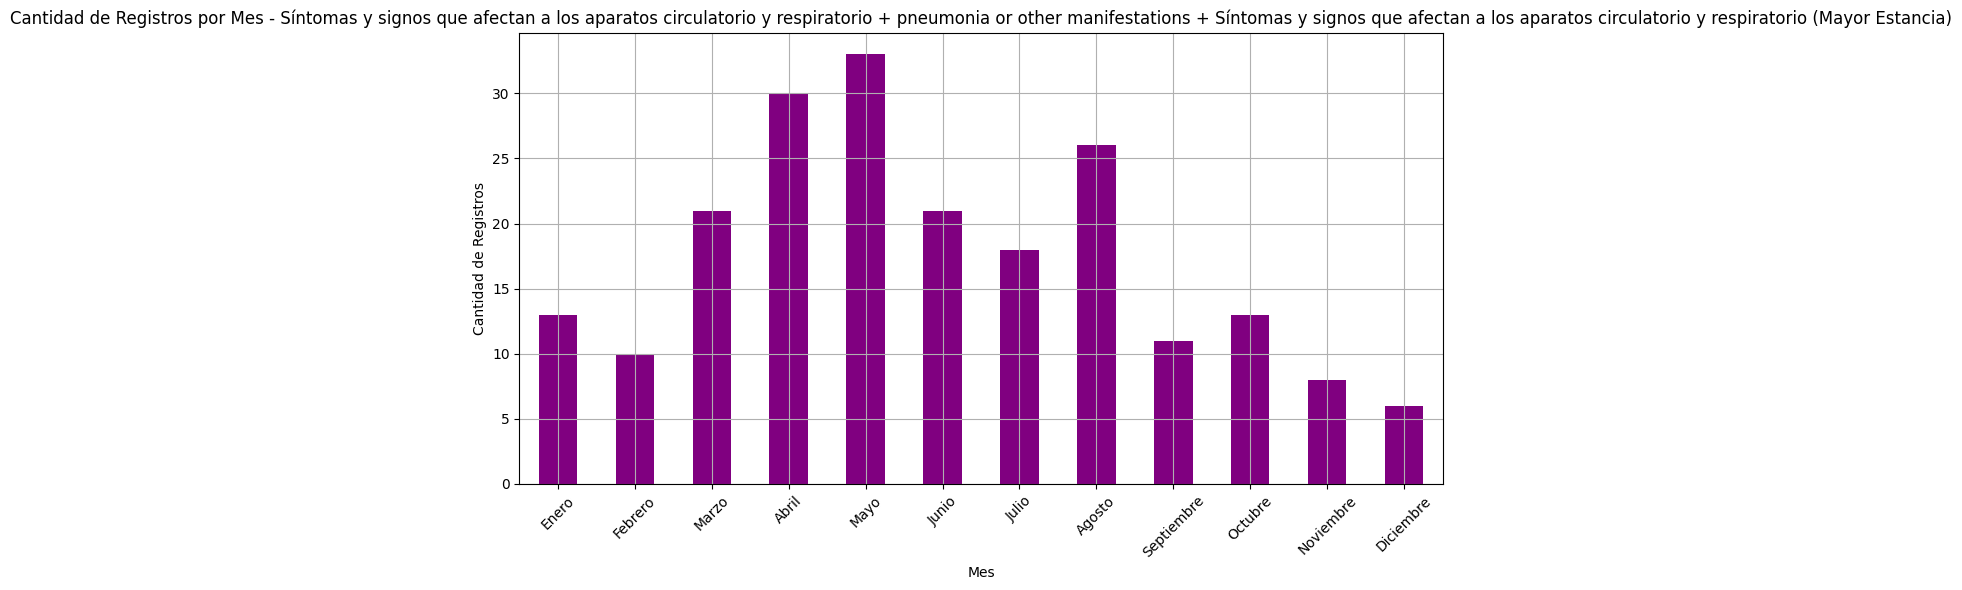

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Columnas que contienen los diagnósticos principales y relacionados
diagnostico_principal_col = 'DescripcionDiagnosticoPrincipal'
diagnostico_relacionado_1_col = 'DescripcionDiagnosticoRelacionado_uno'
diagnostico_relacionado_2_col = 'DescripcionDiagnosticoRelacionado_dos'
estancia_columna = 'TiempoenUrgencias'

# Asegurarse de que 'FechaIngreso' esté en formato datetime
df['FechaIngreso'] = pd.to_datetime(df['FechaIngreso'], errors='coerce')

# Crear una columna de combinación de los diagnósticos principal, relacionado 1 y relacionado 2
df['CombinacionDiagnosticos'] = df[diagnostico_principal_col] + " + " + df[diagnostico_relacionado_1_col] + " + " + df[diagnostico_relacionado_2_col]

# Filtrar combinaciones con al menos 100 registros
combinacion_conteo = df['CombinacionDiagnosticos'].value_counts()
combinaciones_validas = combinacion_conteo[combinacion_conteo >= 100].index

# Filtrar el DataFrame para solo las combinaciones con al menos 100 registros
df = df[df['CombinacionDiagnosticos'].isin(combinaciones_validas)]

# Calcular el promedio de tiempo en urgencias por combinación de diagnósticos
promedio_estancia_por_combinacion = df.groupby('CombinacionDiagnosticos')[estancia_columna].mean()

# Obtener las 10 combinaciones de diagnósticos que generan mayor estancia en urgencias
top_10_combinaciones_mayor_estancia = promedio_estancia_por_combinacion.nlargest(10)

# Filtrar el DataFrame por las 10 combinaciones de diagnósticos que generan mayor estancia
df_top_10_combinaciones_estancia = df[df['CombinacionDiagnosticos'].isin(top_10_combinaciones_mayor_estancia.index)]

# Crear una columna 'Mes' que extrae el mes de la fecha de ingreso
df_top_10_combinaciones_estancia['Mes'] = df_top_10_combinaciones_estancia['FechaIngreso'].dt.month

# Definir los nombres de los meses en orden cronológico
meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Contar la cantidad de registros por combinación de diagnósticos y mes
cantidad_por_combinacion_mes_estancia = df_top_10_combinaciones_estancia.groupby(['CombinacionDiagnosticos', 'Mes']).size().unstack(fill_value=0)

# Crear un gráfico de barras para cada una de las 10 combinaciones con mayor estancia donde marzo o abril están en el top 4
for combinacion in top_10_combinaciones_mayor_estancia.index:
    if combinacion in cantidad_por_combinacion_mes_estancia.index:
        # Obtener el conteo de registros de cada mes para la combinación
        registros_mes = cantidad_por_combinacion_mes_estancia.loc[combinacion]
        
        # Ordenar los meses por cantidad de registros en orden descendente
        top_4_meses = registros_mes.nlargest(4)
        
        # Verificar si marzo o abril están en el top 4
        if 3 in top_4_meses.index or 4 in top_4_meses.index:
            # Graficar solo si marzo o abril están en el top 4
            plt.figure(figsize=(10, 6))
            registros_mes.reindex(range(1, 13)).plot(kind='bar', color='purple')
            plt.title(f'Cantidad de Registros por Mes - {combinacion} (Mayor Estancia)')
            plt.xlabel('Mes')
            plt.ylabel('Cantidad de Registros')
            plt.xticks(ticks=range(12), labels=meses_ordenados, rotation=45)
            plt.grid(True)
            plt.tight_layout()
            plt.show()



<Figure size 1400x800 with 0 Axes>

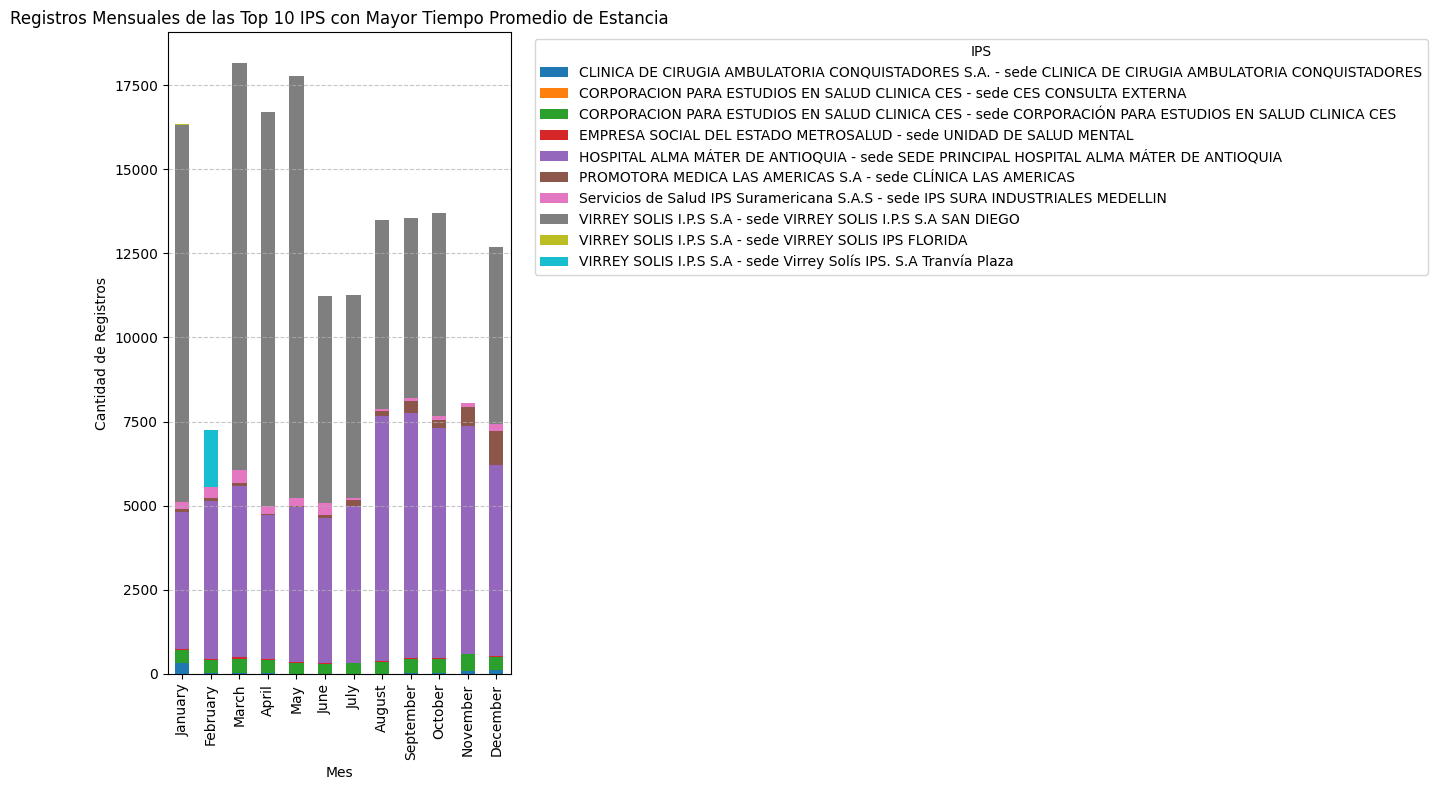

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir 'FechaIngreso' a formato datetime para extraer el mes
df['FechaIngreso'] = pd.to_datetime(df['FechaIngreso'], errors='coerce')
df['Mes'] = df['FechaIngreso'].dt.month_name()

# Calcular el tiempo promedio de estancia para cada IPS
ips_tiempo_promedio = (
    df.groupby('NombrePrestadorSede')['TiempoenUrgencias']
    .mean()
    .sort_values(ascending=False)
    .head(10)  # Obtener el Top 10 de IPS con mayor tiempo promedio
)

# Filtrar el dataset para incluir solo las IPS en el Top 10
df_top_ips = df[df['NombrePrestadorSede'].isin(ips_tiempo_promedio.index)]

# Agrupar por mes y por cada IPS para contar el número de registros
registros_por_mes_ips = (
    df_top_ips.groupby(['Mes', 'NombrePrestadorSede'])
    .size()
    .unstack(fill_value=0)  # Convertir el resultado en una tabla con IPS como columnas y llenar NaN con 0
)

# Ordenar los meses cronológicamente
orden_mes = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
registros_por_mes_ips = registros_por_mes_ips.reindex(orden_mes)

# Crear la gráfica
plt.figure(figsize=(14, 8))
registros_por_mes_ips.plot(kind='bar', stacked=True, figsize=(14, 8), colormap="tab10")
plt.title('Registros Mensuales de las Top 10 IPS con Mayor Tiempo Promedio de Estancia')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Registros')
plt.legend(title='IPS', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Caracteristicas Destino Usuario

In [24]:
import pandas as pd

# Agrupar por 'DestinoUsuario' y calcular el promedio de 'TiempoenUrgencias' para cada categoría
promedio_tiempo_por_destino = (
    df.groupby('DestinoUsuario')['TiempoenUrgencias']
    .mean()
    .reset_index()
)

# Renombrar las columnas para mayor claridad
promedio_tiempo_por_destino.columns = ['DestinoUsuario', 'TiempoPromedioEnUrgencias']

# Mostrar la tabla de resultados
print(promedio_tiempo_por_destino)

                         DestinoUsuario  TiempoPromedioEnUrgencias
0                     Alta de urgencias                  16.943842
1                       Hospitalización                  63.555818
2  Remisión a otro nivel de complejidad                  58.872365


In [25]:
import pandas as pd

# Filtrar el DataFrame para obtener solo los casos donde el paciente fue remitido a otro nivel de complejidad
df_remision = df[df['DestinoUsuario'] == 'Remisión a otro nivel de complejidad']

# Contar la cantidad de ocurrencias de cada enfermedad en los diagnósticos principales donde ocurre la remisión
top_enfermedades_remision = (
    df_remision['DescripcionDiagnosticoPrincipal']
    .value_counts()
    .head(10)  # Seleccionar las 10 enfermedades más frecuentes
    .reset_index()
)

# Renombrar las columnas para mayor claridad
top_enfermedades_remision.columns = ['Enfermedad', 'Cantidad de Remisiones']

# Mostrar la tabla resultante
print(top_enfermedades_remision)


                                          Enfermedad  Cantidad de Remisiones
0  Síntomas y signos que afectan al aparato diges...                     627
1         Trastornos del estado de ánimo [afectivos]                     351
2                        Síntomas y signos generales                     317
3  Enfermedades crónicas del tracto respiratorio ...                     275
4               Traumatismos en muñeca, mano y dedos                     271
5            Otras enfermedades del aparato urinario                     247
6                  pneumonia or other manifestations                     243
7  Síntomas y signos que afectan a los aparatos c...                     237
8                                  Litiasis urinaria                     237
9                  Enfermedades isquémicas cardiacas                     227


In [26]:
import pandas as pd

# Filtrar el DataFrame para obtener solo los casos donde el paciente fue remitido a otro nivel de complejidad
df_remision = df[df['DestinoUsuario'] == 'Remisión a otro nivel de complejidad']

# Agrupar por enfermedad (DescripcionDiagnosticoPrincipal) y calcular el tiempo promedio de estancia
top_enfermedades_remision = (
    df_remision.groupby('DescripcionDiagnosticoPrincipal')['TiempoenUrgencias']
    .mean()
    .sort_values(ascending=False)  # Ordenar de mayor a menor
    .head(10)  # Seleccionar las 10 enfermedades con mayor tiempo promedio de estancia
    .reset_index()
)

# Renombrar las columnas para mayor claridad
top_enfermedades_remision.columns = ['Enfermedad', 'TiempoPromedioEnUrgencias']

# Mostrar la tabla resultante
print(top_enfermedades_remision)


                                          Enfermedad  \
0  Neoplasias malignas de tejido linfoide, hemopo...   
1          Agentes infecciosos bacterianos y virales   
2                  pneumonia or other manifestations   
3  Enfermedades musculares y de la unión neuromus...   
4  Enfermedad por virus de inmunodeficiencia huma...   
5        Enfermedades del peritoneo y retroperitoneo   
6                                       Desnutrición   
7                         Otras enfermedades virales   
8  Enfermedad cardiaca pulmonar y enfermedades de...   
9        Otras enfermedades del aparato respiratorio   

   TiempoPromedioEnUrgencias  
0                 574.756410  
1                 436.233333  
2                 371.948765  
3                 359.488095  
4                 336.426190  
5                 310.355556  
6                 292.641667  
7                 275.724306  
8                 221.859649  
9                 209.931410  


In [27]:
import pandas as pd

# Filtrar el DataFrame para obtener solo los casos donde el paciente fue remitido a otro nivel de complejidad
df_remision = df[df['DestinoUsuario'] == 'Hospitalización']

# Contar la cantidad de ocurrencias de cada enfermedad en los diagnósticos principales donde ocurre la remisión
top_enfermedades_remision = (
    df_remision['DescripcionDiagnosticoPrincipal']
    .value_counts()
    .head(10)  # Seleccionar las 10 enfermedades más frecuentes
    .reset_index()
)

# Renombrar las columnas para mayor claridad
top_enfermedades_remision.columns = ['Enfermedad', 'Cantidad de Remisiones']

# Mostrar la tabla resultante
print(top_enfermedades_remision)

                                          Enfermedad  Cantidad de Remisiones
0                        Síntomas y signos generales                   20414
1  Factores que influyen en el estado de salud y ...                   14915
2  Síntomas y signos que afectan al aparato diges...                   11163
3            Otras enfermedades del aparato urinario                    9851
4                  pneumonia or other manifestations                    9750
5  Enfermedades crónicas del tracto respiratorio ...                    9741
6                             Contacto para el parto                    8707
7                Otras formas de enfermedad cardiaca                    8635
8  Atención materna relacionada con el feto y cav...                    8584
9  Síntomas y signos que afectan a los aparatos c...                    6874


In [28]:
import pandas as pd

# Filtrar el DataFrame para obtener solo los casos donde el paciente fue remitido a otro nivel de complejidad
df_remision = df[df['DestinoUsuario'] == 'Hospitalización']

# Agrupar por enfermedad (DescripcionDiagnosticoPrincipal) y calcular el tiempo promedio de estancia
top_enfermedades_remision = (
    df_remision.groupby('DescripcionDiagnosticoPrincipal')['TiempoenUrgencias']
    .mean()
    .sort_values(ascending=False)  # Ordenar de mayor a menor
    .head(10)  # Seleccionar las 10 enfermedades con mayor tiempo promedio de estancia
    .reset_index()
)

# Renombrar las columnas para mayor claridad
top_enfermedades_remision.columns = ['Enfermedad', 'TiempoPromedioEnUrgencias']

# Mostrar la tabla resultante
print(top_enfermedades_remision)

                                          Enfermedad  \
0                   Otras deficiencias nutricionales   
1  Esquizofrenia, trastorno esquizotípico ,delira...   
2                Códigos para situaciones especiales   
3                              Trastornos ampollosos   
4                             Fiebre reumática aguda   
5  Otros trastornos de la piel y del tejido subcu...   
6          Otras enfermedades causadas por clamidias   
7   Parálisis cerebral y otros síndromes paralíticos   
8              Enfermedades del aparato circulatorio   
9  Infecciones con modo de transmisión predominan...   

   TiempoPromedioEnUrgencias  
0                 302.400463  
1                 223.575319  
2                 222.166667  
3                 212.860494  
4                 194.361111  
5                 184.095595  
6                 168.966667  
7                 166.807746  
8                 166.618324  
9                 154.272222  


## mirar cuanto por el destino del usuario se demora en urgencias en promedio

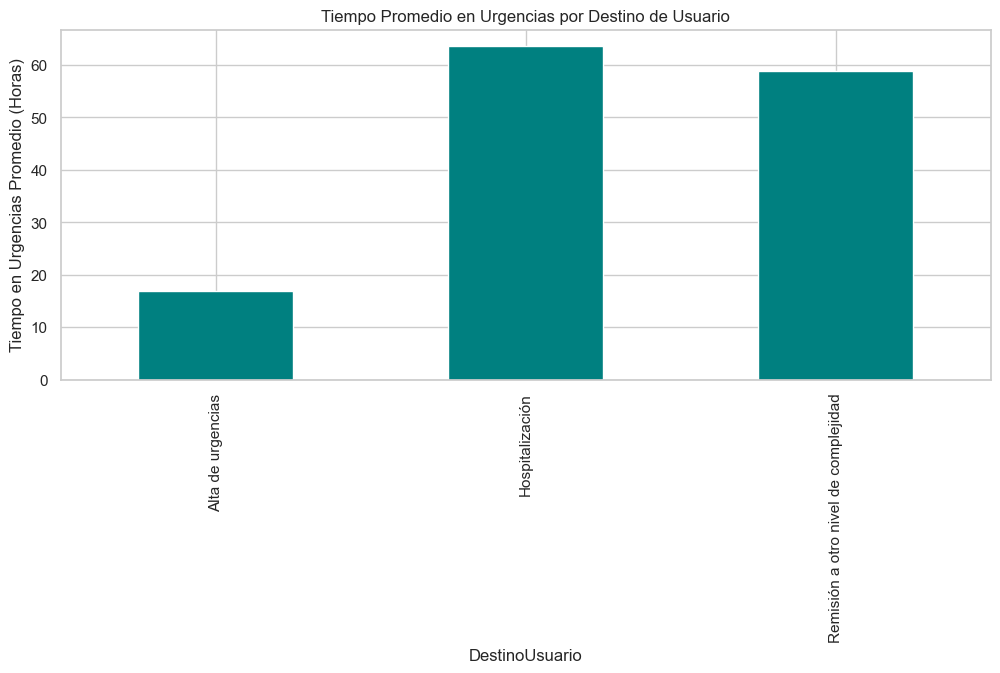

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarnos de que 'TiempoenUrgencias' y 'DestinoUsuario' existan en el DataFrame
if 'TiempoenUrgencias' in df.columns and 'DestinoUsuario' in df.columns:
    
    # Gráfico 1: Tiempo promedio en urgencias por destino de usuario
    tiempo_promedio_por_destino = df.groupby('DestinoUsuario')['TiempoenUrgencias'].mean()
    
    # Gráfico 2: Cantidad de registros por destino de usuario
    cantidad_por_destino = df['DestinoUsuario'].value_counts()

    # Crear los dos gráficos
    plt.figure(figsize=(12, 10))

    # Gráfico 1: Tiempo promedio en urgencias por destino de usuario
    plt.subplot(2, 1, 1)
    tiempo_promedio_por_destino.plot(kind='bar', color='teal')
    plt.title('Tiempo Promedio en Urgencias por Destino de Usuario')
    plt.ylabel('Tiempo en Urgencias Promedio (Horas)')
    plt.grid(True)


else:
    print("Las columnas 'TiempoenUrgencias' o 'DestinoUsuario' no están en el DataFrame.")

#Mirar cuales son las categorias que tiene las ips que mas afectan el tiempo en urgencias. 

In [37]:
import pandas as pd

# Asegurarnos de que las columnas necesarias existan en el DataFrame
if 'TiempoenUrgencias' in df.columns and 'DestinoUsuario' in df.columns:
    # Calcular la cantidad de registros por destino de usuario
    cantidad_por_destino = df['DestinoUsuario'].value_counts()

    # Calcular los porcentajes respecto al total
    total_registros = cantidad_por_destino.sum()
    porcentaje_por_destino = (cantidad_por_destino / total_registros) * 100

    # Mostrar los resultados
    print("Porcentaje de registros por destino de usuario:")
    print(porcentaje_por_destino)
else:
    print("Las columnas 'TiempoenUrgencias' o 'DestinoUsuario' no están en el DataFrame.")


Porcentaje de registros por destino de usuario:
DestinoUsuario
Alta de urgencias                       78.774823
Hospitalización                         20.573097
Remisión a otro nivel de complejidad     0.652080
Name: count, dtype: float64


In [29]:
import pandas as pd

# Filtrar el DataFrame para obtener solo los registros donde 'DestinoUsuario' es "Remisión a otro nivel de complejidad"
df_remision = df[df['DestinoUsuario'] == 'Hospitalización']

# Contar los registros por IPS y obtener las 10 IPS con más remisiones
top_10_ips_remision = df_remision['NombrePrestadorSede'].value_counts().nlargest(10)

# Imprimir el resultado
print("Las 10 IPS con mayor número de remisiones a otro nivel de complejidad son:")
print(top_10_ips_remision)


Las 10 IPS con mayor número de remisiones a otro nivel de complejidad son:
NombrePrestadorSede
HOSPITAL ALMA MÁTER DE ANTIOQUIA - sede SEDE PRINCIPAL HOSPITAL ALMA MÁTER DE ANTIOQUIA                                                           43178
HOSPITAL PABLO TOBON URIBE - sede HOSPITAL PABLO TOBON URIBE                                                                                      33027
UNIVERSIDAD PONTIFICIA BOLIVARIANA - sede CLINICA UNIVERSITARIA BOLIVARIANA                                                                       28522
PROMOTORA MEDICA Y ODONTOLOGICA DE ANTIOQUIA SA - sede CLINICA CENTRAL FUNDADORES                                                                 27121
CLINICA MEDELLIN S.A.S. - sede CLINICA MEDELLIN OCCIDENTE                                                                                         25744
COMUNIDAD DE HERMANAS DOMINICAS DE LA PRESENTACION DE LA SANTISIMA VIRGEN DE TOURS PROVINCIA DE MEDELLIN - sede CLINICA EL ROSARIO SEDE CENTRO   

Distribución por Destino del Usuario (en %):
DestinoUsuario
Alta de urgencias                       78.775630
Hospitalización                         20.572352
Remisión a otro nivel de complejidad     0.652019
Name: proportion, dtype: float64



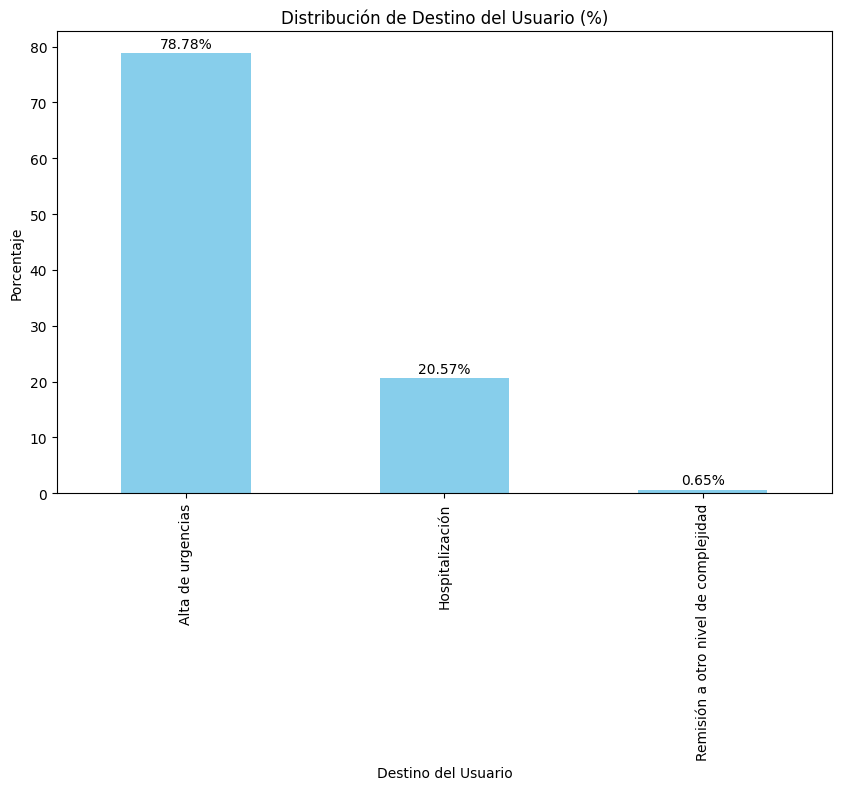

In [30]:
def graficar_distribucion_con_porcentaje(columna, nombre_columna):
    # Obtener la distribución
    distribucion = df[columna].value_counts(normalize=True) * 100
    distribucion_total = df[columna].value_counts()
    
    # Imprimir los resultados
    print(f"Distribución por {nombre_columna} (en %):\n{distribucion}\n")
    
    # Graficar la distribución en porcentajes
    plt.figure(figsize=(10, 6))
    distribucion.plot(kind='bar', color='skyblue')
    
    for i, val in enumerate(distribucion):
        plt.text(i, val + 0.5, f'{val:.2f}%', ha='center', va='bottom')
    
    plt.title(f'Distribución de {nombre_columna} (%)')
    plt.xlabel(nombre_columna)
    plt.ylabel('Porcentaje')
    plt.show()

# Distribución por 'DestinoUsuario'
graficar_distribucion_con_porcentaje('DestinoUsuario', 'Destino del Usuario')

## Ver la distribución por genero y causa externa

In [4]:
import pandas as pd

# Asegurarnos de que las columnas 'CausaExterna', 'Sexo', y 'Edad' existan en el DataFrame
if 'CausaExterna' in df.columns and 'Sexo' in df.columns and 'Edad' in df.columns:
    
    # Crear un cruce de datos para contar cuántos registros hay por 'CausaExterna', 'Sexo' y 'Edad'
    # Puedes modificar los rangos de edad según tu preferencia
    edad_bins = [0, 18, 35, 50, 65, 80, 100]  # Rango de edades
    edad_labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '81+']  # Etiquetas para los grupos de edad

    # Crear una nueva columna categorizada por rangos de edad
    df['RangoEdad'] = pd.cut(df['Edad'], bins=edad_bins, labels=edad_labels, right=False)

    # Crear una tabla de contingencia para contar los registros por Causa Externa, Sexo y Rango de Edad
    tabla_cruce = pd.crosstab(index=[df['CausaExterna'], df['Sexo']], columns=df['RangoEdad'])

    # Mostrar la tabla
    print("Tabla de registros por Causa Externa, Sexo y Rango de Edad:")
    print(tabla_cruce)

else:
    print("Las columnas 'CausaExterna', 'Sexo' o 'Edad' no están en el DataFrame.")


Tabla de registros por Causa Externa, Sexo y Rango de Edad:
RangoEdad                             0-18   19-35   36-50  51-65  66-80  \
CausaExterna                   Sexo                                        
Accidente de trabajo           F        24    1448    1031    544     51   
                               M        39    3037    1979   1090     84   
Accidente de tránsito          F       751    5779    2436   1280    516   
                               M      1047   11518    4320   2219    663   
Accidente ofídico              F       250     105      63     74     58   
                               M       359     159      57     44     28   
Accidente rábico               F       442     385     275    322    162   
                               M       615     490     206    216    130   
Enfermedad general             F     83377  241865  109129  98338  86292   
                               M     77288   81039   57140  76084  73812   
Enfermedad laboral          

Cantidad de registros por sexo:
Sexo
F    669412
M    401311
Name: count, dtype: int64


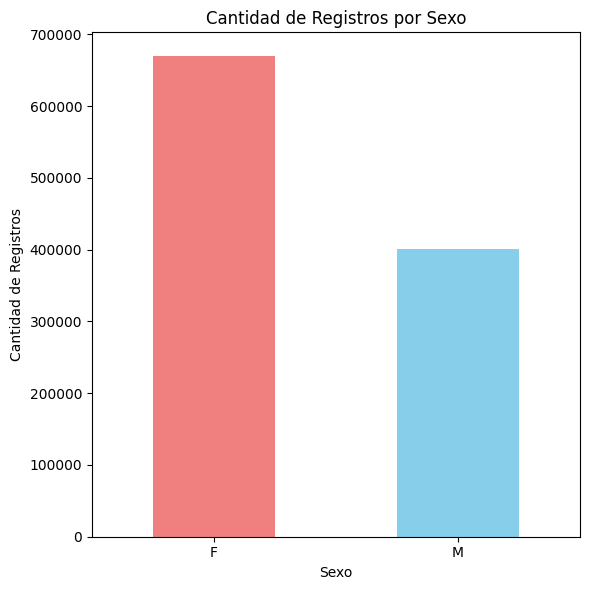

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarnos de que la columna 'Sexo' existe en el DataFrame
if 'Sexo' in df.columns:
    
    # Contar cuántos registros hay de hombres y mujeres
    conteo_sexo = df['Sexo'].value_counts()

    # Mostrar los resultados
    print("Cantidad de registros por sexo:")
    print(conteo_sexo)

    # Crear el gráfico de barras
    plt.figure(figsize=(6, 6))
    conteo_sexo.plot(kind='bar', color=['lightcoral','skyblue'])
    plt.title('Cantidad de Registros por Sexo')
    plt.ylabel('Cantidad de Registros')
    plt.xticks(rotation=0)  # Mantener las etiquetas horizontales
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

else:
    print("La columna 'Sexo' no está en el DataFrame.")


Tiempo promedio en urgencias por sexo:
Sexo
F    21.112124
M    27.968110
Name: TiempoenUrgencias, dtype: float64


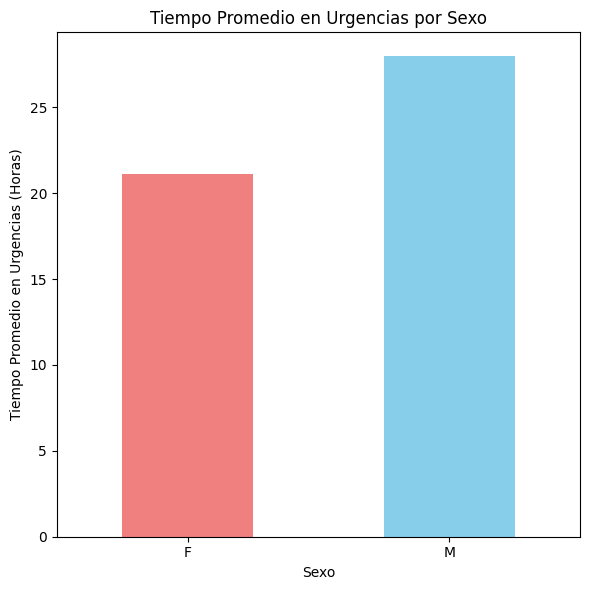

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarnos de que las columnas 'Sexo' y 'TiempoenUrgencias' existan en el DataFrame
if 'Sexo' in df.columns and 'TiempoenUrgencias' in df.columns:
    
    # Calcular el tiempo promedio en urgencias para hombres y mujeres
    promedio_tiempo_sexo = df.groupby('Sexo')['TiempoenUrgencias'].mean()

    # Mostrar los resultados
    print("Tiempo promedio en urgencias por sexo:")
    print(promedio_tiempo_sexo)

    # Crear el gráfico de barras
    plt.figure(figsize=(6, 6))
    promedio_tiempo_sexo.plot(kind='bar', color=[ 'lightcoral', 'skyblue'])
    plt.title('Tiempo Promedio en Urgencias por Sexo')
    plt.ylabel('Tiempo Promedio en Urgencias (Horas)')
    plt.xticks(rotation=0)  # Mantener las etiquetas horizontales
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

else:
    print("Las columnas 'Sexo' o 'TiempoenUrgencias' no están en el DataFrame.")


<Figure size 1800x600 with 0 Axes>

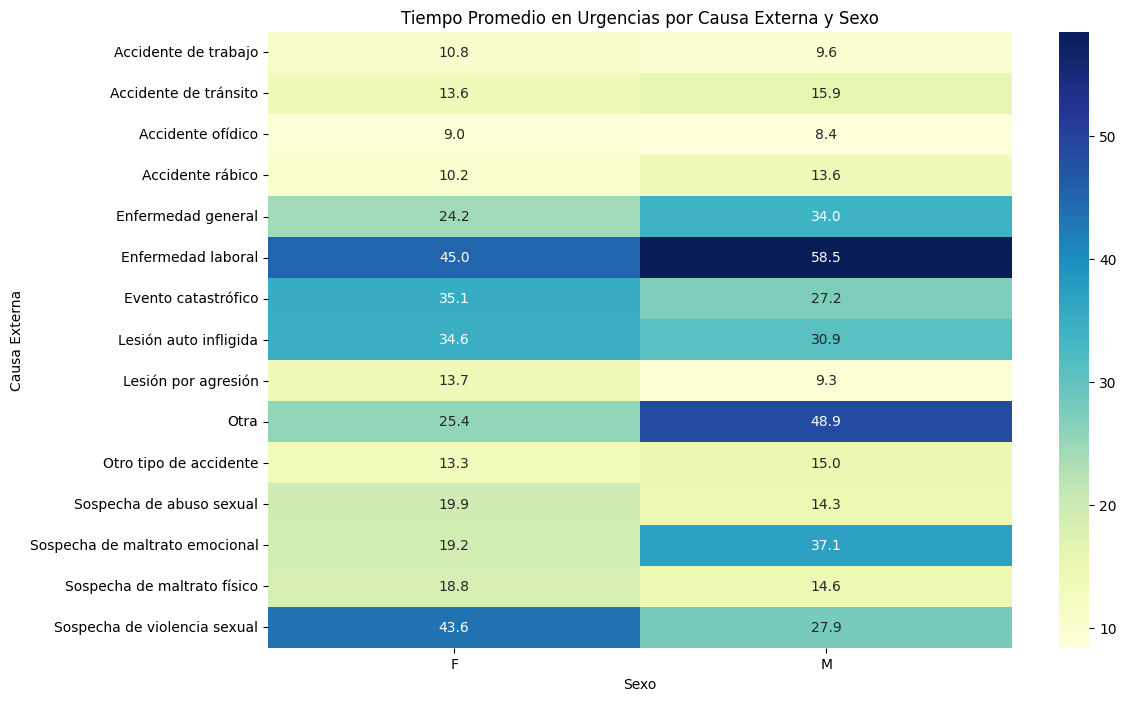

In [43]:
import seaborn as sns
# Configuración de gráficos
plt.figure(figsize=(18, 6))


# Calcular el tiempo promedio de urgencias para cada combinación
pivot_table = df_con_ocupacion.pivot_table(values='TiempoenUrgencias', index='CausaExterna', columns='Sexo', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Tiempo Promedio en Urgencias por Causa Externa y Sexo')
plt.xlabel('Sexo')
plt.ylabel('Causa Externa')
plt.show()

C:\Users\jpcan\AppData\Local\Temp\ipykernel_27392\458276461.py:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


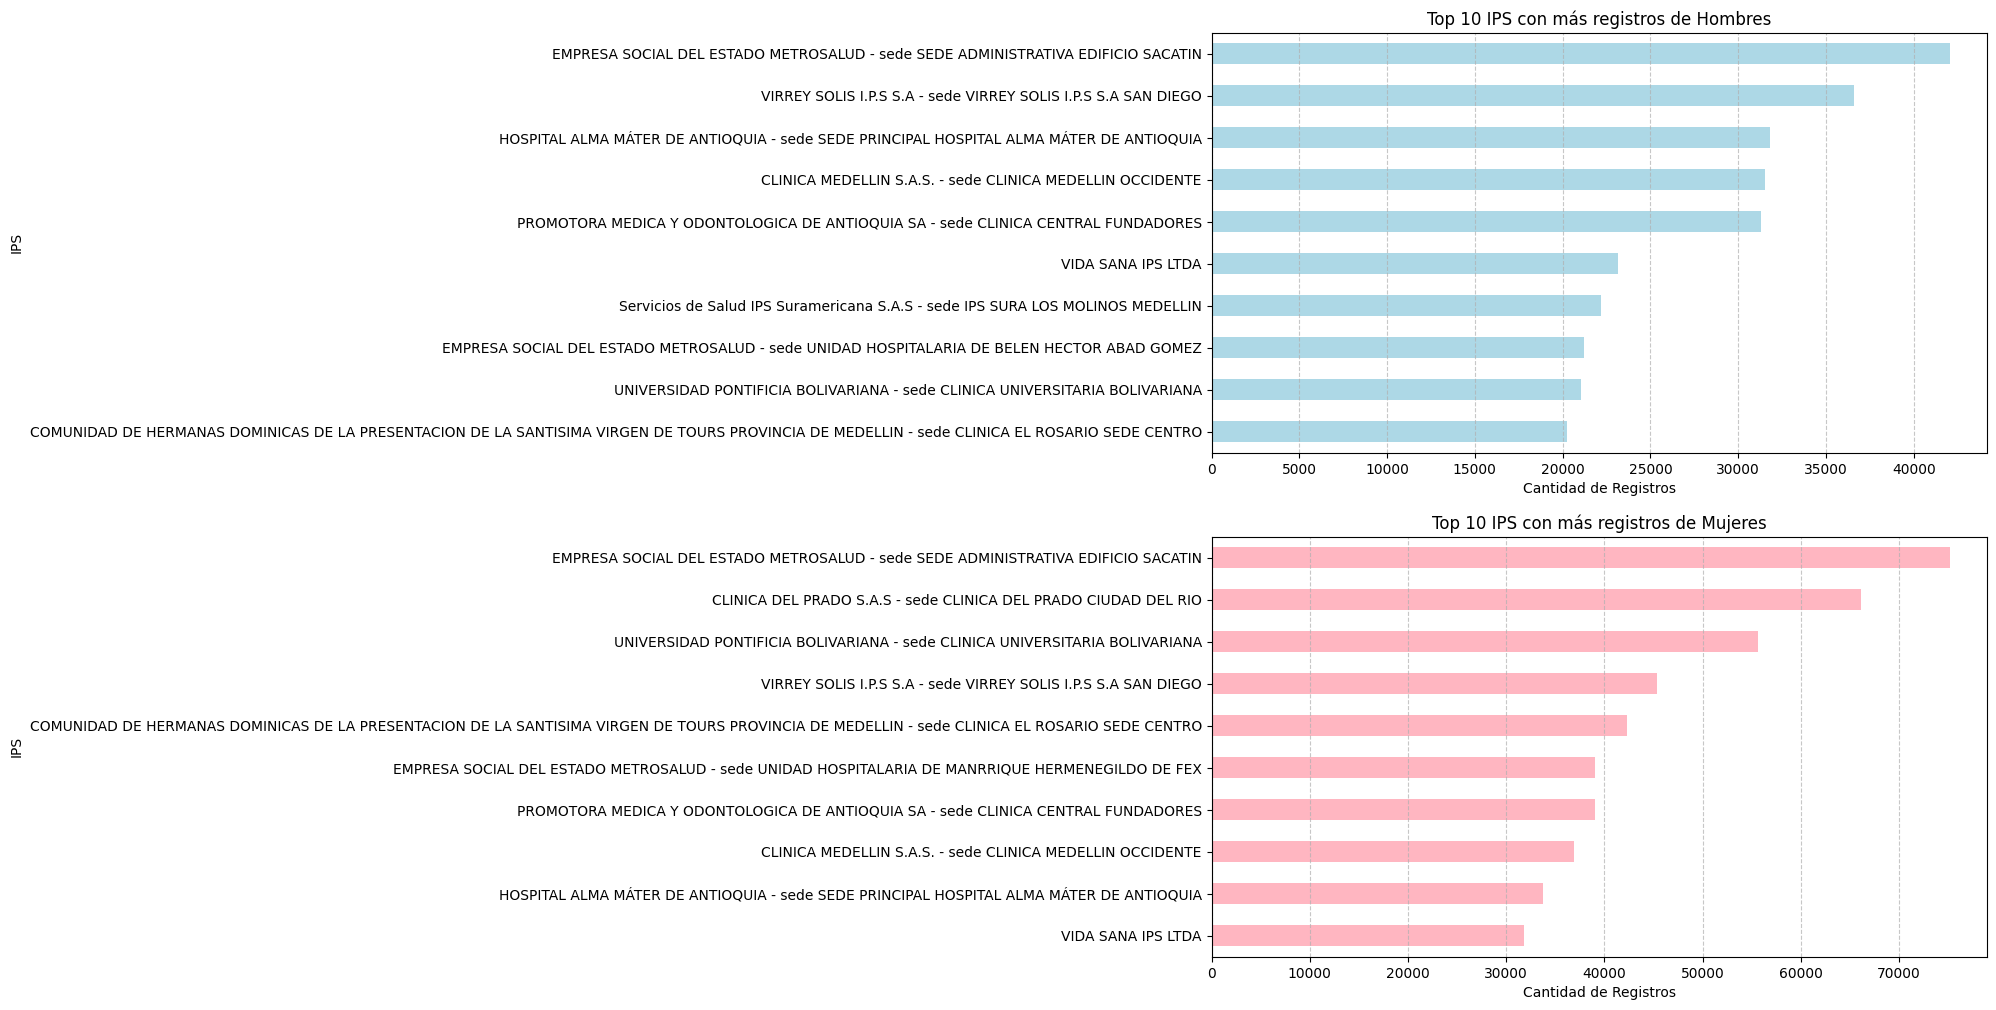

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los datos por sexo masculino y femenino
df_hombres = df[df['Sexo'] == 'M']
df_mujeres = df[df['Sexo'] == 'F']

# Contar el número de registros por IPS para hombres y mujeres
top_ips_hombres = df_hombres['NombrePrestadorSede'].value_counts().nlargest(10)
top_ips_mujeres = df_mujeres['NombrePrestadorSede'].value_counts().nlargest(10)

# Crear la figura y los subplots para las gráficas en orientación vertical (una arriba de la otra)
plt.figure(figsize=(10, 12))

# Gráfica para las 10 IPS con más registros de hombres
plt.subplot(2, 1, 1)
top_ips_hombres.plot(kind='barh', color='lightblue')
plt.title('Top 10 IPS con más registros de Hombres')
plt.xlabel('Cantidad de Registros')
plt.ylabel('IPS')
plt.gca().invert_yaxis()  # Colocar la IPS con más registros en la parte superior
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Gráfica para las 10 IPS con más registros de mujeres
plt.subplot(2, 1, 2)
top_ips_mujeres.plot(kind='barh', color='lightpink')
plt.title('Top 10 IPS con más registros de Mujeres')
plt.xlabel('Cantidad de Registros')
plt.ylabel('IPS')
plt.gca().invert_yaxis()  # Colocar la IPS con más registros en la parte superior
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajustar el diseño para que no se solapen los elementos
plt.tight_layout()
plt.show()



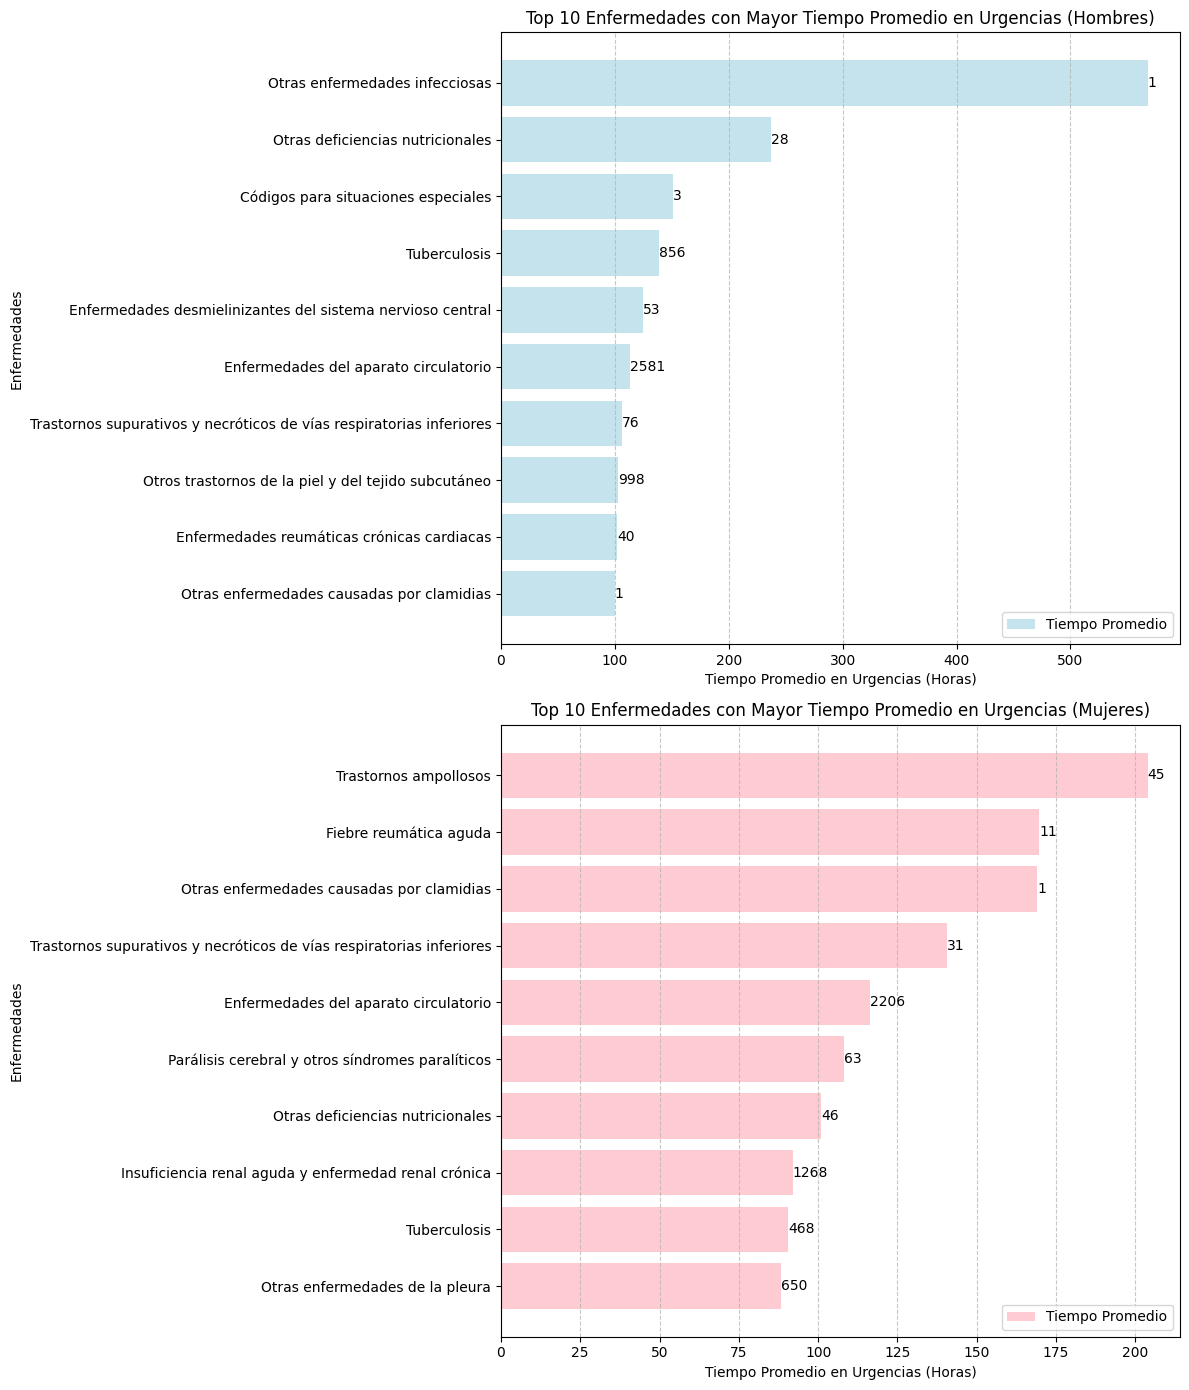

Top 10 Enfermedades con Mayor Tiempo Promedio en Urgencias (Hombres):
                                                    TiempoPromedio  \
DescripcionDiagnosticoPrincipal                                      
Otras enfermedades infecciosas                          567.783333   
Otras deficiencias nutricionales                        236.736905   
Códigos para situaciones especiales                     151.188889   
Tuberculosis                                            138.741978   
Enfermedades desmielinizantes del sistema nervi...      124.539937   
Enfermedades del aparato circulatorio                   113.419250   
Trastornos supurativos y necróticos de vías res...      106.400000   
Otros trastornos de la piel y del tejido subcut...      103.228791   
Enfermedades reumáticas crónicas cardiacas              102.330417   
Otras enfermedades causadas por clamidias               100.000000   

                                                    CantidadRegistros  
DescripcionDiagno

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los datos por sexo masculino y femenino
df_hombres = df[df['Sexo'] == 'M']
df_mujeres = df[df['Sexo'] == 'F']

# Calcular el tiempo promedio y la cantidad de registros para cada enfermedad en hombres
enfermedades_hombres = df_hombres.groupby('DescripcionDiagnosticoPrincipal').agg(
    TiempoPromedio=('TiempoenUrgencias', 'mean'),
    CantidadRegistros=('TiempoenUrgencias', 'size')
).nlargest(10, 'TiempoPromedio')

# Calcular el tiempo promedio y la cantidad de registros para cada enfermedad en mujeres
enfermedades_mujeres = df_mujeres.groupby('DescripcionDiagnosticoPrincipal').agg(
    TiempoPromedio=('TiempoenUrgencias', 'mean'),
    CantidadRegistros=('TiempoenUrgencias', 'size')
).nlargest(10, 'TiempoPromedio')

# Crear la figura y los subplots para las gráficas en orientación vertical
plt.figure(figsize=(12, 14))

# Gráfica para hombres
plt.subplot(2, 1, 1)
plt.barh(enfermedades_hombres.index, enfermedades_hombres['TiempoPromedio'], color='lightblue', alpha=0.7, label='Tiempo Promedio')
for index, value in enumerate(enfermedades_hombres['CantidadRegistros']):
    plt.text(enfermedades_hombres['TiempoPromedio'].iloc[index], index, f'{value}', va='center', ha='left')
plt.title('Top 10 Enfermedades con Mayor Tiempo Promedio en Urgencias (Hombres)')
plt.xlabel('Tiempo Promedio en Urgencias (Horas)')
plt.ylabel('Enfermedades')
plt.gca().invert_yaxis()
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Gráfica para mujeres
plt.subplot(2, 1, 2)
plt.barh(enfermedades_mujeres.index, enfermedades_mujeres['TiempoPromedio'], color='lightpink', alpha=0.7, label='Tiempo Promedio')
for index, value in enumerate(enfermedades_mujeres['CantidadRegistros']):
    plt.text(enfermedades_mujeres['TiempoPromedio'].iloc[index], index, f'{value}', va='center', ha='left')
plt.title('Top 10 Enfermedades con Mayor Tiempo Promedio en Urgencias (Mujeres)')
plt.xlabel('Tiempo Promedio en Urgencias (Horas)')
plt.ylabel('Enfermedades')
plt.gca().invert_yaxis()
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

# Mostrar los resultados en formato tabular para referencia
print("Top 10 Enfermedades con Mayor Tiempo Promedio en Urgencias (Hombres):")
print(enfermedades_hombres)

print("\nTop 10 Enfermedades con Mayor Tiempo Promedio en Urgencias (Mujeres):")
print(enfermedades_mujeres)

#Se puede hacer es el top 20 para que se vea aun mas información. 



Top 10 enfermedades con mayor tiempo promedio en urgencias (Causa Externa: 'Otra', Sexo: Masculino):
DescripcionDiagnosticoPrincipal
Traumatismos en codo y antebrazo                                       384.050000
Neoplasias malignas de órganos digestivos                              361.004167
Diabetes mellitus                                                      262.111111
Enfermedades cerebrovasculares                                         260.736111
Covid-19                                                               224.686667
Insuficiencia renal aguda y enfermedad renal crónica                   183.500000
Traumatismos en el tórax                                               180.716667
Osteopatías y condropatías                                             177.088889
Otros trastornos de la piel y del tejido subcutáneo                    171.529167
Neoplasias malignas de tejido linfoide, hemopoyético y relacionados    166.944444
Name: TiempoenUrgencias, dtype: float64


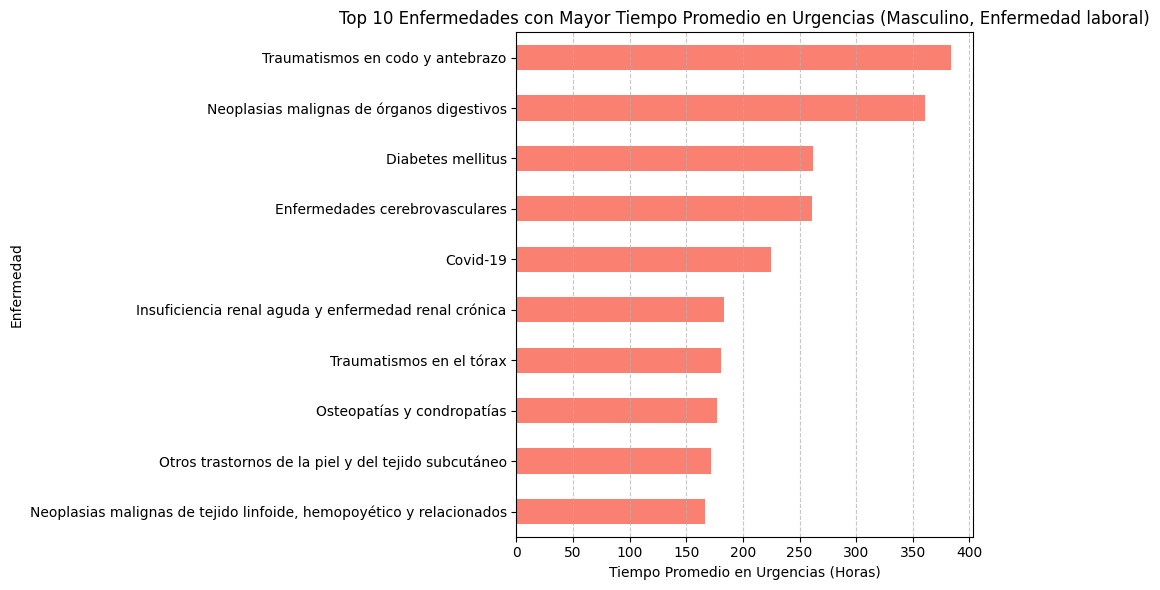

In [65]:
import pandas as pd

# Filtrar el DataFrame donde la CausaExterna es "Enfermedad General" y el Sexo es "Masculino"
df_filtrado = df[(df['CausaExterna'] == 'Enfermedad laboral') & (df['Sexo'] == 'M')]

# Calcular el tiempo promedio en urgencias para cada enfermedad
tiempo_promedio_enfermedades = df_filtrado.groupby('DescripcionDiagnosticoPrincipal')['TiempoenUrgencias'].mean()

# Seleccionar las 10 enfermedades con mayor tiempo promedio en urgencias
top_10_enfermedades = tiempo_promedio_enfermedades.nlargest(10)

# Mostrar el resultado
print("Top 10 enfermedades con mayor tiempo promedio en urgencias (Causa Externa: 'Otra', Sexo: Masculino):")
print(top_10_enfermedades)

# Crear una gráfica de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_10_enfermedades.plot(kind='barh', color='salmon')
plt.title('Top 10 Enfermedades con Mayor Tiempo Promedio en Urgencias (Masculino, Enfermedad laboral)')
plt.xlabel('Tiempo Promedio en Urgencias (Horas)')
plt.ylabel('Enfermedad')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Top 10 enfermedades con mayor tiempo promedio en urgencias (Causa Externa: 'Otra', Sexo: Masculino):
DescripcionDiagnosticoPrincipal
Infecciones con modo de transmisión predominantemente sexual            904.150000
Infecciones virales y por priones del sistema nervioso central          506.283333
Trastornos ampollosos                                                   332.716667
Enfermedad por virus de inmunodeficiencia humana [VIH]                  325.704545
Enfermedades desmielinizantes del sistema nervioso central              318.566667
Enfermedades endocrinas, nutricionales y metabólicas                    252.279630
Trastornos supurativos y necróticos de vías respiratorias inferiores    250.283333
Trastornos de los anejos cutáneos                                       246.838889
Enfermedades del aparato circulatorio                                   244.541961
Lesiones biomecánicas, no clasificadas bajo otro concepto               242.191667
Name: TiempoenUrgencias, dtype: float

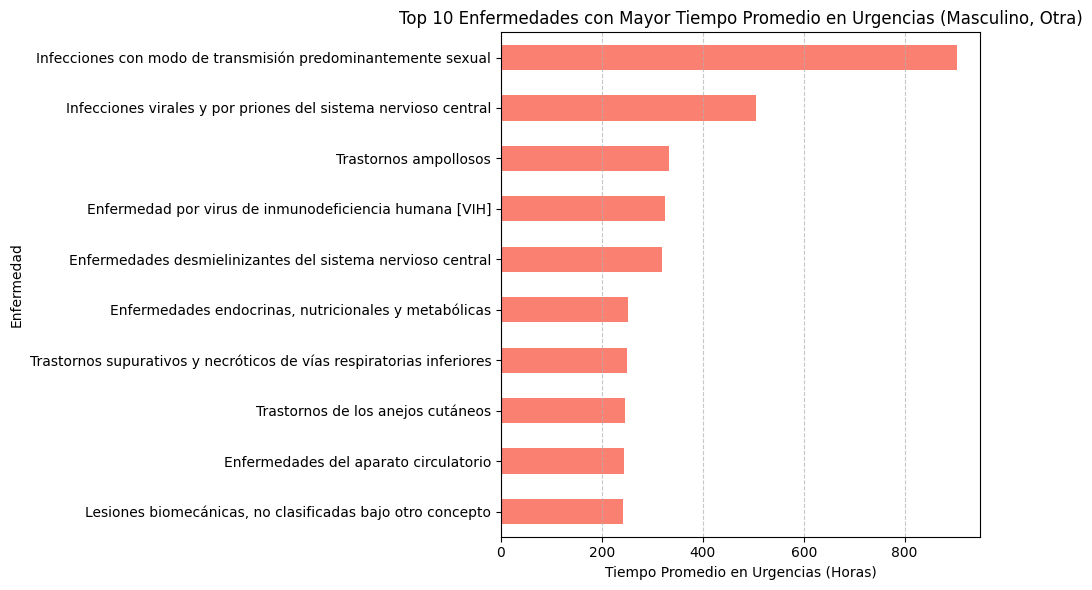

In [41]:
import pandas as pd

# Filtrar el DataFrame donde la CausaExterna es "Enfermedad General" y el Sexo es "Masculino"
df_filtrado = df[(df['CausaExterna'] == 'Otra') & (df['Sexo'] == 'M')]

# Calcular el tiempo promedio en urgencias para cada enfermedad
tiempo_promedio_enfermedades = df_filtrado.groupby('DescripcionDiagnosticoPrincipal')['TiempoenUrgencias'].mean()

# Seleccionar las 10 enfermedades con mayor tiempo promedio en urgencias
top_10_enfermedades = tiempo_promedio_enfermedades.nlargest(10)

# Mostrar el resultado
print("Top 10 enfermedades con mayor tiempo promedio en urgencias (Causa Externa: 'Otra', Sexo: Masculino):")
print(top_10_enfermedades)

# Crear una gráfica de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_10_enfermedades.plot(kind='barh', color='salmon')
plt.title('Top 10 Enfermedades con Mayor Tiempo Promedio en Urgencias (Masculino, Otra)')
plt.xlabel('Tiempo Promedio en Urgencias (Horas)')
plt.ylabel('Enfermedad')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


Top 10 enfermedades con mayor tiempo promedio en urgencias (Causa Externa: 'Sospecha de violencia sexual', Sexo: Femenino):
DescripcionDiagnosticoPrincipal
Enfermedades inflamatorias de los órganos pélvicos femeninos                         297.976667
Embarazo con resultado abortivo                                                      185.077778
Factores que influyen en el estado de salud y contacto con los servicios de salud     48.416667
Otros efectos y los no especificados de causas externas                               45.850022
Otras enfermedades del aparato urinario                                               27.066667
Traumatismos que afectan a múltiples regiones corporales                              21.900000
Infecciones de la piel y del tejido subcutáneo                                        17.833333
Agresión                                                                              11.872368
Síntomas y signos generales                                                 

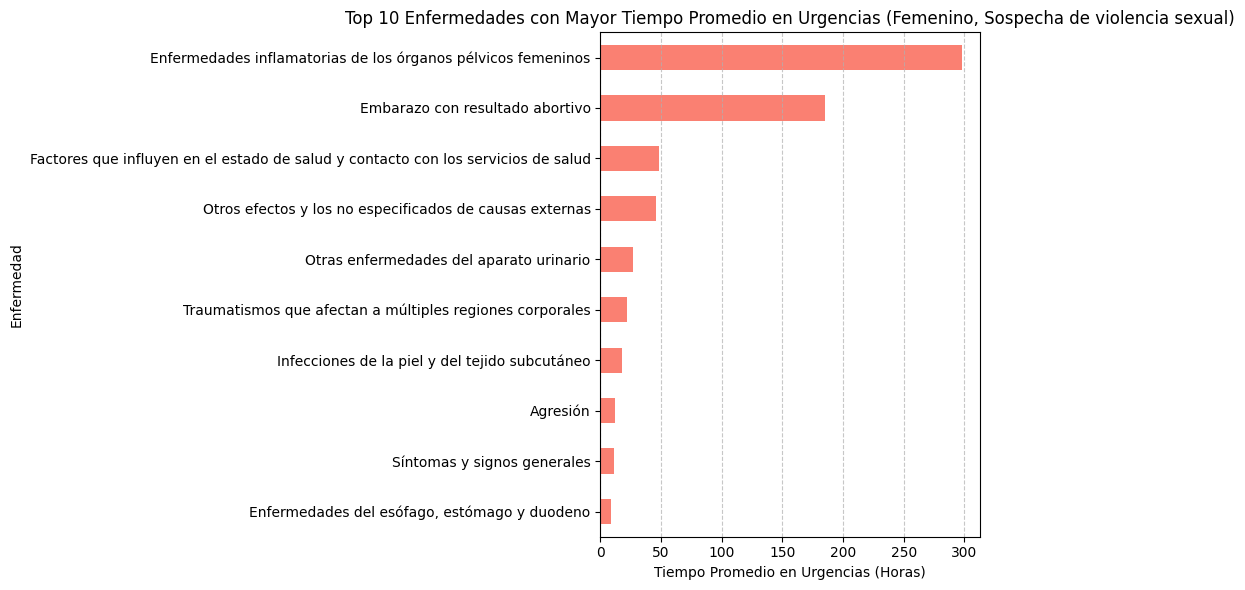

In [66]:
import pandas as pd

# Filtrar el DataFrame donde la CausaExterna es "Enfermedad General" y el Sexo es "Masculino"
df_filtrado = df[(df['CausaExterna'] == 'Sospecha de violencia sexual') & (df['Sexo'] == 'F')]

# Calcular el tiempo promedio en urgencias para cada enfermedad
tiempo_promedio_enfermedades = df_filtrado.groupby('DescripcionDiagnosticoPrincipal')['TiempoenUrgencias'].mean()

# Seleccionar las 10 enfermedades con mayor tiempo promedio en urgencias
top_10_enfermedades = tiempo_promedio_enfermedades.nlargest(10)

# Mostrar el resultado
print("Top 10 enfermedades con mayor tiempo promedio en urgencias (Causa Externa: 'Sospecha de violencia sexual', Sexo: Femenino):")
print(top_10_enfermedades)

# Crear una gráfica de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_10_enfermedades.plot(kind='barh', color='salmon')
plt.title('Top 10 Enfermedades con Mayor Tiempo Promedio en Urgencias (Femenino, Sospecha de violencia sexual)')
plt.xlabel('Tiempo Promedio en Urgencias (Horas)')
plt.ylabel('Enfermedad')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


## Distribución por Destino del Usuario después de la Atención:

C:\Users\jpcan\AppData\Local\Temp\ipykernel_6584\620293038.py:41: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='TiempoenUrgencias', index='RangoEdad', columns='TipoUsuario', aggfunc='mean')


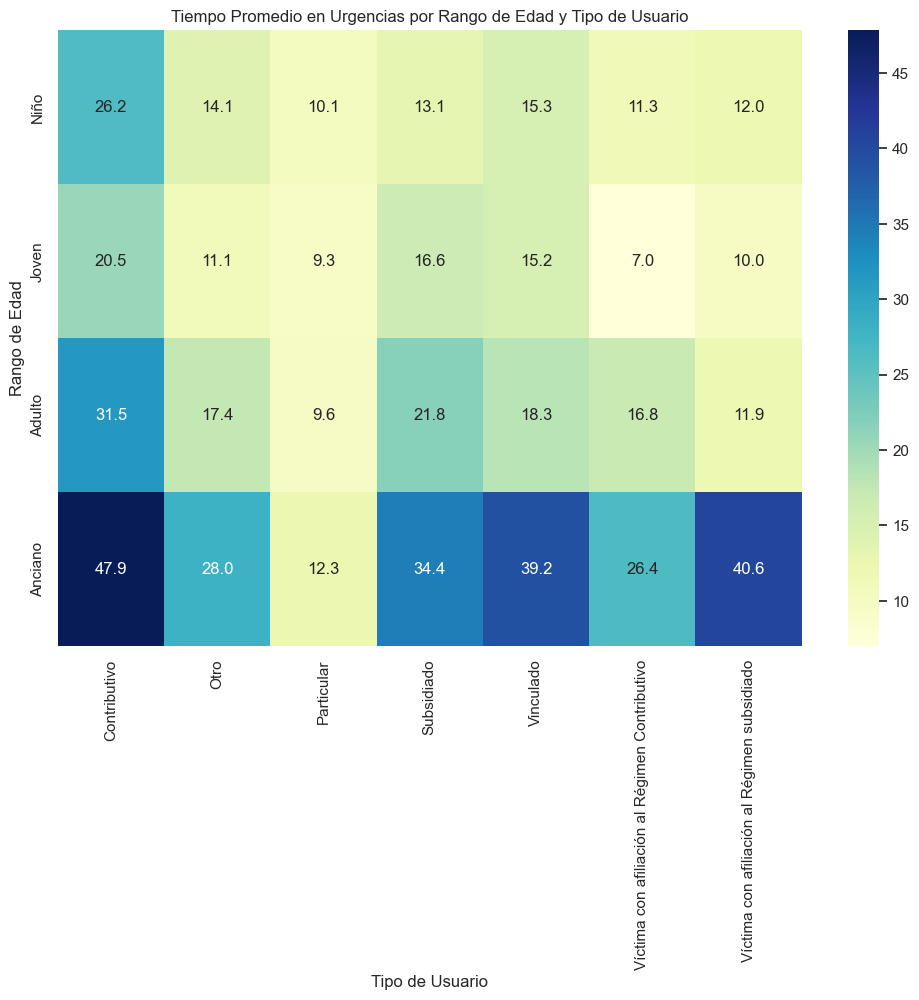

In [20]:
import matplotlib.pyplot as plt
# Convertir 'FechaIngreso' a datetime si aún no lo has hecho
df['FechaIngreso'] = pd.to_datetime(df['FechaIngreso'])
# Crear la columna 'Año' a partir de 'FechaIngreso'
df['Año'] = df['FechaIngreso'].dt.year
# Función para graficar y mostrar porcentajes
def graficar_distribucion_con_porcentaje(columna, nombre_columna):
    # Obtener la distribución
    distribucion = df[columna].value_counts(normalize=True) * 100
    distribucion_total = df[columna].value_counts()
    
    # Imprimir los resultados
    print(f"Distribución por {nombre_columna} (en %):\n{distribucion}\n")
    
    # Graficar la distribución en porcentajes
    plt.figure(figsize=(10, 6))
    distribucion.plot(kind='bar', color='skyblue')
    
    for i, val in enumerate(distribucion):
        plt.text(i, val + 0.5, f'{val:.2f}%', ha='center', va='bottom')
    
    plt.title(f'Distribución de {nombre_columna} (%)')
    plt.xlabel(nombre_columna)
    plt.ylabel('Porcentaje')
    plt.show()





import matplotlib.pyplot as plt
import seaborn as sns




# Crear una nueva columna de rango de edad
df['RangoEdad'] = pd.cut(df['Edad'], bins=[0, 18, 35, 60, 100], labels=['Niño', 'Joven', 'Adulto', 'Anciano'])

# Calcular el tiempo promedio de urgencias para cada combinación
pivot_table = df.pivot_table(values='TiempoenUrgencias', index='RangoEdad', columns='TipoUsuario', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Tiempo Promedio en Urgencias por Rango de Edad y Tipo de Usuario')
plt.xlabel('Tipo de Usuario')
plt.ylabel('Rango de Edad')
plt.show()





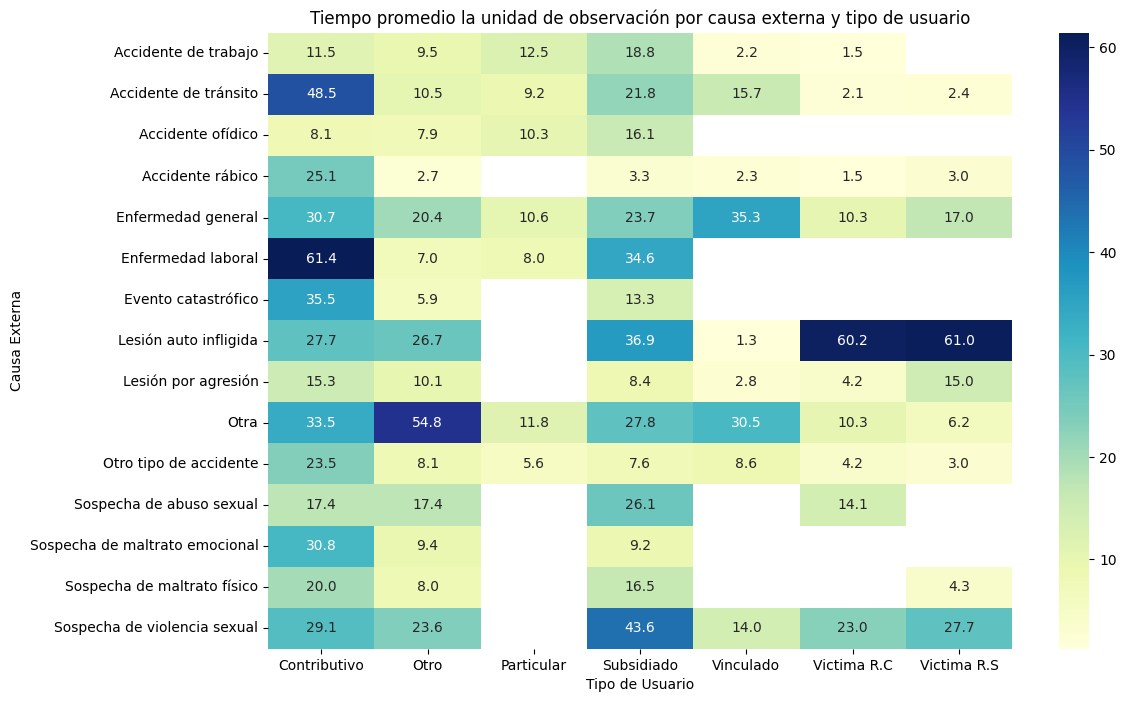

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el tiempo promedio de urgencias para cada combinación
pivot_table = df.pivot_table(values='TiempoenUrgencias', index='CausaExterna', columns='TipoUsuario', aggfunc='mean')

# Función para personalizar etiquetas específicas
def personalizar_etiquetas(etiquetas):
    etiquetas_personalizadas = []
    for etiqueta in etiquetas:
        if "Régimen Contributivo" in etiqueta:
            etiquetas_personalizadas.append("Victima R.C")
        elif "Régimen subsidiado" in etiqueta:
            etiquetas_personalizadas.append("Victima R.S")
        else:
            etiquetas_personalizadas.append(etiqueta)
    return etiquetas_personalizadas

# Crear el heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Tiempo promedio la unidad de observación por causa externa y tipo de usuario')
plt.xlabel('Tipo de Usuario')
plt.ylabel('Causa Externa')

# Aplicar la personalización de etiquetas del eje x
etiquetas_x = personalizar_etiquetas(pivot_table.columns)
ax.set_xticklabels(etiquetas_x)

# Girar las etiquetas del eje x a horizontal
plt.xticks(rotation=0)

plt.show()





Top 10 enfermedades con mayor tiempo promedio en urgencias (Causa Externa: 'Lesión auto infligida', Tipo de Usuario: 'Víctima con afiliación al Régimen Contributivo'):
DescripcionDiagnosticoPrincipal
Trastornos del estado de ánimo [afectivos]                                                                               135.683333
Causas externas de morbilidad y de mortalidad                                                                             72.283333
Trastornos de ansiedad, disociativos, relacionados con estrés, somatomorfos y otros trastornos mentales no psicóticos     27.808333
Trastornos mentales y del comportamiento debidos al consumo de sustancias psicoactivas                                     9.300000
Efectos tóxicos de sustancias de procedencia principalmente no medicamentosa                                               0.633333
Name: TiempoenUrgencias, dtype: float64


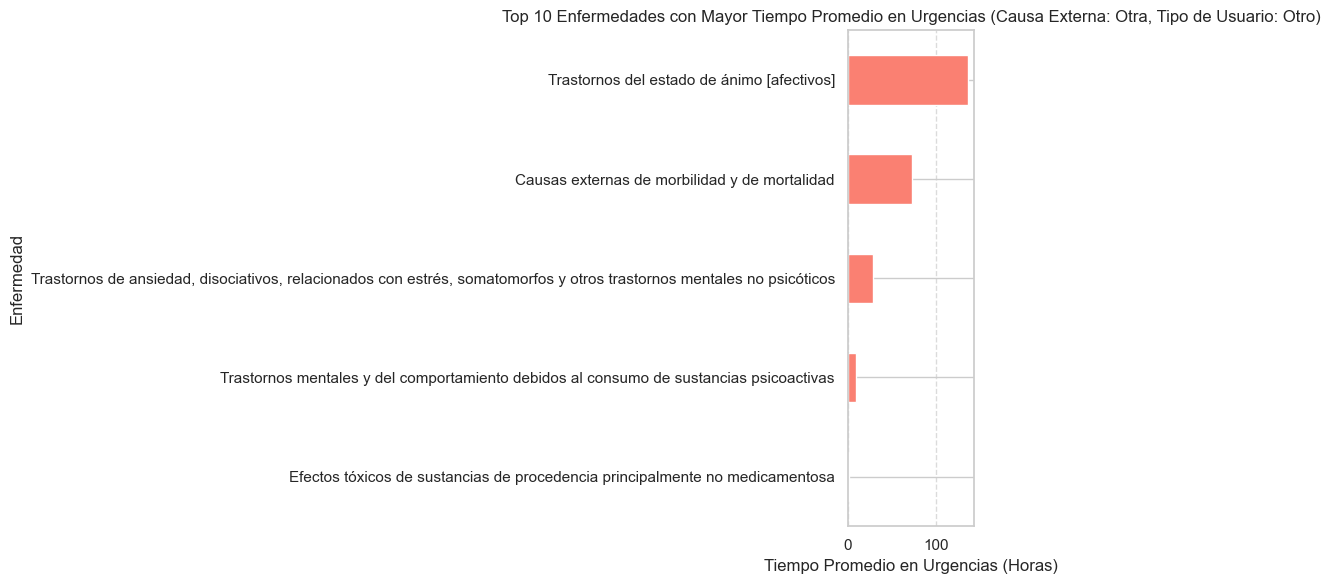

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el DataFrame donde la CausaExterna es "Otra" y el TipoUsuario es "Otro"
df_filtrado = df[(df['CausaExterna'] == 'Lesión auto infligida') & (df['TipoUsuario'] == 'Víctima con afiliación al Régimen Contributivo')]

# Calcular el tiempo promedio en urgencias para cada enfermedad
tiempo_promedio_enfermedades = df_filtrado.groupby('DescripcionDiagnosticoPrincipal')['TiempoenUrgencias'].mean()

# Seleccionar las 10 enfermedades con mayor tiempo promedio en urgencias
top_10_enfermedades = tiempo_promedio_enfermedades.nlargest(10)

# Mostrar el resultado
print("Top 10 enfermedades con mayor tiempo promedio en urgencias (Causa Externa: 'Lesión auto infligida', Tipo de Usuario: 'Víctima con afiliación al Régimen Contributivo'):")
print(top_10_enfermedades)

# Crear una gráfica de barras
plt.figure(figsize=(10, 6))
top_10_enfermedades.plot(kind='barh', color='salmon')
plt.title('Top 10 Enfermedades con Mayor Tiempo Promedio en Urgencias (Causa Externa: Otra, Tipo de Usuario: Otro)')
plt.xlabel('Tiempo Promedio en Urgencias (Horas)')
plt.ylabel('Enfermedad')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Top 10 enfermedades con mayor tiempo promedio en urgencias (Causa Externa: 'Otra', Tipo de Usuario: 'Otro'):
DescripcionDiagnosticoPrincipal
Enfermedades del aparato circulatorio                  294.207143
Trastornos sistémicos del tejido conectivo             216.658333
Enfermedades isquémicas cardiacas                      204.008333
Neoplasias malignas de órganos digestivos              178.381250
Enfermedades cerebrovasculares                         177.466667
Traumatismos en el cuello                              174.887500
Enfermedades del apéndice                              140.858333
Otros trastornos de la piel y del tejido subcutáneo    136.637500
Otras formas de enfermedad cardiaca                    127.505556
Osteopatías y condropatías                             127.446154
Name: TiempoenUrgencias, dtype: float64


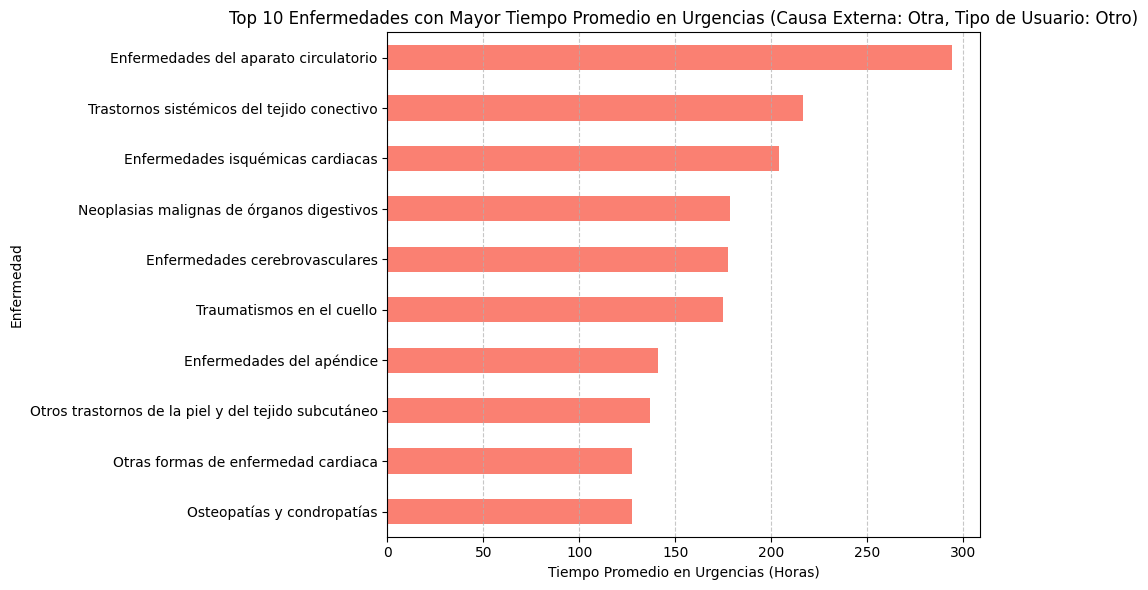

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el DataFrame donde la CausaExterna es "Otra" y el TipoUsuario es "Otro"
df_filtrado = df[(df['CausaExterna'] == 'Otra') & (df['TipoUsuario'] == 'Otro')]

# Calcular el tiempo promedio en urgencias para cada enfermedad
tiempo_promedio_enfermedades = df_filtrado.groupby('DescripcionDiagnosticoPrincipal')['TiempoenUrgencias'].mean()

# Seleccionar las 10 enfermedades con mayor tiempo promedio en urgencias
top_10_enfermedades = tiempo_promedio_enfermedades.nlargest(10)

# Mostrar el resultado
print("Top 10 enfermedades con mayor tiempo promedio en urgencias (Causa Externa: 'Otra', Tipo de Usuario: 'Otro'):")
print(top_10_enfermedades)

# Crear una gráfica de barras
plt.figure(figsize=(10, 6))
top_10_enfermedades.plot(kind='barh', color='salmon')
plt.title('Top 10 Enfermedades con Mayor Tiempo Promedio en Urgencias (Causa Externa: Otra, Tipo de Usuario: Otro)')
plt.xlabel('Tiempo Promedio en Urgencias (Horas)')
plt.ylabel('Enfermedad')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [76]:
import pandas as pd

# Contar la cantidad de registros para cada combinación de TipoUsuario y TipoDeIPS
conteo_por_tipo = df.groupby(['TipoUsuario', 'TipoDeIPS']).size().unstack(fill_value=0)

# Crear una columna que muestra si "Privado" o "Publico" tiene más registros para cada TipoUsuario
conteo_por_tipo['MasFrecuente'] = conteo_por_tipo.apply(lambda x: 'Privado' if x['Privado'] > x['Público'] else 'Público', axis=1)

# Mostrar el resultado
print("Cantidad de registros por TipoUsuario y TipoDeIPS:")
print(conteo_por_tipo[['Privado', 'Público', 'MasFrecuente']])


Cantidad de registros por TipoUsuario y TipoDeIPS:
TipoDeIPS                                       Privado  Público MasFrecuente
TipoUsuario                                                                  
Contributivo                                     478190   104782      Privado
Otro                                              63841    15260      Privado
Particular                                          508        2      Privado
Subsidiado                                        46120   326185      Público
Vinculado                                           466      689      Público
Víctima con afiliación al Régimen Contributivo       13      361      Público
Víctima con afiliación al Régimen subsidiado          8      780      Público


# Analisis descriptivo variables Y

## Visualización de Tendencias Temporales y relacionados con COVID

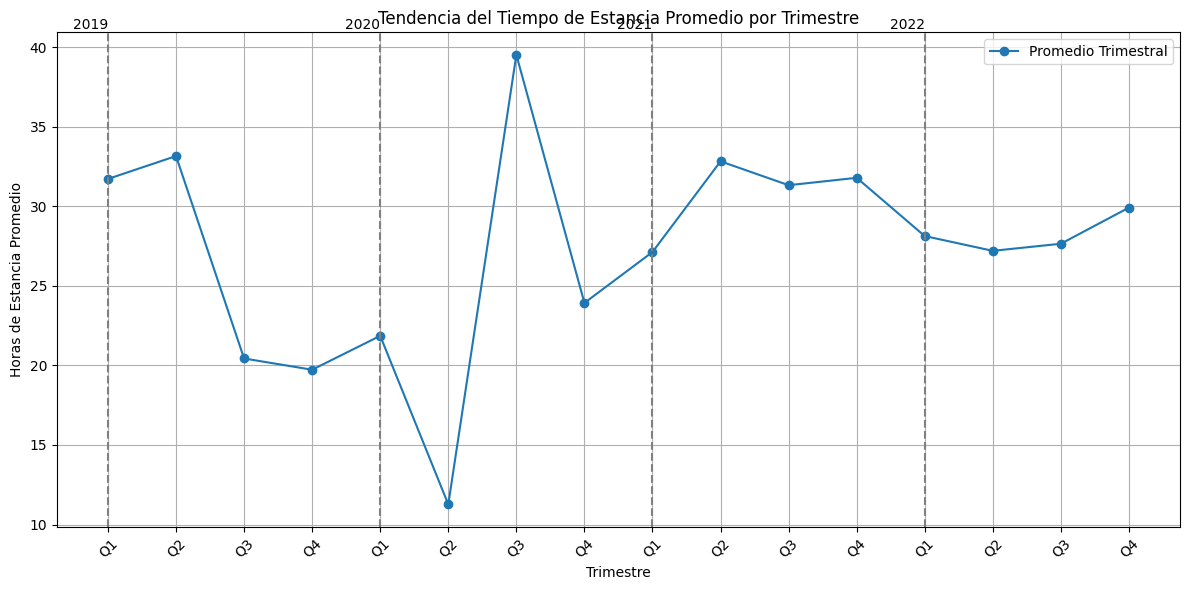

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# Suponiendo que 'FechaIngreso' tiene formato de fecha, creamos columnas adicionales
df['Año'] = pd.to_datetime(df['FechaIngreso']).dt.year
df['Mes'] = pd.to_datetime(df['FechaIngreso']).dt.month

# Crear una nueva columna para los trimestres
df['Trimestre'] = pd.to_datetime(df['FechaIngreso']).dt.to_period('Q')  # Agrupación por trimestre
df['SoloTrimestre'] = df['Trimestre'].dt.quarter  # Extraemos solo el trimestre Q1, Q2, etc.

# Calcular la estancia promedio por trimestre
estancia_trimestral = df.groupby(['Año', 'Trimestre', 'SoloTrimestre'])['TiempoenUrgencias'].mean().reset_index()

# Crear una figura
plt.figure(figsize=(12, 6))

# Graficar la tendencia del tiempo de estancia promedio por trimestre
plt.plot(estancia_trimestral.index, estancia_trimestral['TiempoenUrgencias'], marker='o', linestyle='-', label='Promedio Trimestral')

# Etiquetas de los trimestres en el eje X (sin el año)
plt.xticks(estancia_trimestral.index, labels='Q' + estancia_trimestral['SoloTrimestre'].astype(str), rotation=45)

# Añadir las líneas punteadas para separar los años
for year in estancia_trimestral['Año'].unique():
    year_pos = estancia_trimestral[estancia_trimestral['Año'] == year].index.min()
    plt.axvline(x=year_pos, color='gray', linestyle='--')
    plt.text(year_pos, plt.ylim()[1], str(year), horizontalalignment='right', verticalalignment='bottom')

# Mejorar el formato de la gráfica
plt.title('Tendencia del Tiempo de Estancia Promedio por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Horas de Estancia Promedio')

# Mostrar una rejilla y ajustar el formato
plt.grid(True)
plt.tight_layout()

# Mostrar la leyenda
plt.legend(['Promedio Trimestral'])
plt.show()



#Mirar por mes y año

In [6]:
import pandas as pd

# Crear la columna 'Covid' que indica si algún diagnóstico contiene "Covid-19"
df['Covid'] = df[['DescripcionDiagnosticoPrincipal', 'DescripcionDiagnosticoRelacionado_uno', 
                  'DescripcionDiagnosticoRelacionado_dos', 'DescripcionDiagnosticoRelacionado_tres']].apply(
    lambda row: row.str.contains('Covid-19', case=False, na=False).any(), axis=1)

# Calcular el total de pacientes con diagnóstico relacionado con Covid-19
total_casos_covid = df['Covid'].sum()

# Calcular el total de pacientes en el DataFrame
total_pacientes = df.shape[0]

# Calcular el porcentaje total de pacientes con diagnóstico relacionado con Covid-19
porcentaje_covid = (total_casos_covid / total_pacientes) * 100

# Mostrar el resultado
print(f"Total de pacientes: {total_pacientes}")
print(f"Total de casos relacionados con Covid-19: {total_casos_covid}")
print(f"Porcentaje de casos relacionados con Covid-19: {porcentaje_covid:.2f}%")




Total de pacientes: 1291407
Total de casos relacionados con Covid-19: 17318
Porcentaje de casos relacionados con Covid-19: 1.34%


# El porcentaje de casos relacionados con Covid son muy minimos, se va a tratar como una enfermedad mas dado que ya varios estudios han dicho que va a ser una enfermedad estacionaria. 

In [7]:
# Filtrar los datos para los pacientes con diagnóstico relacionado con COVID-19
pacientes_covid = df[df[['DescripcionDiagnosticoPrincipal', 'DescripcionDiagnosticoRelacionado_uno',
                         'DescripcionDiagnosticoRelacionado_dos', 'DescripcionDiagnosticoRelacionado_tres']].apply(
    lambda row: row.str.contains('Covid-19', case=False, na=False).any(), axis=1)]

# Calcular estadísticas descriptivas para los pacientes con COVID-19 en la columna TiempoenUrgencias
estadisticas_covid = {
    'Máximo': pacientes_covid['TiempoenUrgencias'].max(),
    'Mínimo': pacientes_covid['TiempoenUrgencias'].min(),
    'Promedio': pacientes_covid['TiempoenUrgencias'].mean()
}

# Mostrar resultados
print("Estadísticas de Tiempo en Urgencias para Pacientes con COVID-19:")
for key, value in estadisticas_covid.items():
    print(f"{key}: {value:.2f}")


Estadísticas de Tiempo en Urgencias para Pacientes con COVID-19:
Máximo: 7124.73
Mínimo: 0.50
Promedio: 37.96


In [9]:
# Calcular el tiempo de estancia promedio por trimestre para pacientes con COVID
estancia_covid = df[df['Covid']].groupby(['Año', 'Trimestre'])['TiempoenUrgencias'].mean().reset_index()

# Calcular el tiempo de estancia promedio por trimestre para pacientes sin COVID
estancia_no_covid = df[~df['Covid']].groupby(['Año', 'Trimestre'])['TiempoenUrgencias'].mean().reset_index()

# Comparar tiempo de estancia
print("Tiempo promedio de estancia para pacientes con COVID-19:")
print(estancia_covid)
print("\nTiempo promedio de estancia para pacientes sin COVID-19:")
print(estancia_no_covid)


Tiempo promedio de estancia para pacientes con COVID-19:
     Año Trimestre  TiempoenUrgencias
0   2020    2020Q2           5.799847
1   2020    2020Q3          53.886421
2   2020    2020Q4          38.942240
3   2021    2021Q1          48.325245
4   2021    2021Q2          62.514208
5   2021    2021Q3          29.020588
6   2021    2021Q4          33.259756
7   2022    2022Q1          23.519398
8   2022    2022Q2          24.656294
9   2022    2022Q3          31.486183
10  2022    2022Q4          28.469239

Tiempo promedio de estancia para pacientes sin COVID-19:
     Año Trimestre  TiempoenUrgencias
0   2019    2019Q1          31.730099
1   2019    2019Q2          33.168629
2   2019    2019Q3          20.439317
3   2019    2019Q4          19.733028
4   2020    2020Q1          21.864219
5   2020    2020Q2          11.387961
6   2020    2020Q3          38.957662
7   2020    2020Q4          23.563101
8   2021    2021Q1          26.457065
9   2021    2021Q2          31.451246
10  2021   

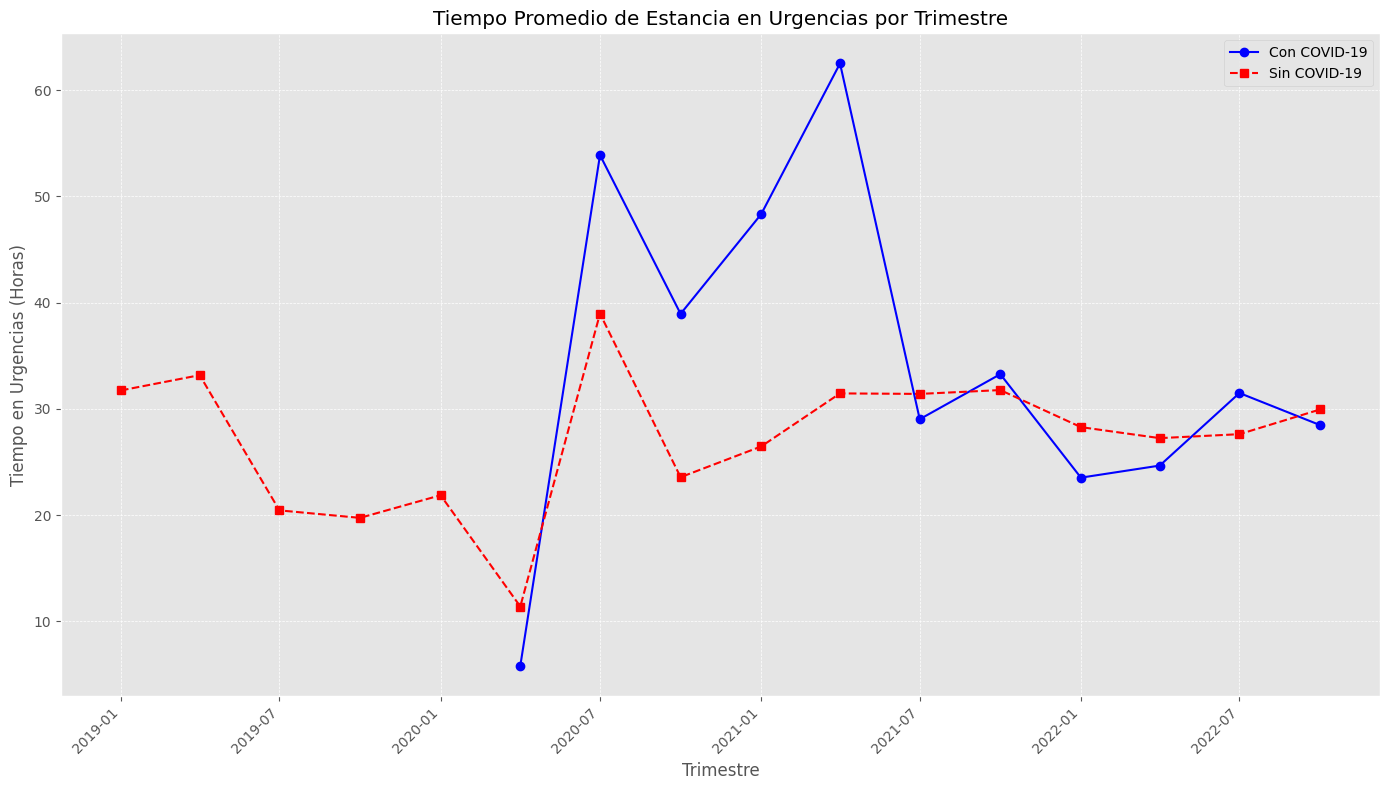

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de pacientes con COVID-19
data_covid = {
    'Año': [2020, 2020, 2020, 2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022],
    'Trimestre': ['2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4',
                  '2022Q1', '2022Q2', '2022Q3', '2022Q4'],
    'TiempoenUrgencias': [5.799847, 53.886421, 38.942240, 48.325245, 62.514208,
                           29.020588, 33.259756, 23.519398, 24.656294, 31.486183, 28.469239]
}

df_covid = pd.DataFrame(data_covid)

# Datos de pacientes sin COVID-19
data_no_covid = {
    'Año': [2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021,
            2022, 2022, 2022, 2022],
    'Trimestre': ['2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3',
                  '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4',
                  '2022Q1', '2022Q2', '2022Q3', '2022Q4'],
    'TiempoenUrgencias': [31.730099, 33.168629, 20.439317, 19.733028, 21.864219,
                           11.387961, 38.957662, 23.563101, 26.457065, 31.451246,
                           31.403174, 31.764626, 28.276743, 27.239933, 27.612203,
                           29.937835]
}

df_no_covid = pd.DataFrame(data_no_covid)

# Convertir 'Trimestre' a un formato de fecha para ordenar correctamente
df_covid['Period'] = pd.PeriodIndex(df_covid['Trimestre'], freq='Q').to_timestamp()
df_no_covid['Period'] = pd.PeriodIndex(df_no_covid['Trimestre'], freq='Q').to_timestamp()

# Ordenar los DataFrames por 'Period'
df_covid = df_covid.sort_values('Period')
df_no_covid = df_no_covid.sort_values('Period')

# Aplicar el estilo 'ggplot' para mejorar la estética
plt.style.use('ggplot')  # Puedes cambiar 'ggplot' por otro estilo incorporado si lo prefieres

# Crear la figura y el eje principal
plt.figure(figsize=(14, 8))

# Gráfico para pacientes con COVID-19
plt.plot(df_covid['Period'], df_covid['TiempoenUrgencias'],
         marker='o', linestyle='-', color='blue', label='Con COVID-19')

# Gráfico para pacientes sin COVID-19
plt.plot(df_no_covid['Period'], df_no_covid['TiempoenUrgencias'],
         marker='s', linestyle='--', color='red', label='Sin COVID-19')

# Configurar etiquetas y título
plt.xlabel('Trimestre')
plt.ylabel('Tiempo en Urgencias (Horas)')
plt.title('Tiempo Promedio de Estancia en Urgencias por Trimestre')

# Rotar etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Añadir leyenda
plt.legend()

# Añadir cuadrícula
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ajustar el layout para evitar recortes
plt.tight_layout()

# Guardar la gráfica como archivo (opcional)
plt.savefig('tiempo_estancia_urgencias_comparativa.png', dpi=300)

# Mostrar la gráfica
plt.show()




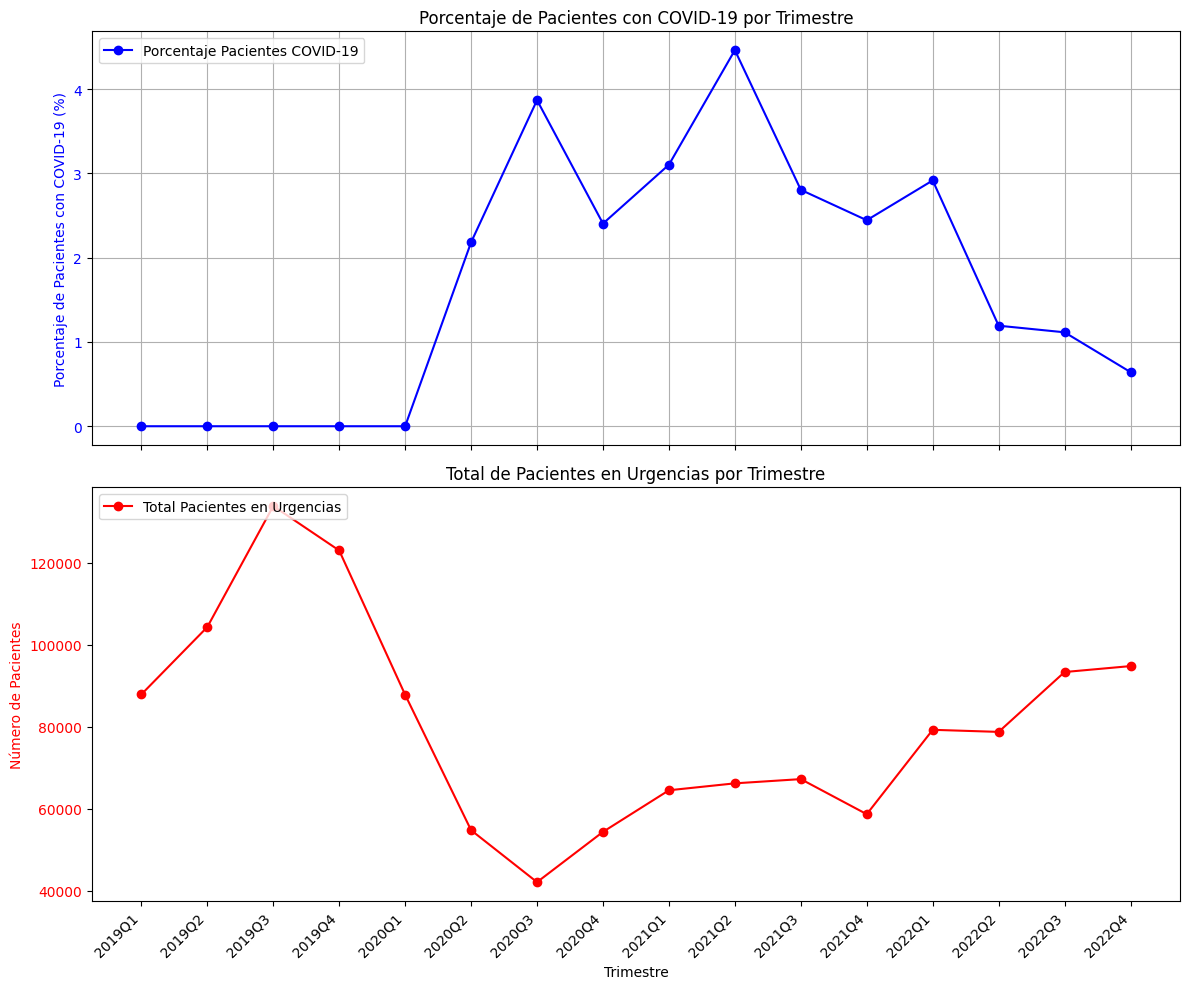

In [10]:
import matplotlib.pyplot as plt

# Suponiendo que 'covid_trimestral' es tu DataFrame y ya está definido
# Convertir la columna 'Trimestre' a string para poder graficar
covid_trimestral['Trimestre_str'] = covid_trimestral['Trimestre'].astype(str)

# Crear la figura y dos subgráficos (uno encima del otro)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Gráfico 1: Porcentaje de pacientes con COVID-19
ax1.plot(covid_trimestral['Trimestre_str'], covid_trimestral['Porcentaje_Covid'],
         marker='o', linestyle='-', color='b', label='Porcentaje Pacientes COVID-19')
ax1.set_ylabel('Porcentaje de Pacientes con COVID-19 (%)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)
ax1.set_title('Porcentaje de Pacientes con COVID-19 por Trimestre')
ax1.legend(loc='upper left')

# Gráfico 2: Total de Pacientes en Urgencias
ax2.plot(covid_trimestral['Trimestre_str'], covid_trimestral['Total_Pacientes'],
         marker='o', linestyle='-', color='r', label='Total Pacientes en Urgencias')
ax2.set_ylabel('Número de Pacientes', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_xlabel('Trimestre')
ax2.set_title('Total de Pacientes en Urgencias por Trimestre')
ax2.legend(loc='upper left')

# Rotar las etiquetas del eje X para ambos subgráficos
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Mostrar la gráfica
plt.show()






# Acá se puede observar un fenomeno interesante, cuando empezo el covid, se empezo a reducir la cantidad de gente que estaba en estas unidades de observación. Esto se puede deber a que la gente preferia evitar ir a urgencias lo mas que les fuera posible por el tema de las restricciones sanitarias

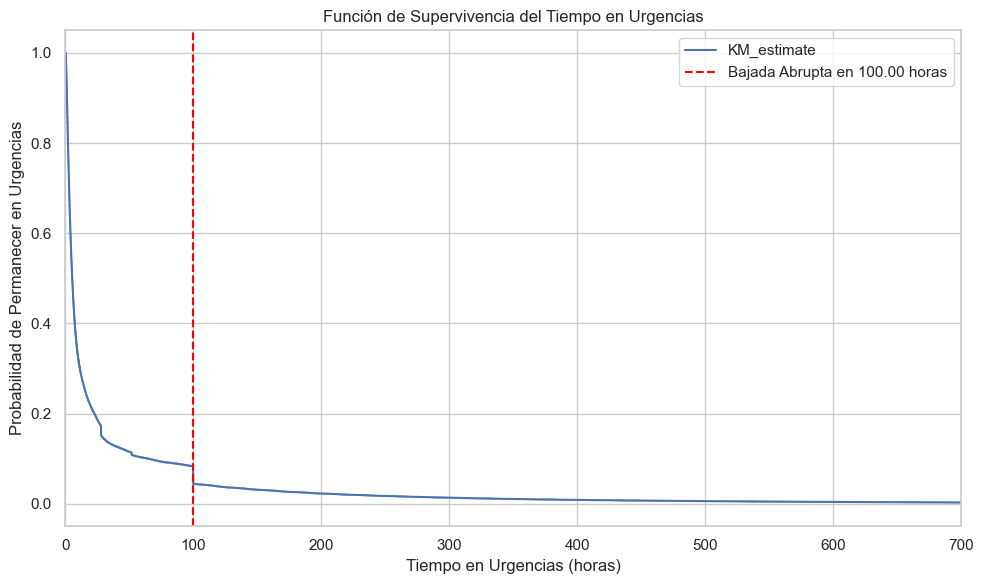

La bajada más abrupta ocurre en 100.00 horas.


In [15]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import numpy as np

# Crear el modelo de Kaplan-Meier
kmf = KaplanMeierFitter()

# Ajustar el modelo con los tiempos de urgencias
kmf.fit(df['TiempoenUrgencias'])

# Obtener las probabilidades de supervivencia y los tiempos asociados
survival_probabilities = kmf.survival_function_.values.flatten()
survival_times = kmf.survival_function_.index.values

# Calcular las diferencias entre probabilidades consecutivas para identificar la bajada más abrupta
differences = np.diff(survival_probabilities, prepend=survival_probabilities[0])

# Encontrar el índice de la mayor caída en la probabilidad de supervivencia
idx_max_drop = np.argmin(differences)

# Tiempo donde ocurre la bajada más abrupta
max_drop_time = survival_times[idx_max_drop]

# Graficar la función de supervivencia
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.xlim(0, 700)  # Limitar el eje X a 700 horas
plt.title('Función de Supervivencia del Tiempo en Urgencias')
plt.xlabel('Tiempo en Urgencias (horas)')
plt.ylabel('Probabilidad de Permanecer en Urgencias')
plt.grid(True)

# Trazar una línea vertical en el punto donde ocurre la mayor bajada
plt.axvline(max_drop_time, color='red', linestyle='--', label=f'Bajada Abrupta en {max_drop_time:.2f} horas')

# Añadir la leyenda
plt.legend()

plt.tight_layout()
plt.show()

print(f"La bajada más abrupta ocurre en {max_drop_time:.2f} horas.")

C:\Users\jpcan\AppData\Local\Temp\ipykernel_24064\128412867.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rango', y='Porcentaje', data=percentage_df, palette='Set2')
c:\Users\jpcan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\jpcan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_

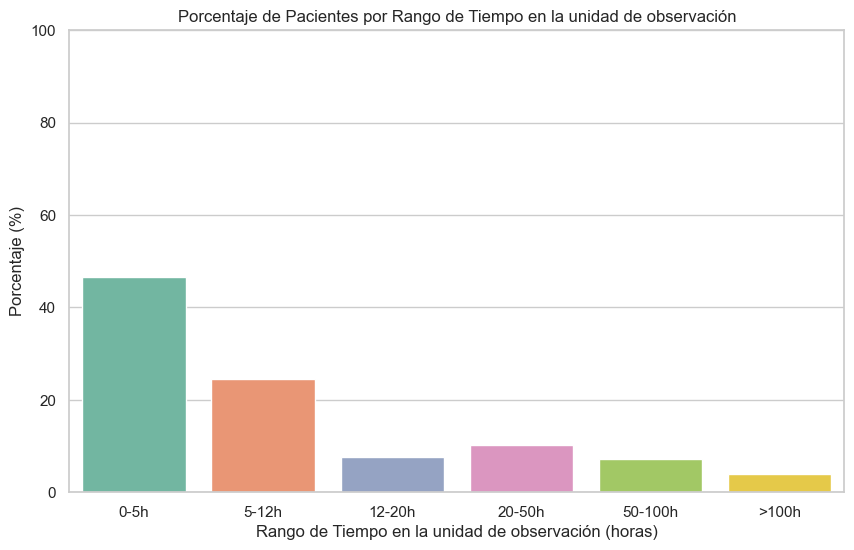

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Suponiendo que 'TiempoenUrgencias' ya está en tu DataFrame df

# Configuración general de estilo de gráficos
sns.set(style="whitegrid")

# Crear bins para agrupar el tiempo en urgencias
df['TiempoenUrgencias_binned'] = pd.cut(
    df['TiempoenUrgencias'], 
    bins=[0, 5, 12, 20, 50, 100, 500], 
    labels=['0-5h', '5-12h', '12-20h', '20-50h', '50-100h', '>100h']
)

# Calcular los porcentajes
percentage_df = df['TiempoenUrgencias_binned'].value_counts(normalize=True).mul(100).reset_index()
percentage_df.columns = ['Rango', 'Porcentaje']

# Gráfico de barras para mostrar los porcentajes
plt.figure(figsize=(10, 6))
sns.barplot(x='Rango', y='Porcentaje', data=percentage_df, palette='Set2')
plt.title('Porcentaje de Pacientes por Rango de Tiempo en la unidad de observación')
plt.xlabel('Rango de Tiempo en la unidad de observación (horas)')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)  # Asegurar que el eje Y se muestre en porcentajes del 0 al 100
plt.show()





In [4]:
df.describe()

EstadoSalida          Edad               FechaHoraIngreso  \
count  1.291407e+06  1.291407e+06                        1291407   
mean   1.029862e+00  4.117178e+01  2020-11-22 01:51:59.727042048   
min    1.000000e+00  2.739726e-03            2019-01-01 00:08:00   
25%    1.000000e+00  2.300000e+01            2019-09-28 04:19:30   
50%    1.000000e+00  3.600000e+01            2020-10-20 07:16:00   
75%    1.000000e+00  6.100000e+01            2022-01-26 18:59:30   
max    2.000000e+00  1.090000e+02            2022-12-31 23:59:00   
std    1.702066e-01  2.415637e+01                            NaN   

                     FechaHoraSalida  TiempoenUrgencias  Hospitaloccupancy  
count                        1291407       1.291407e+06       1.291374e+06  
mean   2020-11-23 04:40:21.385186816       2.680602e+01       2.033947e+02  
min              2019-01-01 02:00:00       5.000000e-01       1.000000e+00  
25%              2019-09-28 23:43:00       2.666667e+00       4.100000e+01  
50%              2020-10-21 14:40:00       5.550000e+00       6.900000e+01  
75%              2022-01-27 23:51:30       1.570000e+01       1.860000e+02  
max              2023-05-26 12:34:00       1.593828e+04       1.832000e+03  
std                              NaN       1.039515e+02       3.162760e+02

In [27]:
import pandas as pd

# Suponiendo que el DataFrame ya está cargado como df
# Filtrar los datos donde 'DiferenciaHoras' es mayor a 24
datos_por_encima_de_200 = df[df['TiempoenUrgencias'] > 24]

# Mostrar los primeros registros que cumplen esta condición
print(datos_por_encima_de_200.head())

# Mostrar el número total de registros que cumplen esta condición
print(f"Número total de registros con DiferenciaHoras > 24: {len(datos_por_encima_de_200)}")

#Corto mediano plazo es 24 horas, largo plazo mas de eso

   NumeroFactura CodigoPrestador FechaIngreso HoraIngreso        CausaExterna  \
5         275951     50010217203   2019-11-17       14:49  Enfermedad general   
6         275947     50010217203   2019-11-17       14:49  Enfermedad general   
17        288364     50010217203   2019-12-21       09:01  Enfermedad general   
18    4129237242     50010425930   2019-12-22       08:33  Enfermedad general   
30        267049     50010217203   2019-11-02       21:15  Enfermedad general   

   CodigoDiagnosticoPrincipal CodigoDiagnosticoRelacionado_uno  \
5                        K831                             C257   
6                        K831                             C257   
17                       Z719                             \"\"   
18                       K818                             \"\"   
30                       E785                             E104   

   CodigoDiagnosticoRelacionado_dos CodigoDiagnosticoRelacionado_tres  \
5                              \"\"        